# [**시계열 알고리즘 종류**](https://paperswithcode.com/area/time-series)

[![Open in Colab](http://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/thekimk/All-About-Time-Series-Analysis/blob/main/Lecture3-7_MachineLearning_TimeSeries_LinearUnivariate_KK.ipynb)

---

> **"통계추론, 기계학습 및 딥러닝의 흐름에 `시간패턴`을 반영하려 진화"**
>
> **"`지도학습(예측 분류), 비지도학습` 문제에 모두 활용되는 필수 알고리즘"** 
>
> **"`미래 예측을 포함한 추천 서비스와 같은 비즈니스`에 활용중"** 

<center><img src='Image/Expert/TS_Evolution.png' width='900'></center>

<!-- <center><img src='Image/Expert/Performance_Explanability_TimeSeries.png' width='600'></center> -->

**1) 통계추론(Statistical Inference) 알고리즘:** `통계분포`에 기반한 `설명력 중시 알고리즘`

<center><img src='Image/Expert/TS_Algorithm_Concept.png' width='700'></center> 

> **(1) 단변량 선형기반:** `Y가 1개` & `Y와 X의 관계를 선형 가정`
>
> - Linear Regression
> - `ARIMA(AutoRegressive Integrated Moving Average)`
> - `ARIMAX`
> - `SARIMAX`
>
> **(2) 다변량 선형기반:** `Y가 2개 이상` & `Y와 X의 관계를 선형 가정`
>
> - Bayesian-based Models
> - [`Vector Autoregression(VAR)`](https://en.wikipedia.org/wiki/Vector_autoregression)
> - `Vector Error Correction Model(VECM)`
>
> **(3) 비선형기반:** `Y와 X의 관계를 비선형 가정`
>
> - `Exponential Smoothing`
> - `ETS(Error/Trend/Seasonal)`
> - `Kalman Filter`
> - State Space Model
> - Change Point Detection(CPD)
> - `Autoregressive conditional heteroskedasticity(ARCH)`
> - [`Generalized Autoregressive Conditional Heteroskedasticity(GARCH)`](https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity)

**2) 기계학습/딥러닝 알고리즘:** `컴퓨팅` 기반 `인공지능 알고리즘`으로 `정확성 높은 비선형 관계` 추론

> - `Prophet`
> - `Neural Prophet`
> - `RNN(Recurrent Neural Network)`
> - `LSTM(Long Short-Term Memory)`
> - `GRU(Gated Recurrent Unit)`
> - Neural Networks Autoregression(NNAR)
> - Attention
> - Self-attention
> - Transformer

**3) Platforms:** 글로벌 기업들이 독자적으로 개발한 `시계열 분석 플랫폼` 확대중

> - [Amazon Forecast](https://aws.amazon.com/ko/forecast/)
> - [Automated ML Time-series Forecasting at Microsoft Azure](https://azure.microsoft.com/en-us/blog/build-more-accurate-forecasts-with-new-capabilities-in-automated-machine-learning/)
> - [Time Series Forecasting with Google Cloud AI Platform](https://codelabs.developers.google.com/codelabs/time-series-forecasting-with-cloud-ai-platform#0)


In [1]:
!pip install --user pmdarima

In [2]:
# Auto reload and user defined functions
%reload_ext autoreload
%autoreload 2
from module_regression import *
from module_classification import *
from module_timeseries import *

# Data manipulation and useful functions
import requests
from io import BytesIO
import random
from itertools import product
import scipy as sp

# Time series algorithms
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import AutoARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict

# **종속변수의 정상성(Stationary) 변환**

> **"`독립변수 X`는 `최대한 다양한 비정상성 패턴을 뽑아 Y를 설명`하려 애썼다면, `종속변수 Y`는 정상성으로 만들어 `최대한 단조롭고 간단하게 만들어 X가 잘 설명할 수 있게 지원!`"**
>
> **(1)** (필수는 아니지만) 정상성 확보로 `추정범위가 제한되므로 예측력 향상 가능`
>
> **(2)** 단조로운 종속변수라서 적합 모델의 복잡도가 낮아져 `적은 파라미터만으로 모델링` 가능하기에 `Bias` $\uparrow$ + `Variance` $\downarrow$, `과적합 확률이 줄어들고 예측력 향상 가능`
>
> **(3)** 전통적인 `통계추론 알고리즘`은 대부분 `학습 안정성`을 높이기 위해 `정상성 필수`

---

<center><img src='Image/Expert/DataAnalysis_CycleTS2.png' width='900'></center>

**0) 배경:** 시계열 데이터를 활용한 분석에서는 `새로운 가정 필요`

| **데이터 방향** | **현실 가정** |
|:---|:---|
| **시간 무관 `일반적 데이터`** | `모든 데이터 샘플들이 동일 분포에서 독립적으로 생성` <br> $\rightarrow$ `Independent and Identically Distributed (i.i.d.)` |
| **시간 관련 `시계열 데이터`** | i.i.d.가정 할 수 없고 현실문제를 단순화 한 `새로운 가정 필요` <br> $\rightarrow$ `시간이 흘러도 통계적/확률적 성질이 변하지 않는다는 정상성(Stationary)` |

- **새로운 가정 하에서, 정상성/비정상성 자체를 `라벨로 활용`하여 `분류 지도학습` 및 `군집 비지도학습`에도 활용**

---

**1) 정상성의 의미:** 시간이 흘러도 `통계적 특성(Statistical Properties)`이 변하지 않고 `일정`

> - **통계적 특성(Statistical Properties):** 주로 `평균(Mean)과 분산(Variance)/공분산(Covariance)`를 의미하지만, 가장 보수적으로는 이를 포함한 `모든 분포적 특성`을 포함
>
>
> - **[Homoscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity)**: `분산이 일정한(유한한, 발산하지않는) 경우`를 의미
> - **[Heteroscedasticity](https://en.wikipedia.org/wiki/Heteroscedasticity)**: `분산이 발산하는 경우`를 의미

<center><img src='Image/Expert/Stationary(on).png' width='300'></center>
<center><img src='Image/Expert/Stationary(non).png' width='700'></center>

---

**2) 정상성의 종류:**

- **변수:** <center>$X$ = {$X_{1}$, $X_{2}$, $\dots$, $X_{n}$}</center>

- **확률과정:**
<center>$Y$ = {$\dots$, $Y_{-2}$, $Y_{-1}$, $Y_{0}$, $Y_{1}$, $Y_{2}$, $\dots$}</center>
<center>$X_1$ = {$\dots$, $X_{1,-2}$, $X_{1,-1}$, $X_{1,0}$, $X_{1,1}$, $X_{1,2}$, $\dots$}</center>
<center>$X_2$ = {$\dots$, $X_{2,-2}$, $X_{2,-1}$, $X_{2,0}$, $X_{2,1}$, $X_{2,2}$, $\dots$}</center>
<center>$\dots$</center>

**(1) 약정상(Weak Stationarity, Wide-sense Stationary Process):**

> **(비수학적 이해)**  
> 
> 1) ..., $X_{i,-1}$, $X_{i,0}$, $X_{i,-1}$, ... 변수의 `각 시계열 샘플들은 동일 분포`며,
>
> 2) ..., $(X_{i,-3}, X_{i,-1})$, $(X_{i,-2}, X_{i,0})$, $(X_{i,-1}, X_{i,1})$, ... `임의간격 샘플 2개씩의 묶음`도 `동일 분포`
>
> **(수학적 이해)**  
>
> 1) $E(X_{it}) = \mu$, for all time $t$ (The `first moment` estimation)  
>
> 2) $Var(X_{it}) = E(X_{it}^2) - E(X_{it})^2 < \infty$, for all time $t$ (The `second moment` estimation)  
>
> 3) $Cov(X_{is}, X_{ik}) = Cov(X_{i(s+h)}, X_{i(k+h)}) = f(h)$, for all time $s, k, h$ (The `cross moment` estimation)  
    => covariance just depends on $h$.  

**(2) 강정상(Strong Stationarity, Strictly Stationary Process):**  

> **"확률과정의 `모든 분포 모멘트(Moment)`가 `시간 차이에만 의존`하는 것(절대시간 미의존)"**    
>
> **(비수학적 이해)**  
>
> 1) ..., $X_{i,-1}$, $X_{i,0}$, $X_{i,-1}$, ... 변수의 `각 시계열 샘플들은 동일 분포`며,
>
> 2) ..., $(X_{i,-3}, X_{i,-1})$, $(X_{i,-2}, X_{i,0})$, $(X_{i,-1}, X_{i,1})$, ... `임의간격 샘플 2개씩의 묶음`도 `동일 분포`
>
> 3) ..., $(X_{i,-5}, X_{i,-3}, X_{i,-1})$, $(X_{i,-2}, X_{i,0}, X_{i,2})$, $(X_{i,-1}, X_{i,1}, X_{i,3})$, ... `임의간격 샘플 3개씩의 묶음`도 `동일 분포`
>
> 4) $(X_{i,-\infty}, ..., X_{i,-1}, X_{i,1}, X_{i,3}, ..., X_{i,\infty})$ 모든 시간 변화에도 `동일 분포`

**(3) 강정상과 약정상의 관계:** 강정상 $\Rightarrow$ 약정상, but 약정상 $\nRightarrow$ 강정상

> **"강정상 $\{x_{it}\}^{t=+\infty}_{t=-\infty}$의 특정 샘플 $\{x_{it}\}^{t={i_2}}_{t={i_1}}$의 `평균과 분산까지만 일정한 약정상` 일 수 있다"**
>
> **"약정상 $\{x_{it}\}^{t=+\infty}_{t=-\infty}$이 3차 이상의 통계적 특성인 `모멘텀(Skewness, Kurtosis 등)`에서도 일정하면 `강정상`이다"**  
    
---

**3) 백색잡음(White Noise, $WN$):** `강정상의 대표예시`로 시계열분석 `기본알고리즘 중 가장 중요`함    

<center><img src='Image/Expert/White_Noise.png' width='500'></center>
    
**(1) 잔차들은 `정규분포`이고, (unbiased) `평균 0과 일정한 분산`을 가져야 함:** 

> $$
\begin{align*}
\{\epsilon_t : t = \dots, -2, -1, 0, 1, 2, \dots\} &\sim N(0,\sigma^2_{\epsilon_t}) \\
where~~ \epsilon_t &\sim  i.i.d\text{(independent and identically distributed)} \\
\epsilon_t &= Y_t - \hat{Y_t}, \\
E(\epsilon_t) &= 0, \\
Var(\epsilon_t) &= \sigma^2_{\epsilon_t} \\
Cov(\epsilon_s, \epsilon_k) &= 0 \text{ for different times!(s \ne k)}
\end{align*}
$$

**(2) 잔차들이 시간의 흐름에 따라 `상관성이 없어야` 함:** `자기상관함수(Autocorrelation Fundtion, ACF)=0` 확인
> - **공분산(Covariance):** 
>
> <center>$Cov(Y_s, Y_k)$ = $E[(Y_s-E(Y_s))$$(Y_k-E(Y_k))]$ = $\gamma_{s,k}$</center>
>
> - **자기상관함수(Autocorrelation Function):** 
>
> <center>$Corr(Y_s, Y_k)$ = $\dfrac{Cov(Y_s, Y_k)}{\sqrt{Var(Y_s)Var(Y_k)}}$ = $\dfrac{\gamma_{s,k}}{\sqrt{\gamma_s \gamma_k}}$</center>
>
> - **편자기상관함수(Partial Autocorrelation Function):** $s$와 $k$사이의 `상관성을 제거한 자기상관함수`
>
> <center>$Corr[(Y_s-\hat{Y}_s, Y_{s-t}-\hat{Y}_{s-t})]$  for $1<t<k$</center>
      
---

**4) 비정상 확률과정(Non-stationary Process):**  

- 추세가 있어서 `평균`인 일차 모멘트($E(y_t)$)가 `0이 아니며 시간에 따라 변함`
- 추세가 없지만($E(y_t) = 0$) `분산`인 이차 모멘트($Var(y_t)$)가 `시간에 따라 변함`

> - **랜덤 워크(Random Walk):** `비정상(Non-stationary) 대표예시`로 `차분시 백색잡음`으로 변경
>
> $$
\begin{align*}
Y_{it} &= Y_{it-1} + \epsilon_t \\ 
Y_{it} - Y_{it-1} &= \epsilon_t \\ 
\epsilon_t &\sim  N(0,\sigma_{\epsilon_t}^2)
\end{align*}
$$
>
> <center><img src='Image/Expert/Random_Walk.png' width='400'></center>

---

**6) 정리:**

| **예시** | **데이터** |
|:---:|:---:|
| **정상성** | 백색잡음(White Noise) |
| **비정상성** | 랜덤워크(Random Walk) |

- **활용주요목적:**  

> **1) 모델링:** 시계열 모형은 `데이터가 Stationary라 가정` $\rightarrow$ `Stationary여야 예측 성능 높다`  
> **2) 잔차진단:** `백색잡음 또한 Stationary` $\rightarrow$ `잔차도 Stationary여야 예측 성능 높다`  
   
- **활용단어예시:** 

> - Stationary Process: `정상성인 시계열` 데이터셋(프로세스)
> - Stationary Model: `정상성인 시계열데이터를 설명`하는 모델
> - Trend Stationary: `트랜드를 제거하면 정상성`인 시계열데이터
> - Seasonal Stationary: `계절성을 제거하면 정상성`인 시계열데이터
> - Difference Stationary: `차분하면 정상성`인 시계열데이터


## **정상성 변환 방법:** 제곱, 루트, 로그, 차분 등


- **정상성 여부 예시:**

<center><img src='Image/Expert/Stationary_Example_Solution.png' width='800'>(Forecasting: Principles and Practices)</center> 

| **그림** 	| **데이터 설명** 	|
|:---:	|:---	|
| **(a)** 	| 200일 동안의 구글 주식 가격 	|
| **(b)** 	| 200일 동안의 구글 주식 가격 변동 	|
| **(c)** 	| 미국 연간 파업 수 	|
| **(d)** 	| 미국 단독주택 월별 판매액 	|
| **(e)** 	| 미국 계란12개의 연간 가격 	|
| **(f)** 	| 호주 빅토리아 주의 월별 도살돼지 수 	|
| **(g)** 	| 캐나다 북서부 연간 포획 시라소니 수 	|
| **(h)** 	| 호주 월별 맥주 생산량 	|
| **(i)** 	| 호주 월별 전기 생산량 	|

<center><img src='Image/Expert/Stationary_Example.png' width='800'></center> 
    
> - **Trend:** `a/c/e/f/i`  
> - **Seasonality:** `d/h/i`  
> - **Non-constant Variance:** `i`  

---

**1) 로그변환(Logarithm Transform):** `분산변화`를 `일정하게` 만듬(i)

> - 시간흐름에 비례하여 값이 커지는 경우(`분산 증가`)
> - 비정상 확률 과정으로 `표준편차가 자료의 크기에 비례하여 증가`하거나 `지수함수적으로 증가`하는 경우 
> - 로그 변환한 확률 과정의 분산은 일정하기에 추세 제거로 기댓값이 0이 되면 `정상 과정으로 모형화 가능`

$$
\begin{align*}
\text{Distribution of Original} && \text{E}(Y_t) &= \mu_t = f(t) \\
&& \sqrt{\text{Var}(Y_t)} &= \mu_t \sigma \\
\text{Distribution of Log-transform} && Y_t &= Y_{t-1} + Y_t - Y_{t-1} \\
&& \dfrac{Y_t}{Y_{t-1}} &= 1 + \dfrac{Y_t - Y_{t-1}}{Y_{t-1}} \\
&& log(\dfrac{Y_t}{Y_{t-1}}) &= log(1 + \dfrac{Y_t - Y_{t-1}}{Y_{t-1}}) \approx \dfrac{Y_t - Y_{t-1}}{Y_{t-1}} \\
&& log(Y_t) - log(Y_{t-1}) &\approx \dfrac{Y_t - Y_{t-1}}{Y_{t-1}} \\
&& log(Y_t) &\approx log(Y_{t-1}) + \dfrac{Y_t - Y_{t-1}}{Y_{t-1}} \\
&& log(Y_t) &\approx log(\mu_t) + \dfrac{Y_t - \mu_t}{\mu_t} \\
&& \text{E}(\log Y_t) &= \log \mu_t \\
&& \text{Var}(\log Y_t) &\approx \sigma^2 \\
% \text{*Generalization of Return} && R_t &= \dfrac{Y_{t}}{Y_{t-1}} - 1 \\
% && \log{Y_t} - \log{Y_{t-1}} &= \log{R_t + 1} \approx R_t \;\; \text{ if } \left| R_t \right| < 0.2 \\
\end{align*}
$$

---

**2) 차분(Difference):** `평균변화`를 `일정하게`만들어 `추세나 계절성 제거/감소` 가능

> **(1) 계절성(Seasonality, $S_t$)**: 특정한 `시간(월/요일)`에 따라 `평균이 달라지는 것`을 의미하고 `더미변수`를 통해 `각 시간(월/요일)별 평균 추정` 가능
>
> - **계절성 제거1(별도추정):** 별도의 `계절성 함수 추정`($f(t)$) 후 `함수 제거`를 통한 정상성 확보
>
>> - 확률과정의 `시간값의 더미변수화`를 통해 `각 시간별 평균 함수`를 알아내는 것
>> - 확률과정($Y_t$)이 `추정 가능한 결정론적 계절성함수`($f(t)$)와 `정상확률과정`($Y^s_t$)의 `합`
>>
>> \begin{align*}
\text{Main Equation} && Y_t &= f(t) + Y^s_t \\
\text{where} && f(t) &= \sum_{i=0}^{\infty} a_i D_i = a_0 + a_1 D_1 + a_2 D_2 + \cdots
\end{align*}
>
> - **계절성 제거2(차분사용):** `차분 적용` $(1-L^d) Y_t$ 후 `계절성 제거`를 통한 정상성 확보
>
>>
>> \begin{align*}
\text{Main Equation of d=1} && Y_t &=> (1-L^1) Y_t \\
&& &= (1-Lag^1) Y_t \\
&& &= Y_t - Lag^1(Y_t) \\
&& &= Y_t - Y_{t-1} \\
\text{Main Equation of d=2} && Y_t &=> (1-L^2) Y_t \\
&& &= (1-Lag^2) Y_t \\
&& &= Y_t - Lag^2(Y_t) \\
&& &= Y_t - Y_{t-2} \\
\end{align*}

> **(2) 추세(Trend, $T_t$)**: 시간 흐름에 따라 `증가 또는 감소`하는 경우  
>
> - **추세 제거1(별도추정):** 별도의 `추세 추정`($f(t)$) 후 `함수 제거`를 통한 정상성 확보
>
>> - 확률과정의 `추세 모델링`을 통해 `각 시간별 평균 함수`를 알아내는 것
>> - 확률과정($Y_t$)이 `추정이 가능한 결정론적 추세함수`($f(t)$)와 `정상확률과정`($Y^s_t$)의 `합`
>>
>> \begin{align*}
\text{Main Equation} && Y_t &= f(t) + Y^s_t \\
\text{where} && f(t) &= \sum_{i=0}^{\infty} a_i t^i = a_0 + a_1 t + a_2 t^2 + \cdots
\end{align*}
>
> - **추세 제거2(차분사용):** `차분 적용` $(1-L^1)^d Y_t$ 후 `추세 제거`를 통한 정상성 확보
>
>>
>> \begin{align*}
\text{Main Equation of d=1} && Y_t &=> (1-L^1)^1 Y_t \\
&& &= (1-Lag^1)^1 Y_t \\
&& &= Y_t - Lag^1(Y_t) \\
&& &= Y_t - Y_{t-1} \\
\text{Main Equation of d=2} && Y_t &=> (1-L^1)^2 Y_t \\
&& &= (1-2L^1+L^2) Y_t \\
&& &= (1-2Lag^1+Lag^2) Y_t \\
&& &= Y_t - 2Lag^1(Y_t) + Lag^2(Y_t) \\
&& &= Y_t - Lag^1(Y_t) - Lag^1(Y_t) + Lag^2(Y_t) \\
&& &= (Y_t - Lag^1(Y_t)) - (Lag^1(Y_t) - Lag^2(Y_t)) \\
&& &= (Y_t - L^1(Y_t)) - (L^1(Y_t) - L^2(Y_t)) \\
&& &= (Y_t - Y_{t-1}) - (Y_{t-1} - Y_{t-2}) \\
&& &= Y_t - 2Y_{t-1} + Y_{t-2} \\
\end{align*}

---

**3) Box-Cox 변환:** 비정규분포 데이터를 `정규분포 변환`하여 `극단값으로 인한 비정상성` 확률 낮춤

> - 일반적으로 `비정규분포에서 추세나 계절성 등의 큰변동이 발생` 가능(b vs i)
> - `모수(parameter)` $\lambda$를 가지며, 보통 여러가지 $\lambda$ 값을 모두 시도하여 `가장 정규성이 높은 데이터가 출력되는 모수를 추정`하여 변환된 정규분포 데이터를 사용
>
> $$
\begin{align*}
y^{(\boldsymbol{\lambda})} =
\begin{cases}
\dfrac{y^{\lambda} - 1}{\lambda} & \text{if } \lambda \neq 0, \\
\ln{y} & \text{if } \lambda = 0,
\end{cases}
\end{align*}
$$

## **추세제거 실습:** 대기중 CO2농도

time    co2
0     0 316.10
1     1 317.30
2     2 317.60
3     3 317.50
4     4 316.40

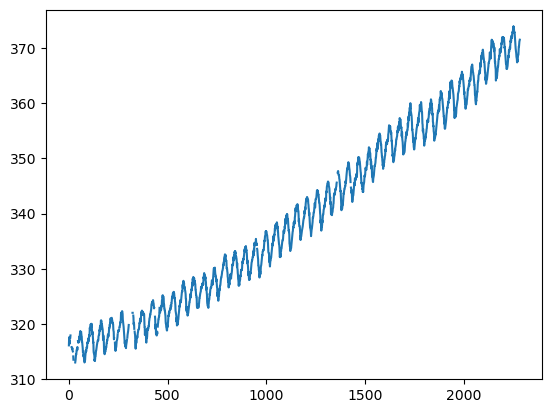

In [3]:
# 데이터 로딩
co2 = sm.datasets.co2.load()
df = pd.DataFrame.from_records(co2.data).iloc[:,[-1]]
df = df.reset_index()
df.columns = ['time', 'co2']
display(df.head())

plt.plot(df.time, df.co2)
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 8.220e+04
Date:                Sat, 21 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:37:29   Log-Likelihood:                -5414.9
No. Observations:                2225   AIC:                         1.083e+04
Df Residuals:                    2223   BIC:                         1.085e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    310.2080      0.120   2591.940      0.000     309.973     310.443
time           0.0257   8.98e-05    286.710      0.000       0.026       0.026
==============================================================================
Omnibus:                       58.527   Durbin-Watson:                   0.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.719
Skew:                           0.117   Prob(JB):                     7.86e-08
Kurtosis:                       2.454   Cond. No.                     2.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

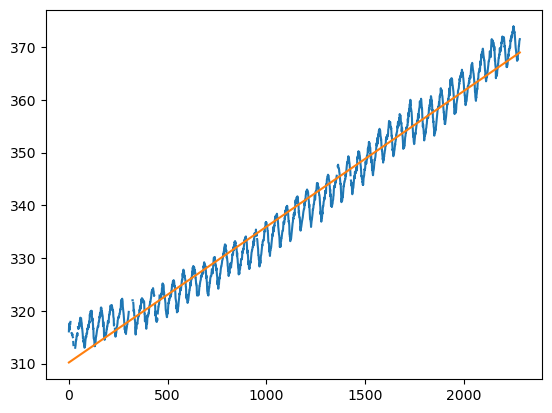

In [4]:
# 데이터 확인 및 추세 추정 (선형)
result = sm.OLS.from_formula(formula='co2~time', data=df).fit()
display(result.summary())

trend = result.params[0] + result.params[1] * df.index
plt.plot(df.time, df.co2, df.time, trend)
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 6.457e+04
Date:                Sat, 21 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:37:29   Log-Likelihood:                -4922.6
No. Observations:                2225   AIC:                             9851.
Df Residuals:                    2222   BIC:                             9868.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      314.1037      0.147   2143.355      0.000     313.816     314.391
time             0.0158      0.000     54.458      0.000       0.015       0.016
I(time ** 2)   4.29e-06   1.22e-07     35.169      0.000    4.05e-06    4.53e-06
==============================================================================
Omnibus:                      296.943   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.609
Skew:                          -0.091   Prob(JB):                     1.40e-17
Kurtosis:                       2.103   Cond. No.                     7.38e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

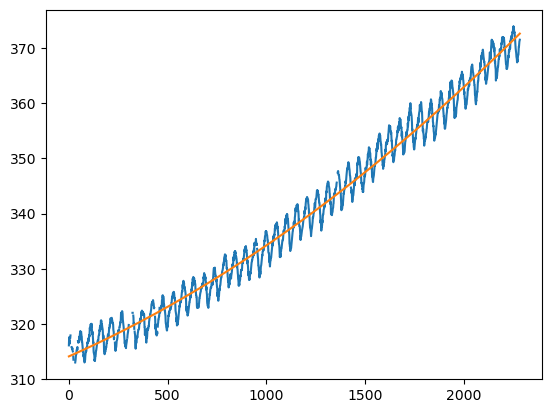

In [5]:
# 데이터 확인 및 추세 추정 (비선형)
result = sm.OLS.from_formula(formula='co2~time+I(time**2)', data=df).fit()
display(result.summary())

trend = result.params[0] + result.params[1] * df.time + result.params[2] * df.time**2
plt.plot(df.time, df.co2, df.time, trend)
plt.show()

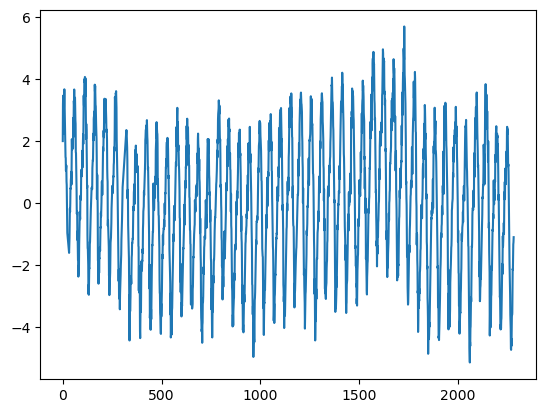

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


Stationarity_ADF  Stationarity_KPSS
Test Statistics                -12.90               0.18
p-value                          0.00               0.10
Used Lag                        24.00              28.00
Critical Value(1%)              -3.43               0.74
Critical Value(5%)              -2.86               0.46
Critical Value(10%)             -2.57               0.35

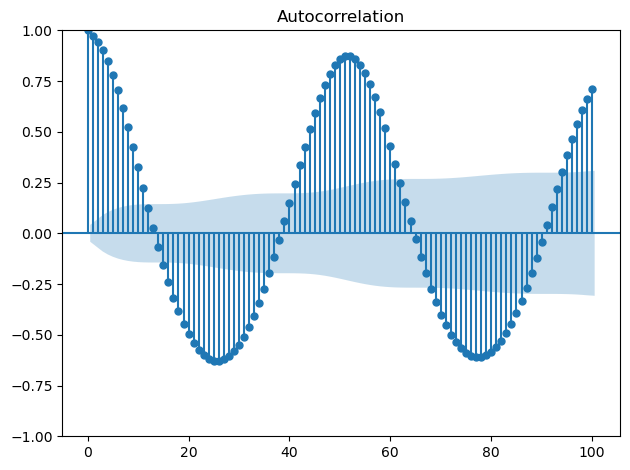

In [6]:
# 추세 제거 및 정상성 확인
## 방법1
plt.plot(result.resid)
plt.show()

print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
display(stationarity_ADF_KPSS(pd.DataFrame(result.resid)))

plot_acf(result.resid, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

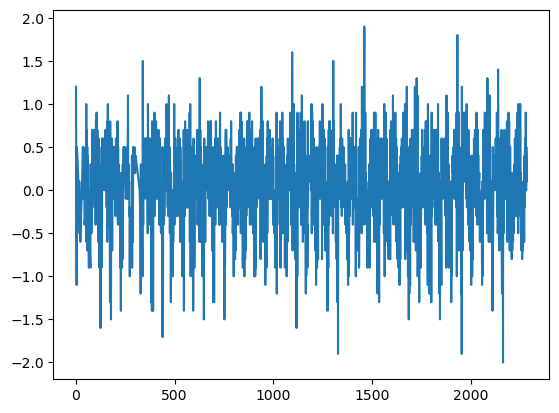

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


Stationarity_ADF  Stationarity_KPSS
Test Statistics                -14.66               0.01
p-value                          0.00               0.10
Used Lag                        26.00              25.00
Critical Value(1%)              -3.43               0.74
Critical Value(5%)              -2.86               0.46
Critical Value(10%)             -2.57               0.35

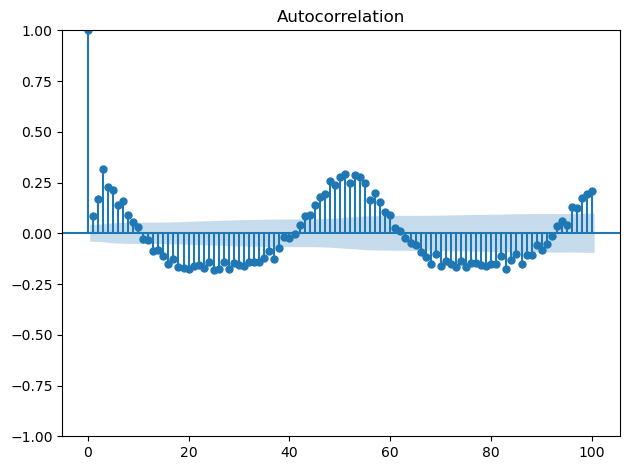

In [7]:
# 추세 제거 및 정상성 확인
## 방법2
plt.plot(df.co2.diff(1).dropna())
plt.show()

print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
display(stationarity_ADF_KPSS(pd.DataFrame(df.co2.diff(1).dropna())))

plot_acf(df.co2.diff(1).dropna(), lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

| **방법론** | **효과** | **CO2 농도<br>(회귀분석 추세제거)** | **CO2 농도<br>(차분 추세제거)** |
|:---:|:---:|:---:|:---:|
| **ADF Test<br>(H0: `비정상성`)** | 추세 제거 | `정상성` | `정상성` |
| **KPSS Test<br>(H0: `정상성`)** | 계절성 제거 | `정상성` | `정상성` |
| **ACF Plot** | 자기상관 제거 | 비정상성 | (덜)비정상성 |

## **계절성제거 실습:** 호흡기질환 사망자수

In [8]:
# 데이터 로딩
# deaths = sm.datasets.get_rdataset("deaths", package="MASS")
# df = deaths.data
location = os.path.join('.', 'Data', 'DeathsRDataset', 'deaths_MASS.csv')
df = pd.read_csv(location)
df.columns = ['time', 'value']
df

time  value
0  1,974.00   3035
1  1,974.08   2552
2  1,974.17   2704
3  1,974.25   2554
4  1,974.33   2014
..      ...    ...
67 1,979.58   1354
68 1,979.67   1333
69 1,979.75   1492
70 1,979.83   1781
71 1,979.92   1915

[72 rows x 2 columns]

In [9]:
# 시간변수 추출
df.time = pd.date_range('1974-01-01', periods=len(df), freq='M')
df['month'] = df.time.dt.month
df

time  value  month
0  1974-01-31   3035      1
1  1974-02-28   2552      2
2  1974-03-31   2704      3
3  1974-04-30   2554      4
4  1974-05-31   2014      5
..        ...    ...    ...
67 1979-08-31   1354      8
68 1979-09-30   1333      9
69 1979-10-31   1492     10
70 1979-11-30   1781     11
71 1979-12-31   1915     12

[72 rows x 3 columns]

time  value  month
67 1979-08-31   1354      8
68 1979-09-30   1333      9
69 1979-10-31   1492     10
70 1979-11-30   1781     11
71 1979-12-31   1915     12

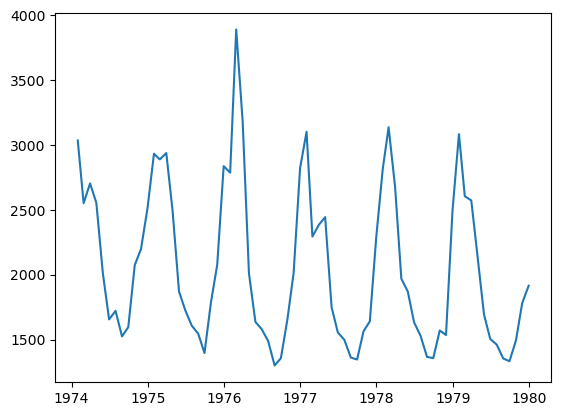

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


Stationarity_ADF  Stationarity_KPSS
Test Statistics                 -0.57               0.19
p-value                          0.88               0.10
Used Lag                        12.00               4.00
Critical Value(1%)              -3.55               0.74
Critical Value(5%)              -2.91               0.46
Critical Value(10%)             -2.59               0.35

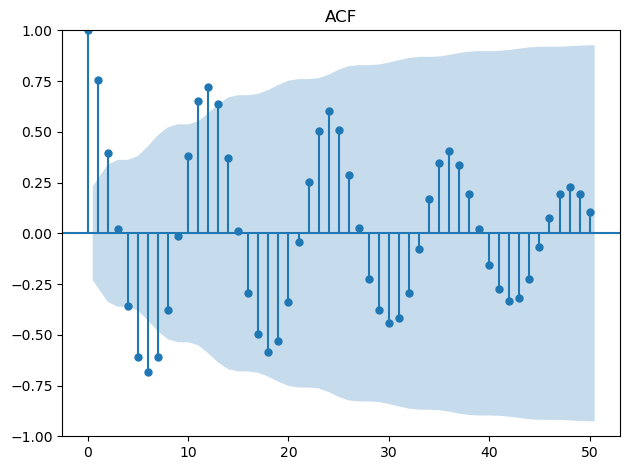

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     31.66
Date:                Sat, 21 Jan 2023   Prob (F-statistic):           6.55e-21
Time:                        13:37:31   Log-Likelihood:                -494.38
No. Observations:                  72   AIC:                             1013.
Df Residuals:                      60   BIC:                             1040.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[1]   2959.3333    103.831     28.502      0.000    2751.641    3167.025
C(month)[2]   2894.6667    103.831     27.879      0.000    2686.975    3102.359
C(month)[3]   2743.0000    103.831     26.418      0.000    2535.308    2950.692
C(month)[4]   2269.6667    103.831     21.859      0.000    2061.975    2477.359
C(month)[5]   1805.1667    103.831     17.386      0.000    1597.475    2012.859
C(month)[6]   1608.6667    103.831     15.493      0.000    1400.975    1816.359
C(month)[7]   1550.8333    103.831     14.936      0.000    1343.141    1758.525
C(month)[8]   1408.3333    103.831     13.564      0.000    1200.641    1616.025
C(month)[9]   1397.3333    103.831     13.458      0.000    1189.641    1605.025
C(month)[10]  1690.0000    103.831     16.277      0.000    1482.308    1897.692
C(month)[11]  1874.0000    103.831     18.049      0.000    1666.308    2081.692
C(month)[12]  2478.5000    103.831     23.871      0.000    2270.808    2686.192
==============================================================================
Omnibus:                       19.630   Durbin-Watson:                   1.374
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.630
Skew:                           0.787   Prob(JB):                     1.67e-11
Kurtosis:                       6.750   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

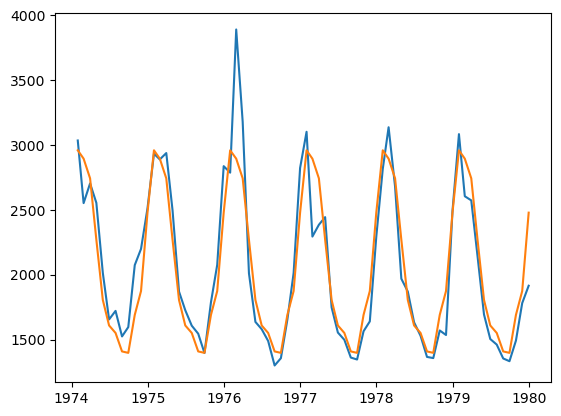

In [10]:
# 데이터 확인 및 추세 추정
display(df.tail())
plt.plot(df.time, df.value)
plt.show()

print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
display(stationarity_ADF_KPSS(pd.DataFrame(df.value)))
plot_acf(df.value, lags=50, use_vlines=True, title='ACF')
plt.tight_layout()
plt.show()

result = sm.OLS.from_formula(formula='value ~ C(month) - 1', data=df).fit()
display(result.summary())

plt.plot(df.time, df.value, df.time, result.fittedvalues)
plt.show()

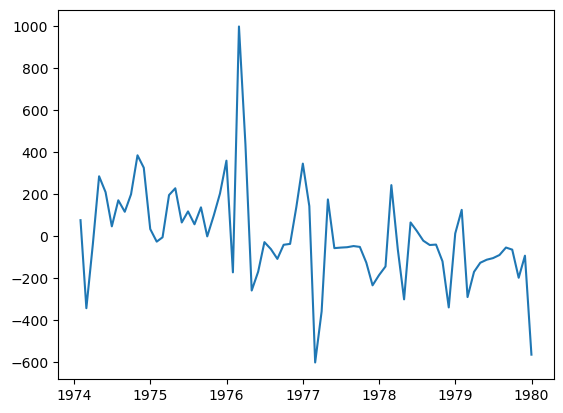

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


Stationarity_ADF  Stationarity_KPSS
Test Statistics                 -5.84               1.09
p-value                          0.00               0.01
Used Lag                         0.00               2.00
Critical Value(1%)              -3.53               0.74
Critical Value(5%)              -2.90               0.46
Critical Value(10%)             -2.59               0.35

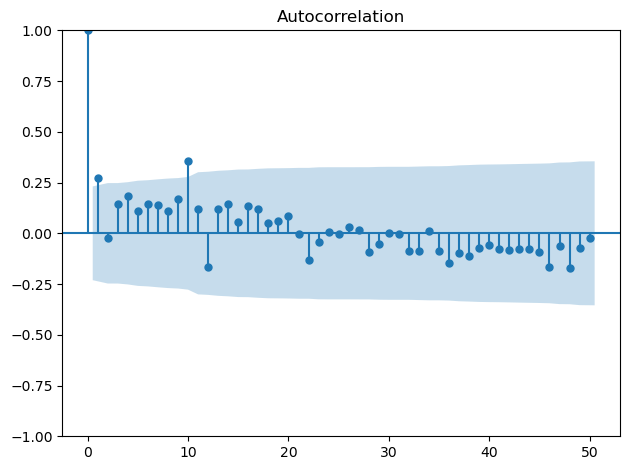

In [11]:
# 추세 제거 및 정상성 확인
## 방법1
plt.plot(df.time, result.resid)
plt.show()

print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
display(stationarity_ADF_KPSS(pd.DataFrame(result.resid)))

plot_acf(result.resid, lags=50, use_vlines=True)
plt.tight_layout()
plt.show()

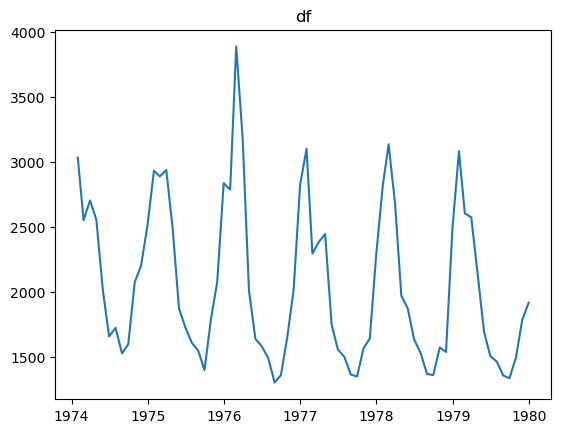

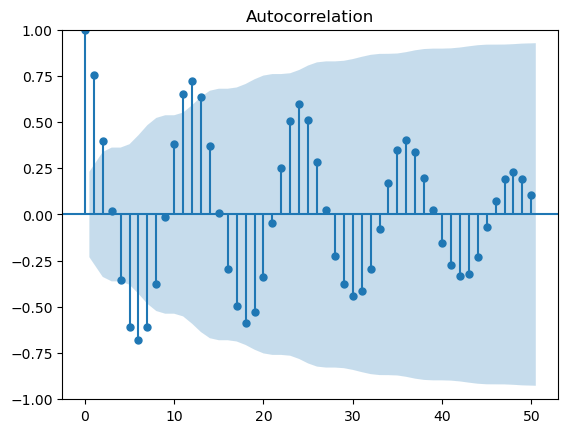

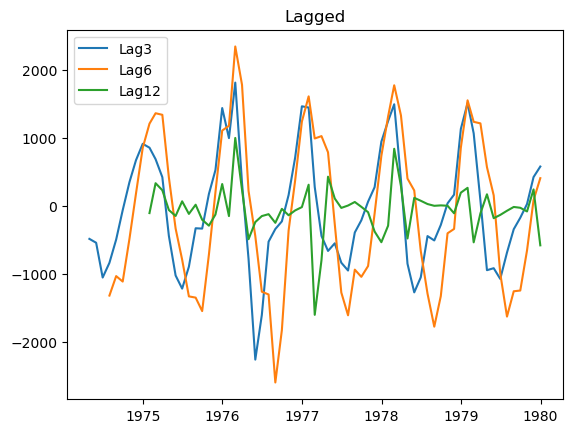

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


Stationarity_ADF  Stationarity_KPSS
Test Statistics                 -4.30               0.03
p-value                          0.00               0.10
Used Lag                        11.00               4.00
Critical Value(1%)              -3.56               0.74
Critical Value(5%)              -2.92               0.46
Critical Value(10%)             -2.60               0.35

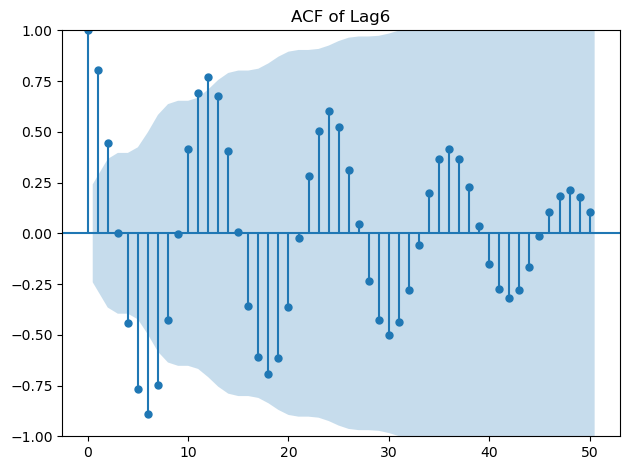

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


Stationarity_ADF  Stationarity_KPSS
Test Statistics                 -2.14               0.11
p-value                          0.23               0.10
Used Lag                        11.00               7.00
Critical Value(1%)              -3.57               0.74
Critical Value(5%)              -2.92               0.46
Critical Value(10%)             -2.60               0.35

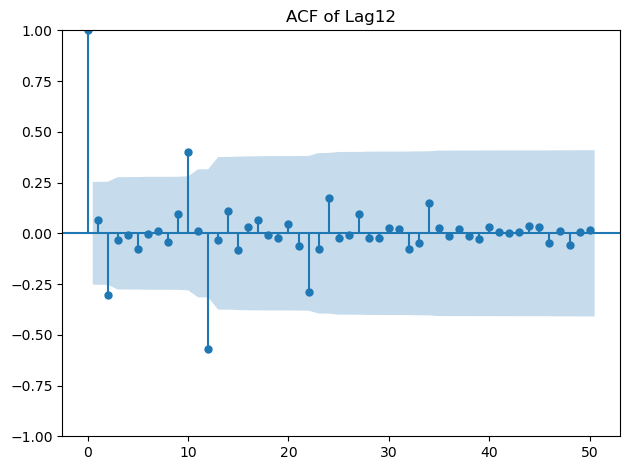

In [12]:
# 계절성 제거 및 정상성 확인
## 방법2
plt.plot(df.time, df.value)
plt.title('df')
plt.show()
plot_acf(df.value, lags=50, use_vlines=True)
plt.show()

seasonal_lag = 3
plt.plot(df.time[seasonal_lag:], df.value.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
seasonal_lag = 6
plt.plot(df.time[seasonal_lag:], df.value.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
seasonal_lag = 12
plt.plot(df.time[seasonal_lag:], df.value.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
plt.title('Lagged')
plt.legend()
plt.show()

seasonal_lag = 6
print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
display(stationarity_ADF_KPSS(pd.DataFrame(df.value.diff(seasonal_lag).dropna())))
plot_acf(df.value.diff(seasonal_lag).dropna(), lags=50, 
         use_vlines=True, title='ACF of Lag{}'.format(seasonal_lag))
plt.tight_layout()
plt.show()

seasonal_lag = 12
print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
display(stationarity_ADF_KPSS(pd.DataFrame(df.value.diff(seasonal_lag).dropna())))
plot_acf(df.value.diff(seasonal_lag).dropna(), lags=50, 
         use_vlines=True, title='ACF of Lag{}'.format(seasonal_lag))
plt.tight_layout()
plt.show()

| **방법론** | **효과** | **호흡기 사망자수** | **호흡기 사망자수<br>(회귀분석 계절성제거)** | **호흡기 사망자수<br>(Lag6 차분 계절성제거)** | **호흡기 사망자수<br>(Lag12 차분 계절성제거)** |
|:---:|:---:|:---:|:---:|:---:|:---:|
| **ADF Test<br>(H0: `비정상성`)** | 추세 제거 | 비정상성 | `정상성` | `정상성` | 비정상성 |
| **KPSS Test<br>(H0: `정상성`)** | 계절성 제거 | `정상성` | 비정상성 | `정상성` | `정상성` |
| **ACF Plot** | 자기상관 제거 | 비정상성 | `정상성` | 비정상성 | `정상성` |

## **차분변환 실습:** 랜덤워크/백색잡음

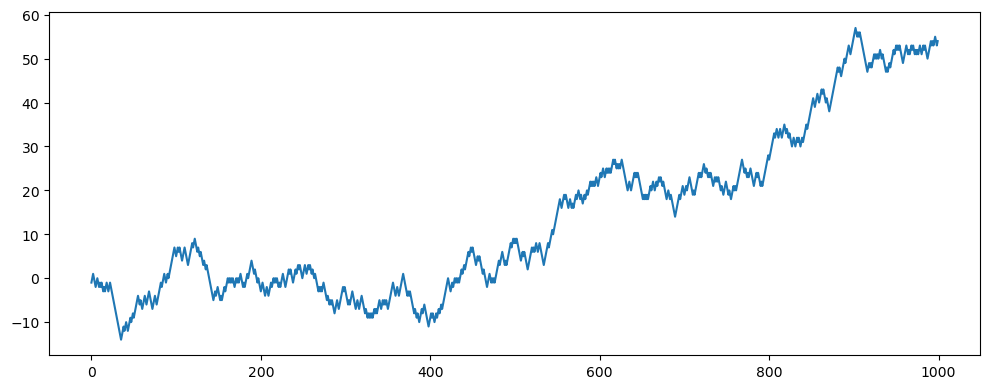

'Before a difference:'

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


Stationarity_ADF  Stationarity_KPSS
Test Statistics                  0.34               4.29
p-value                          0.98               0.01
Used Lag                         0.00              19.00
Critical Value(1%)              -3.44               0.74
Critical Value(5%)              -2.86               0.46
Critical Value(10%)             -2.57               0.35

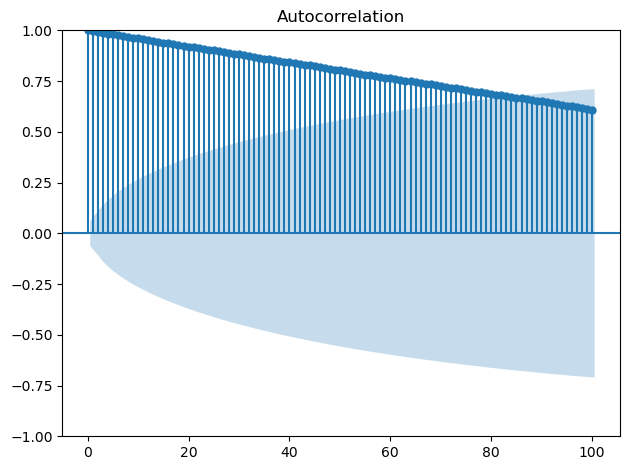

'After a difference:'

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


Stationarity_ADF  Stationarity_KPSS
Test Statistics                -31.08               0.23
p-value                          0.00               0.10
Used Lag                         0.00               4.00
Critical Value(1%)              -3.44               0.74
Critical Value(5%)              -2.86               0.46
Critical Value(10%)             -2.57               0.35

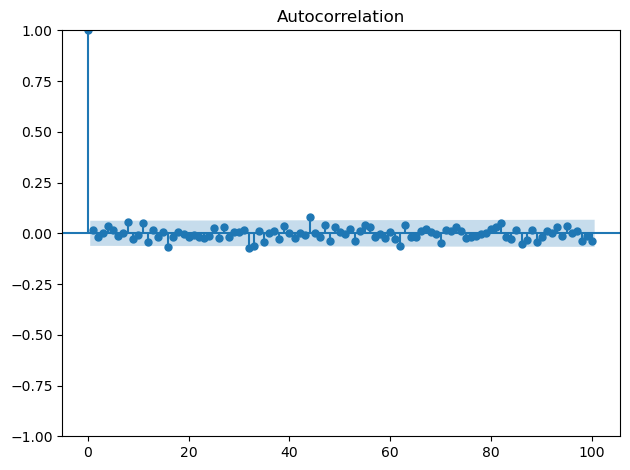

In [13]:
# 랜덤워크 데이터 생성
plt.figure(figsize=(10, 4))
random.seed(1)
random_walk = [-1 if random.random() < 0.5 else 1]
for i in range(1, 1000):
    white_noise = -1 if random.random() < 0.5 else 1
    value = random_walk[i-1] + white_noise
    random_walk.append(value)
plt.plot(random_walk)
plt.tight_layout()
plt.show()

# 차분 전 랜덤워크 정상성 테스트
display('Before a difference:')
print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
display(stationarity_ADF_KPSS(pd.DataFrame(random_walk)))
plot_acf(random_walk, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

# 차분 후 랜덤워크 정상성 테스트
display('After a difference:')
print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
display(stationarity_ADF_KPSS(pd.DataFrame(pd.Series(random_walk).diff(1).dropna())))
plot_acf(pd.Series(random_walk).diff(1).dropna(), lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

| **방법론** | **효과** | **랜덤 워크** | **랜덤 워크(차분후)** |
|:---:|:---:|:---:|:---:|
| **ADF Test<br>(H0: `비정상성`)** | 추세 제거 | 비정상성 | `정상성` |
| **KPSS Test<br>(H0: `정상성`)** | 계절성 제거 | 비정상성 | `정상성` |
| **ACF Plot** | 자기상관 제거 | 비정상성 | `정상성` |

H0 of ADF:  비정상상태


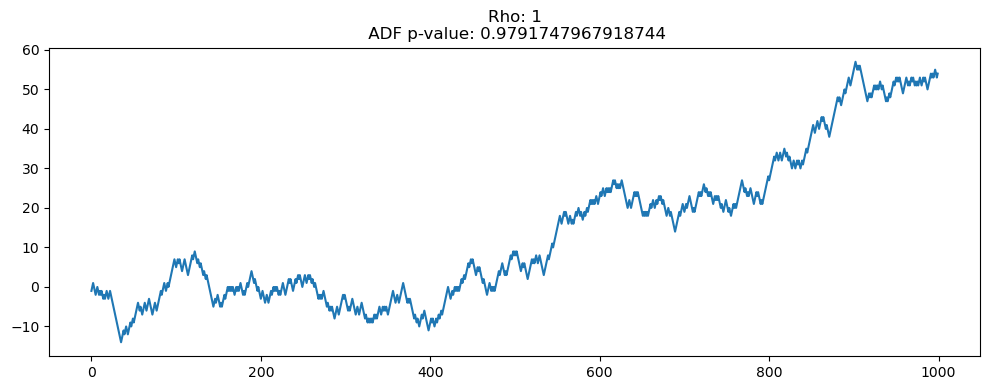

In [14]:
# 랜덤워크 데이터 생성 및 통계량 Test
# rho 값을 변화시키면서 언제 비정상이 되는지 파악?
# 정상성의 계수 범위 추론 가능!
plt.figure(figsize=(10, 4))
random.seed(1)
rho = 1    # 0.3, 0.6, 0.9, 1
random_walk = [-1 if random.random() < 0.5 else 1]
for i in range(1, 1000):
    white_noise = -1 if random.random() < 0.5 else 1
    value = rho * random_walk[i-1] + white_noise
    random_walk.append(value)
plt.plot(random_walk)

print('H0 of ADF: ', '비정상상태')
plt.title('Rho: {}\n ADF p-value: {}'.format(rho, stationarity_ADF_KPSS(pd.DataFrame(random_walk)).T['p-value'][0]))
plt.tight_layout()
plt.show()

## **정규분포변환 실습:** 항공사 승객수요

Optimal Lambda:  0.14802265137037945


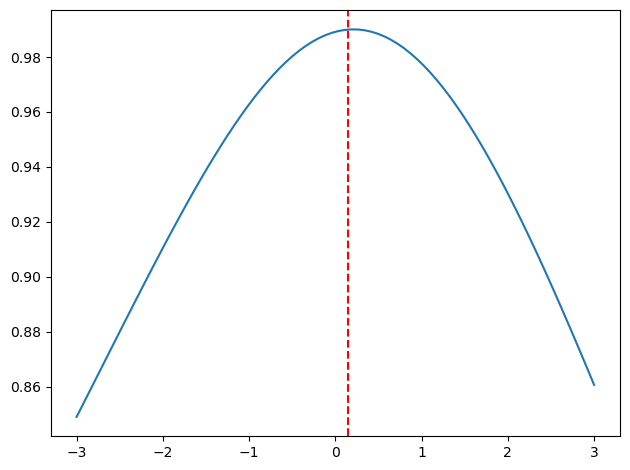

In [15]:
# 데이터 준비
data = sm.datasets.get_rdataset("AirPassengers")
df = data.data.copy()

# Box-Cox 변환 모수 추정
# 정규분포의 특정 범위(x)에서 lambda를 바꿔가며 정규성(measure:y)이 가장 높은 lambda(l_opt)를 선정
x, y = sp.stats.boxcox_normplot(df.value, la=-3, lb=3)
y_transfer, l_opt = sp.stats.boxcox(df.value)
print('Optimal Lambda: ', l_opt)

plt.plot(x, y)
plt.axvline(x=l_opt, color='r', ls="--")
plt.tight_layout()
plt.show()

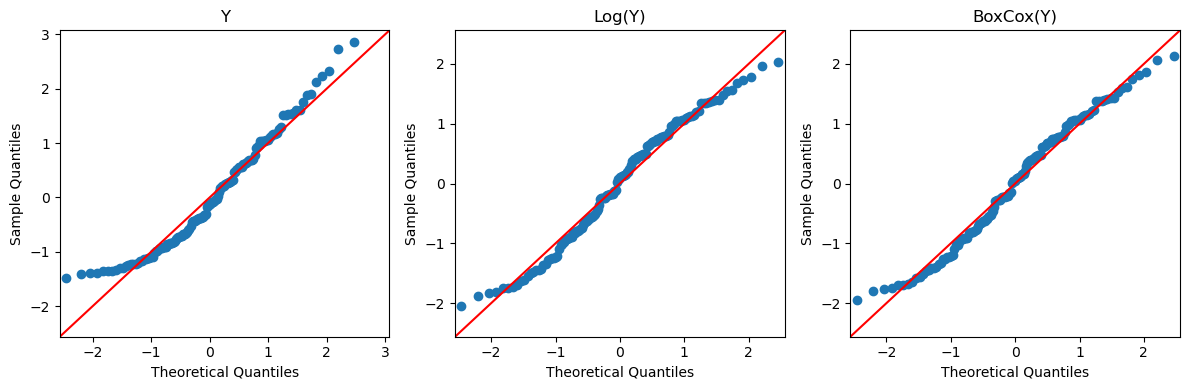

In [16]:
# 변환 전후에 따른 결과 차이 확인
plt.figure(figsize=(12,4))
sm.qqplot(df.value, fit=True, line='45', ax=plt.subplot(131))
plt.title('Y')
sm.qqplot(np.log(df.value), fit=True, line='45', ax=plt.subplot(132))
plt.title('Log(Y)')
sm.qqplot(y_transfer, fit=True, line='45', ax=plt.subplot(133))
plt.title('BoxCox(Y)')
plt.tight_layout()
plt.show()

## **분산/추세/계절성처리 실습:** 항공사 승객수요

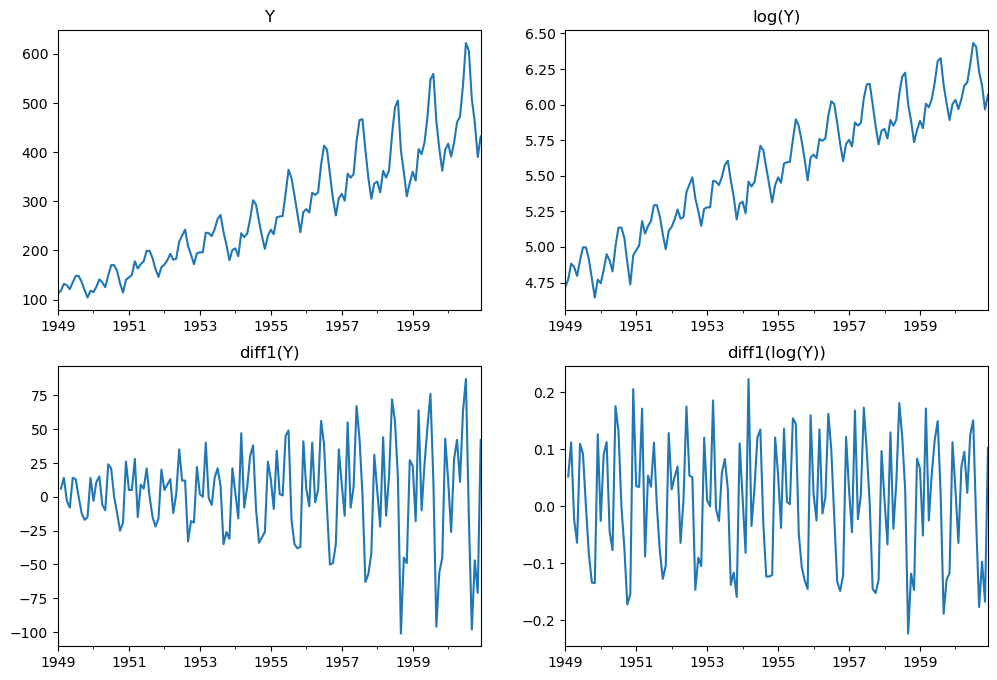

In [17]:
# 데이터 준비
data = sm.datasets.get_rdataset("AirPassengers")
df = data.data.copy()

# 데이터 전처리
## 시간 인덱싱
if 'time' in df.columns:
    df.index = pd.date_range(start='1/1/1949', periods=len(df['time']), freq='M')
    del df['time']

## 정상성 확보
plt.figure(figsize=(12,8))
df.plot(ax=plt.subplot(221), title='Y', legend=False)
np.log(df).plot(ax=plt.subplot(222), title='log(Y)', legend=False)
df.diff(1).plot(ax=plt.subplot(223), title='diff1(Y)', legend=False)
np.log(df).diff(1).plot(ax=plt.subplot(224), title='diff1(log(Y))', legend=False)
plt.show()

'Non-transfer:'

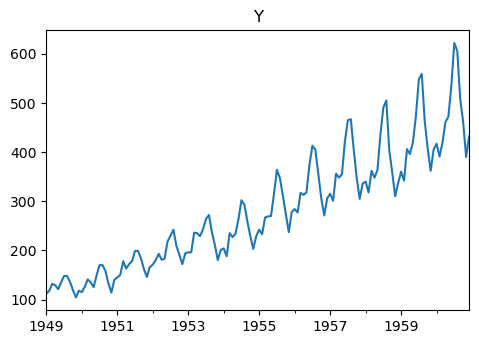

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


Stationarity_ADF  Stationarity_KPSS
Test Statistics                  0.82               1.65
p-value                          0.99               0.01
Used Lag                        13.00               8.00
Critical Value(1%)              -3.48               0.74
Critical Value(5%)              -2.88               0.46
Critical Value(10%)             -2.58               0.35

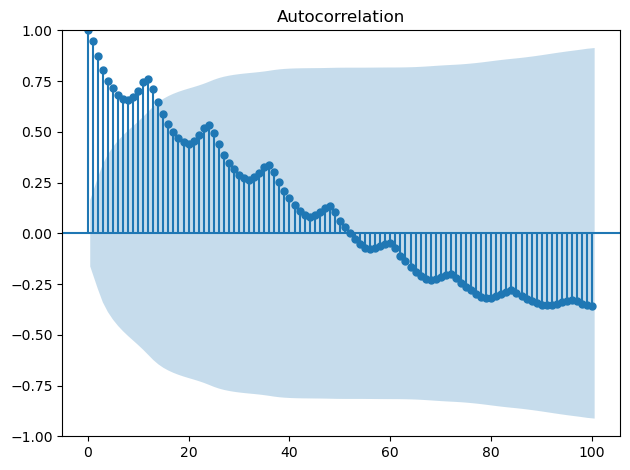

'Log transfer:'

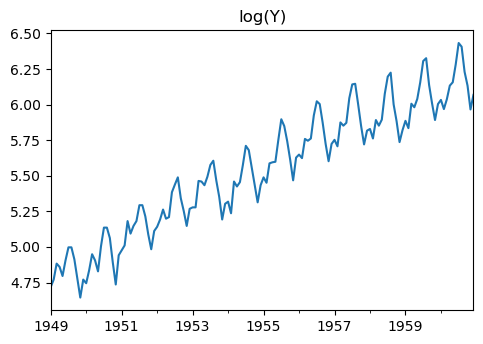

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


Stationarity_ADF  Stationarity_KPSS
Test Statistics                 -1.72               1.67
p-value                          0.42               0.01
Used Lag                        13.00               8.00
Critical Value(1%)              -3.48               0.74
Critical Value(5%)              -2.88               0.46
Critical Value(10%)             -2.58               0.35

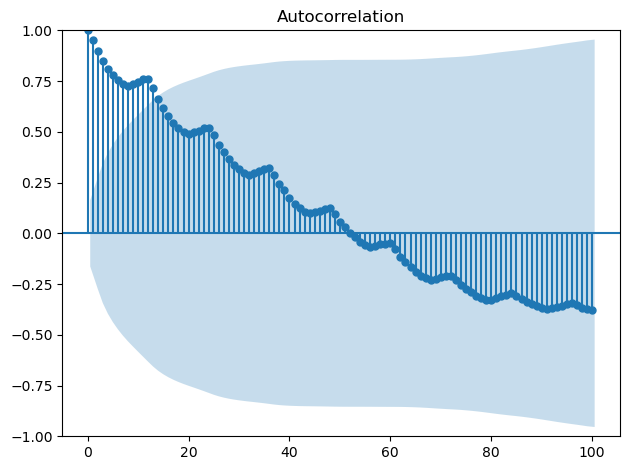

Trend Difference:  1


'Log and trend diffrence transfer:'

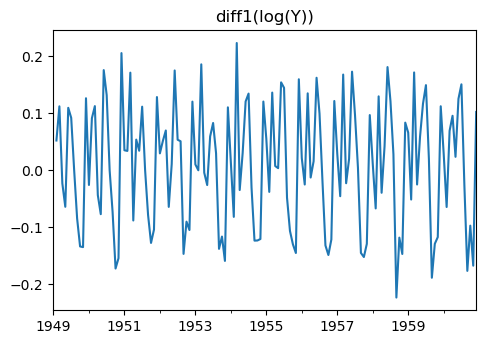

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


Stationarity_ADF  Stationarity_KPSS
Test Statistics                 -2.72               0.04
p-value                          0.07               0.10
Used Lag                        14.00               6.00
Critical Value(1%)              -3.48               0.74
Critical Value(5%)              -2.88               0.46
Critical Value(10%)             -2.58               0.35

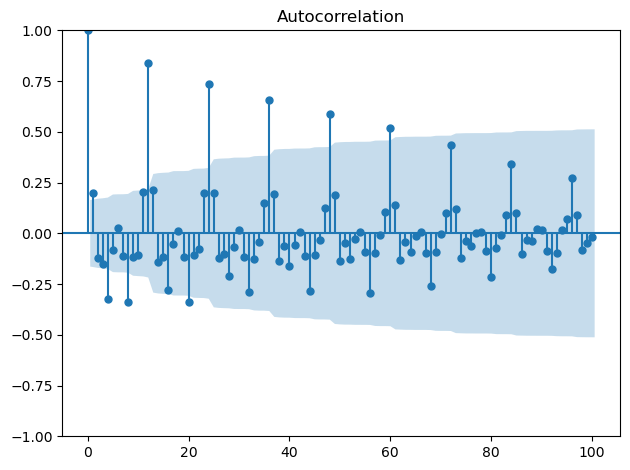

Seasonal Difference:  12


'Log and trend+seasonal diffrence transfer:'

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


Stationarity_ADF  Stationarity_KPSS
Test Statistics                 -4.44               0.07
p-value                          0.00               0.10
Used Lag                        12.00               3.00
Critical Value(1%)              -3.49               0.74
Critical Value(5%)              -2.89               0.46
Critical Value(10%)             -2.58               0.35

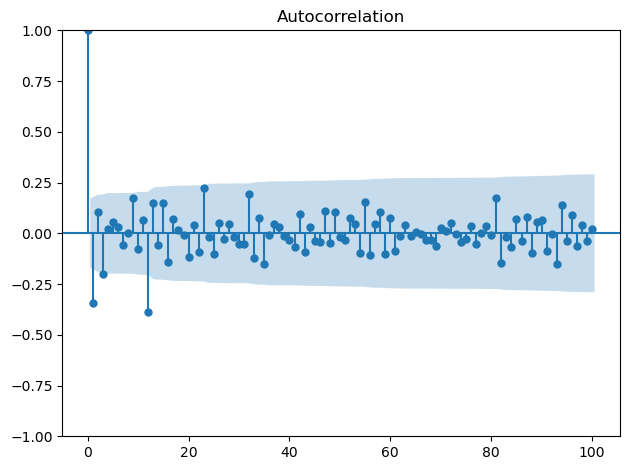

In [18]:
## 정상성 테스트
### 미변환
display('Non-transfer:')
plt.figure(figsize=(12,8))
df.plot(ax=plt.subplot(222), title='Y', legend=False)
plt.show()

candidate_none = df.copy()
print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
display(stationarity_ADF_KPSS(pd.DataFrame(candidate_none.values.flatten())))
plot_acf(candidate_none, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

### 로그 변환
display('Log transfer:')
plt.figure(figsize=(12,8))
np.log(df).plot(ax=plt.subplot(222), title='log(Y)', legend=False)
plt.show()

candidate_trend = np.log(df).copy()
print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
display(stationarity_ADF_KPSS(pd.DataFrame(candidate_trend.values.flatten())))
plot_acf(candidate_trend, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

trend_diff_order_initial = 0
result = stationarity_ADF_KPSS(pd.DataFrame(candidate_trend.values.flatten())).T
if result.loc['Stationarity_ADF', 'p-value'] < 0.1:
    trend_diff_order = trend_diff_order_initial
else:
    trend_diff_order = trend_diff_order_initial + 1
print('Trend Difference: ', trend_diff_order)

### 로그+추세차분 변환
display('Log and trend diffrence transfer:')
plt.figure(figsize=(12,8))
np.log(df).diff(trend_diff_order).plot(ax=plt.subplot(224), title='diff1(log(Y))', legend=False)
plt.show()

candidate_seasonal = candidate_trend.diff(trend_diff_order).dropna().copy()
print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
display(stationarity_ADF_KPSS(pd.DataFrame(candidate_seasonal.values.flatten())))
plot_acf(candidate_seasonal, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

seasonal_diff_order = int(sm.tsa.acf(candidate_seasonal)[1:].argmax() + 1)
print('Seasonal Difference: ', seasonal_diff_order)

### 로그+추세차분+계절차분 변환
display('Log and trend+seasonal diffrence transfer:')
candidate_final = candidate_seasonal.diff(seasonal_diff_order).dropna().copy()
print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
display(stationarity_ADF_KPSS(pd.DataFrame(candidate_final.values.flatten())))
plot_acf(candidate_final, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

| **방법론** | **효과** | **항공사 승객수요** | **항공사 승객수요<br>(Log)** | **항공사 승객수요<br>(Log+추세차분)** | **항공사 승객수요<br>(Log+추세차분+계절성차분)** |
|:---:|:---:|:---:|:---:|:---:|:---:|
| **ADF Test<br>(H0: `비정상성`)** | 추세 제거 | 비정상성 | 비정상성 | 비정상성 | `정상성` |
| **KPSS Test<br>(H0: `정상성`)** | 계절성 제거 | 비정상성 | 비정상성 | `정상성` | `정상성` |
| **ACF Plot** | 자기상관 제거 | 비정상성 | 비정상성 | 비정상성 | `정상성` |

# **일반 선형과정 알고리즘(General Linear Process)**

> **"시계열 데이터가 `가우시안 백색잡음의 현재값과 과거값의 선형조합`"**  

\begin{align*}
Y_t = \epsilon_t + \psi_1\epsilon_{t-1} + \psi_2\epsilon_{t-2} + \cdots \\
\end{align*}
\begin{align*}
where~\epsilon_i \sim i.i.d.~WN(0, \sigma_{\epsilon_i}^2)~and~\displaystyle \sum_{i=1}^{\infty}\psi_i^2 < \infty
\end{align*}

---

- **세부 알고리즘:**
> - `White Noise`(WN)
> - `Moving Average`(MA)
> - `Auto-Regressive`(AR)
> - `Auto-Regressive Moving Average`(ARMA)
> - `Auto-Regressive Integrated Moving Average`(ARIMA)
> - `ARIMAX`
> - `Seasonal ARIMA`(SARIMA)
> - `SARIMAX`

## White Noise

<center><img src='Image/Expert/White_Noise.png' width='450'></center>
    
> **(1) 잔차들은 `정규분포`이고, (unbiased) `평균 0이고 일정한 분산`을 가져야 함:** 
>
> $$
\begin{align*}
\{\epsilon_t : t = \dots, -1, 0, 1, \dots\} & \sim N(0,\sigma^2_{\epsilon_t}) \\
\text{where  } \epsilon_t & \sim \text{i.i.d(independent and identically distributed)} \\
\epsilon_t &= Y_t - \hat{Y_t} \\
E(\epsilon_t) &= 0 \\
Var(\epsilon_t) &= \sigma^2_{\epsilon_t} \\
Cov(\epsilon_s, \epsilon_k) &= 0 \text{ for different times!(s $\ne$ k)}
\end{align*}
$$
>
> **(2) 잔차들이 시간의 흐름에 따라 `상관성이 없어야` 함:** `자기상관함수(Autocorrelation Fundtion, ACF)=0` 확인
>
> - **공분산(Covariance):** 
>
> <center>$Cov(Y_s, Y_k)$ = $E[(Y_s-E(Y_s))$$(Y_k-E(Y_k))]$ = $\gamma_{s,k}$</center>
>
> - **자기상관함수(Autocorrelation Function):** 
>
> <center>$Corr(Y_s, Y_k)$ = $\dfrac{Cov(Y_s, Y_k)}{\sqrt{Var(Y_s)Var(Y_k)}}$ = $\dfrac{\gamma_{s,k}}{\sqrt{\gamma_s \gamma_k}}$</center>
>
> - **편자기상관함수(Partial Autocorrelation Function):** $s$와 $k$사이의 `상관성을 제거한 자기상관함수`
>
> <center>$Corr[(Y_s-\hat{Y}_s, Y_{s-t}-\hat{Y}_{s-t})]$  for $1<t<k$</center>

**1) 예시: 가우시안 백색잡음**

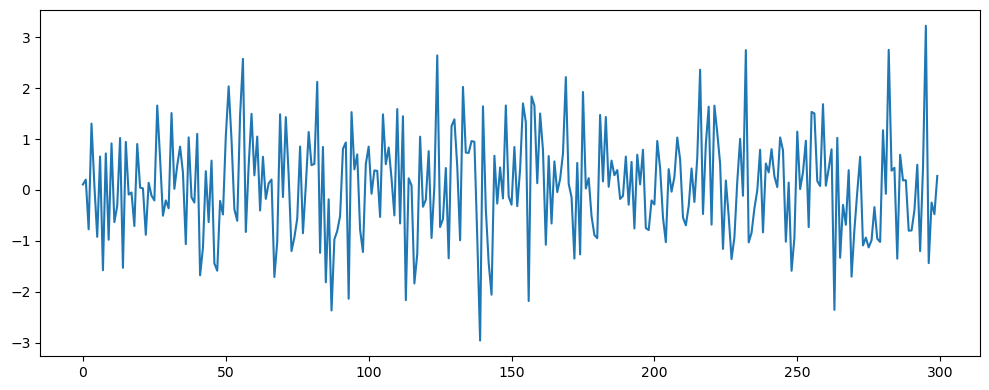

In [19]:
plt.figure(figsize=(10, 4))
plt.plot(stats.norm.rvs(size=300))
plt.tight_layout()
plt.show()

**2) 예시: 베르누이 백색잡음**

> 백색잡음의 기반 확률분포가 반드시 `정규분포일 필요는 없음`

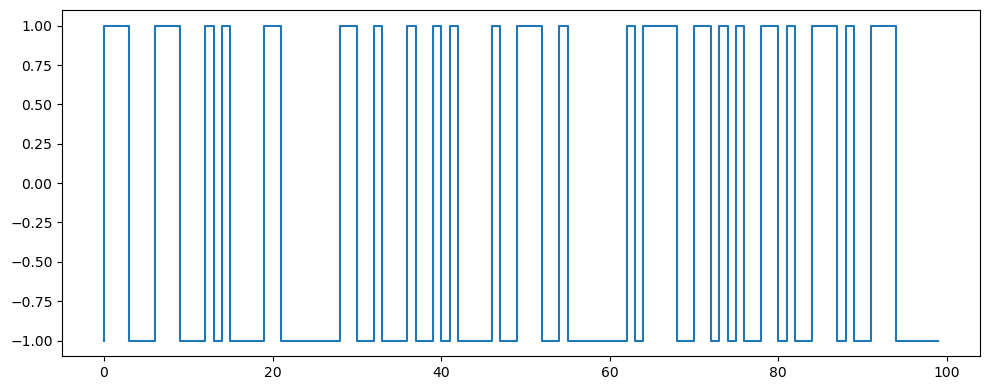

In [20]:
plt.figure(figsize=(10, 4))
samples = stats.bernoulli.rvs(0.5, size=100) * 2 - 1
plt.step(np.arange(len(samples)), samples)
plt.ylim(-1.1, 1.1)
plt.tight_layout()
plt.show()

## Moving Average(MA)

> **"$MA(q)$: 알고리즘의 차수($q$)가 `유한한 가우시안 백색잡음과정의 선형조합`"**
> 
> - `Exponential Smoothing` 내  Moving Average Smoothing은 `과거의 Trend-Cycle을 추정`
> - MA는 `미래 값을 예측`하기 위함

\begin{align*}
Y_t &= \epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q} 
\end{align*}
\begin{align*}
where~\epsilon_i \sim i.i.d.~WN(0, \sigma_{\epsilon_i}^2)~and~\displaystyle \sum_{i=1}^{\infty}\theta_i^2 < \infty
\end{align*}
\begin{align*}
Y_t &= \epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q} \\
&= \epsilon_t + \theta_1L\epsilon_t + \theta_2L^2\epsilon_t + \cdots + \theta_qL^q\epsilon_t \\ 
&= (1 + \theta_1L + \theta_2L^2 + \cdots + \theta_qL^q)\epsilon_t \\
&= \theta(L)\epsilon_t \\
\end{align*}
\begin{align*}
where~\epsilon_{t-1} = L\epsilon_t~and~\epsilon_{t-2} = L^2\epsilon_t
\end{align*}

---

- **MA(1):**  

\begin{align*}
\text{Main Equation} && Y_t &= \epsilon_t + \theta_1\epsilon_{t-1} \\
\text{Expectation}   && E(Y_t) &= E(\epsilon_t + \theta_1\epsilon_{t-1}) = E(\epsilon_t) + \theta_1E(\epsilon_{t-1}) = 0 \\
\text{Variance}   && Var(Y_t) &= E[(\epsilon_t + \theta_1\epsilon_{t-1})^2] \\
&& &= E(\epsilon_t^2) + 2\theta_1E(\epsilon_{t}\epsilon_{t-1}) + \theta_1^2E(\epsilon_{t-1}^2) \\
&& &= \sigma_{\epsilon_i}^2 + 2 \theta_1 \cdot 0 + \theta_1^2 \sigma_{\epsilon_i}^2 \\
&& &= \sigma_{\epsilon_i}^2 + \theta_1^2\sigma_{\epsilon_i}^2 \\
\text{Covariance} && Cov(Y_t, Y_{t-1}) = \gamma_1 &= \text{E} \left[ (\epsilon_t + \theta_1 \epsilon_{t-1})(\epsilon_{t-1} + \theta_1 \epsilon_{t-2}) \right] \\
&& &= E (\epsilon_t \epsilon_{t-1}) + \theta_1 E (\epsilon_t \epsilon_{t-2}) + \theta_1 E (\epsilon_{t-1}^2) + \theta_1^2 E (\epsilon_{t-1} \epsilon_{t-2}) \\
&& &= 0 + \theta_1 \cdot 0 + \theta_1 \sigma_{\epsilon_{i}}^2 + \theta_1^2 \cdot 0 \\
&& &= \theta_1 \sigma_{\epsilon_{i}}^2   \\
&& Cov(Y_t, Y_{t-2}) = \gamma_2 &= \text{E} \left[ (\epsilon_t + \theta_1 \epsilon_{t-1})(\epsilon_{t-2} + \theta_1 \epsilon_{t-3}) \right] \\
&& &= E (\epsilon_t \epsilon_{t-2}) + \theta_1 E (\epsilon_t \epsilon_{t-3}) + \theta_1 E (\epsilon_{t-1} \epsilon_{t-2}) + \theta_1^2 E (\epsilon_{t-1} \epsilon_{t-3}) \\
&& &= 0 + \theta_1 \cdot 0 + \theta_1 \cdot 0 + \theta_1^2 \cdot 0 \\
&& &= 0 \\
\text{Autocorrelation} && Corr(Y_t, Y_{t-1}) = \rho_1 &= \dfrac{\theta_1}{1+\theta_1^2} \\
&& Corr(Y_t, Y_{t-i}) = \rho_i &= 0~~for~~i > 1 \\
\end{align*}

- **MA(2):**  

\begin{align*}
\text{Main Equation} && Y_t &= \epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} \\
\text{Expectation}   && E(Y_t) &= E(\epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2}) = E(\epsilon_t) + \theta_1E(\epsilon_{t-1}) + \theta_2E(\epsilon_{t-2}) = 0 \\
\text{Variance}   && Var(Y_t) &= E[(\epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2})^2] \\
&& &= \sigma_{\epsilon_i}^2 + \theta_1^2\sigma_{\epsilon_i}^2 + \theta_2^2\sigma_{\epsilon_i}^2 \\
\text{Covariance} && Cov(Y_t, Y_{t-1}) = \gamma_1 &= \text{E} \left[ (\epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2\epsilon_{t-2})(\epsilon_{t-1} + \theta_1 \epsilon_{t-2} + \theta_2\epsilon_{t-3}) \right] \\
&& &= (\theta_1 + \theta_1\theta_2) \sigma_{\epsilon_{i}}^2   \\
&& Cov(Y_t, Y_{t-2}) = \gamma_2 &= \text{E} \left[ (\epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2\epsilon_{t-2})(\epsilon_{t-2} + \theta_1 \epsilon_{t-3} + \theta_2\epsilon_{t-4}) \right] \\
&& &= \theta_2 \sigma_{\epsilon_{i}}^2   \\
&& Cov(Y_t, Y_{t-i}) = \gamma_i &= 0~~for~~i > 2 \\
\text{Autocorrelation} && Corr(Y_t, Y_{t-1}) = \rho_1 &= \dfrac{\theta_1 + \theta_1 \theta_2}{1+\theta_1^2+\theta_2^2} \\
&& Corr(Y_t, Y_{t-2}) = \rho_2 &= \dfrac{\theta_2}{1+\theta_1^2+\theta_2^2} \\
&& Corr(Y_t, Y_{t-i}) = \rho_i &= 0~~for~~i > 2 \\
\end{align*}

> **움직임 특성:**
- **Stationarity Condition of MA(1):** $|\theta_1| < 1$ 
- **Stationarity Condition of MA(2):** $|\theta_2| < 1$, $\theta_1 + \theta_2 > -1$, $\theta_1 - \theta_2 < 1$ 

---

- **MA(q):**  

\begin{align*}
\text{Autocorrelation} && Corr(Y_t, Y_{t-i}) = \rho_i &= 
\begin{cases} 
\dfrac{\theta_i + \theta_1\theta_{i-1}  + \theta_2\theta_{i-2} + \cdots + \theta_q\theta_{i-q}}{1 + \theta_1^2 + \cdots  + \theta_q^2} & \text{ for } i= 1, 2, \cdots, q \\ 
0 & \text{ for } i > q \\ 
\end{cases}
\end{align*}

<center><img src='Image/Expert/TS_Estimation_MA.png' width='500'>(https://dinonotes.com/archives/2476)</center>


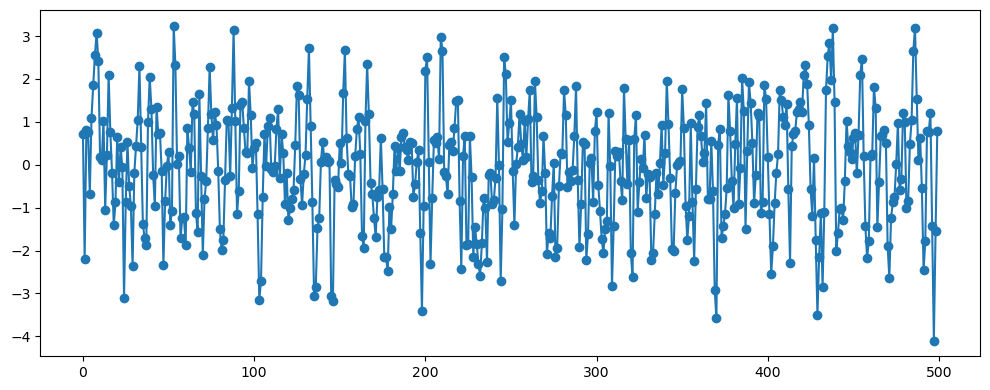

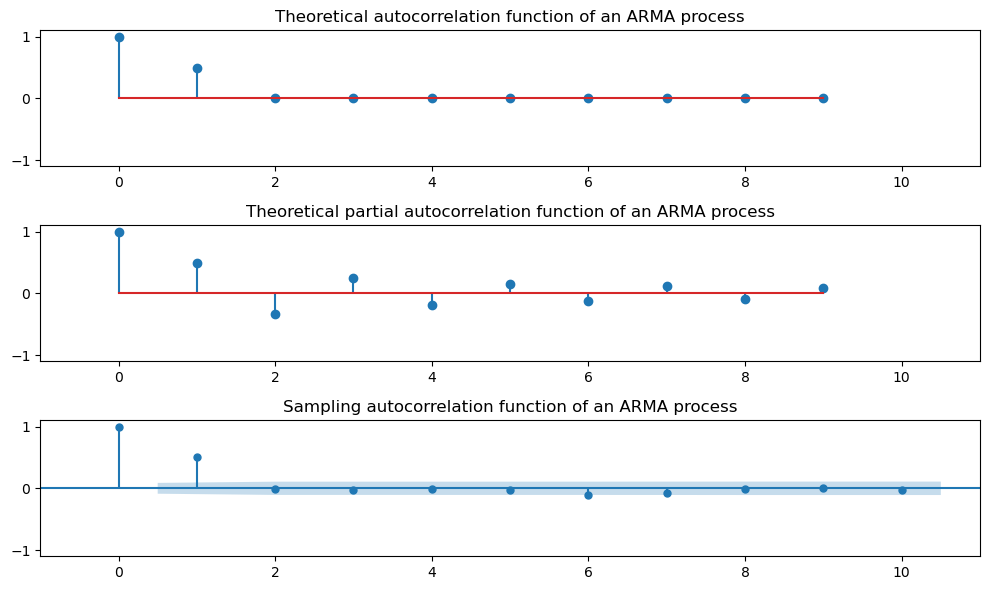

In [21]:
### MA(1)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([0.9])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

plot_acf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

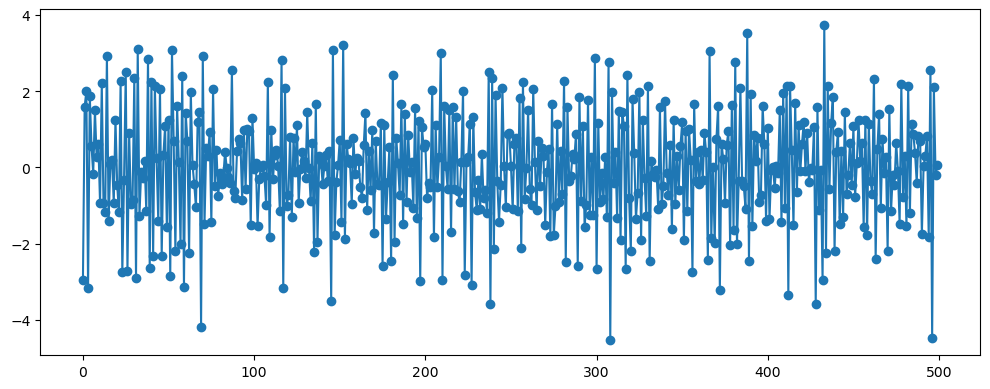

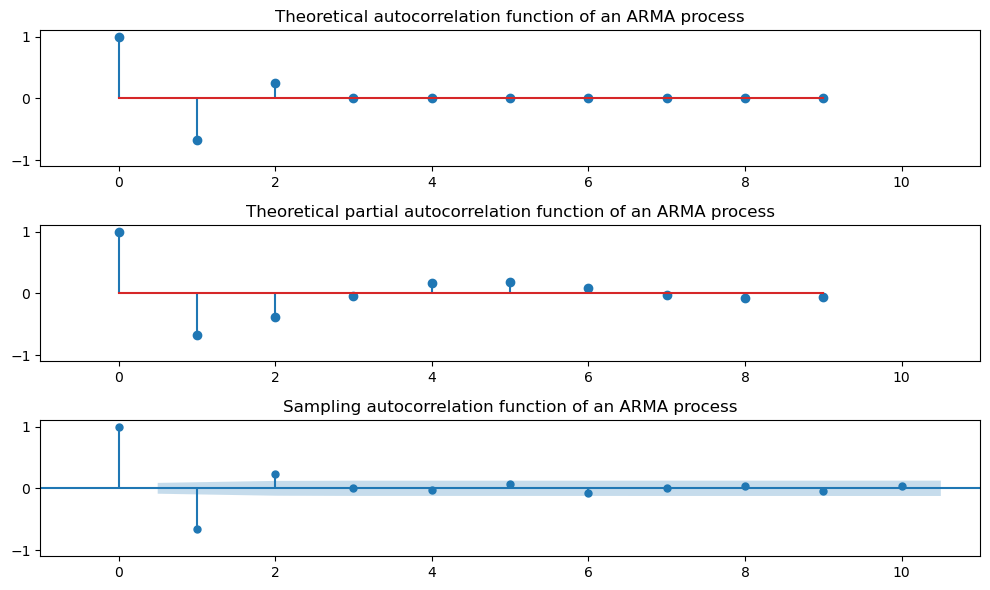

In [22]:
### MA(2)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([-1, 0.6])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

plot_acf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

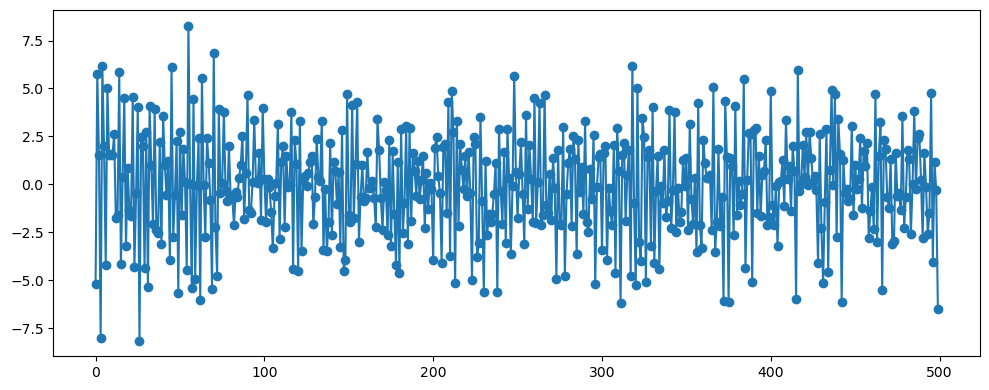

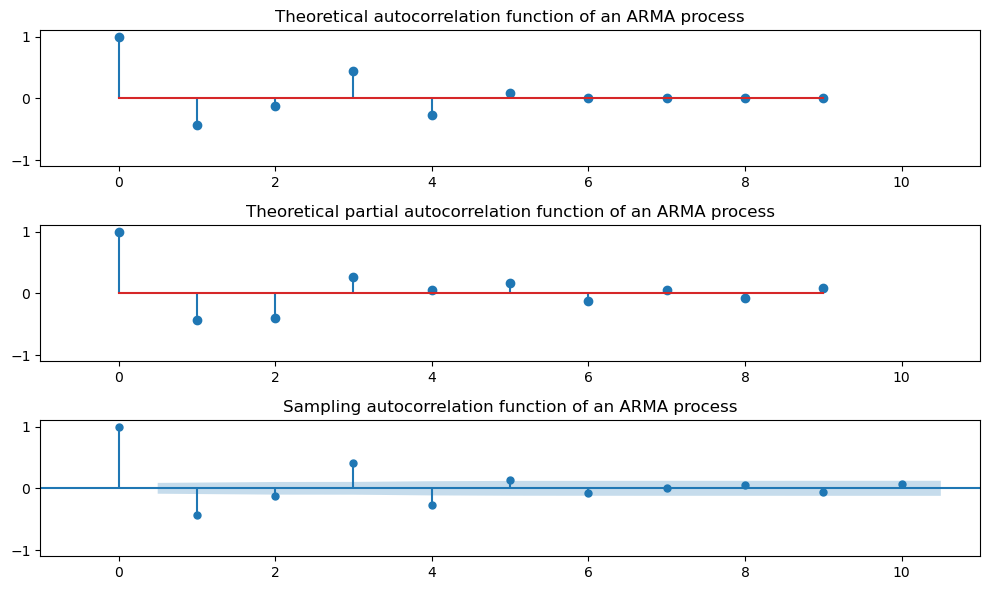

In [23]:
### MA(5)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([-1, 1.6, 0.9, -1.5, 0.7])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

plot_acf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

## Auto Regressive(AR)

> **"$AR(p)$: 알고리즘의 차수($p$)가 `유한한 자기자신의 과거값들의 선형조합`"**
>
> - **필요성:** $MA$모형에서 `ACF가 시차(Lag)가 증가해도 0이 되지 않고 오랜시간 남아있는 경우`에 $MA$모형의 차수가 $\infty$로 감

\begin{align*}
Y_t &= \phi_1Y_{t-1} + \phi_2Y_{t-2} + \cdots + \phi_pY_{t-p} + \epsilon_t \\
\end{align*}
\begin{align*}
where~\epsilon_i \sim i.i.d.~WN(0, \sigma_{\epsilon_i}^2)~and~\displaystyle \sum_{i=1}^{\infty}\phi_i^2 < \infty
\end{align*}
\begin{align*}
Y_t &= \phi_1Y_{t-1} + \phi_2Y_{t-2} + \cdots + \phi_pY_{t-p} + \epsilon_t \\
Y_t - \phi_1Y_{t-1} - \phi_2Y_{t-2} - \cdots - \phi_pY_{t-p} &= \epsilon_t \\
Y_t - \phi_1LY_t - \phi_2L^2Y_t - \cdots - \phi_pL^pY_t &= \epsilon_t \\
(1 - \phi_1L - \phi_2L^2 - \cdots - \phi_pL^p)Y_t &= \epsilon_t \\
\phi(L)Y_t &= \epsilon_t \\
\end{align*}
\begin{align*}
where~Y_{t-1} = LY_t~and~Y_{t-2} = L^2Y_t
\end{align*}

---

- **AR(1):**  

\begin{align*}
\text{Main Equation} && Y_t &= \phi_1 Y_{t-1} + \epsilon_t \\
&& &= \phi_1 (\phi_1 Y_{t-2} + \epsilon_{t-1}) + \epsilon_t \\
&& &= \phi_1^2 Y_{t-2} + \phi_1 \epsilon_{t-1} + \epsilon_t \\
&& &= \phi_1^2  (\phi_1 Y_{t-3} + \epsilon_{t-2}) + \phi_1 \epsilon_{t-1} + \epsilon_t \\
&& &= \phi_1^3 Y_{t-3} + \phi_1^2 \epsilon_{t-2} + \phi_1 \epsilon_{t-1} + \epsilon_t \\
&& & \vdots \\
&& &= \epsilon_t + \phi_1 \epsilon_{t-1} +\phi_1^2 \epsilon_{t-2} + \phi_1^3 \epsilon_{t-3} + \cdots  \\
&& &= MA(\infty) \\
\text{Expectation}   && E(Y_t) &= \mu = E(\phi_1 Y_{t-1} + \epsilon_t) = \phi_1 E(Y_{t-1}) + E(\epsilon_{t}) = \phi_1 \mu + 0 \\
&& (1-\phi_1)\mu &= 0 \\
&& \mu &= 0~~if~~\phi_1 \neq 1 \\
\text{Variance}   && Var(Y_t) &= \gamma_0 = E(Y_t^2) = E[(\phi_1 Y_{t-1} + \epsilon_t)^2] = E[ \phi_1^2  Y_{t-1}^2 + 2\phi_1 Y_{t-1} \epsilon_{t} + \epsilon_{t}^2] \\
&& &= \phi_1^2 E[ Y_{t-1}^2 ] + 2 \phi E[ Y_{t-1} \epsilon_{t} ] + E[ \epsilon_{t}^2 ] \\
&& &= \phi_1^2 \gamma_0 + 0 + \sigma_{\epsilon_i}^2 \\
&& (1-\phi_1^2)\gamma_0 &= \sigma_{\epsilon_i}^2 \\
&& \gamma_0 &= \dfrac{\sigma_{\epsilon_i}^2}{1-\phi_1^2}~~if~~\phi_1^2 \neq 1 \\
\text{Covariance} && Cov(Y_t, Y_{t-1}) &= \gamma_1 = E [(\phi_1 Y_{t-1} + \epsilon_t)(\phi_1 Y_{t-2} + \epsilon_{t-1})] \\
&& &= \phi_1^2E (Y_{t-1} Y_{t-2}) + \phi_1 E (Y_{t-1} \epsilon_{t-1}) + \phi_1 E (\epsilon_{t} Y_{t-2}) + E (\epsilon_{t} \epsilon_{t-1}) \\
&& &= \phi_1^2\gamma_1 + \phi_1 \sigma_{\epsilon_{i}}^2 + \phi_1 \cdot 0 + 0 \\
&& (1 - \phi_1^2)\gamma_1 &= \phi_1 \sigma_{\epsilon_{i}}^2 \\
&& \gamma_1 &= \dfrac{\phi_1 \sigma_{\epsilon_{i}}^2}{1 - \phi_1^2} \\
&& Cov(Y_t, Y_{t-2}) &= \gamma_2 = E [(\phi_1 Y_{t-1} + \epsilon_t)(\phi_1 Y_{t-3} + \epsilon_{t-2})] \\
&& &= \phi_1^2E (Y_{t-1} Y_{t-3}) + \phi_1 E (Y_{t-1} \epsilon_{t-2}) + \phi_1 E (\epsilon_{t} Y_{t-3}) + E (\epsilon_{t} \epsilon_{t-2}) \\
&& &= \phi_1^2\gamma_2 + \phi_1 E[(\phi_1Y_{t-2}+\epsilon_{t-1})\epsilon_{t-2}] + \phi_1 \cdot 0 + 0 \\
&& &= \phi_1^2\gamma_2 + \phi_1^2 E(Y_{t-2}\epsilon_{t-2}) + \phi_1 E(\epsilon_{t-1}\epsilon_{t-2}) \\
&& &= \phi_1^2\gamma_2 + \phi_1^2 \sigma_{\epsilon_{i}}^2 + 0 \\
&& (1 - \phi_1^2)\gamma_2 &= \phi_1^2 \sigma_{\epsilon_{i}}^2 \\
&& \gamma_2 &= \dfrac{\phi_1^2 \sigma_{\epsilon_{i}}^2}{1 - \phi_1^2} \\
\text{Autocorrelation} && Corr(Y_t, Y_{t-1}) = \rho_1 &= \phi_1 \\
&& Corr(Y_t, Y_{t-2}) = \rho_2 &= \phi_1^2 \\
&& Corr(Y_t, Y_{t-i}) = \rho_i &= \phi_1^i \\
\end{align*}

> **움직임 특성:**
- $\phi_1 = 0$: $Y_t$는 `백색잡음`  
- $\phi_1 < 0$: `부호를 바꿔가면서(진동하면서)` 지수적으로 감소  
- $\phi_1 > 0$: 시차가 증가하면서 자기상관계수는 `지수적으로 감소`  
- $\phi_1 = 1$: $Y_t$는 비정상성인 `랜덤워크(Random Walk)`

\begin{align*}
Y_t &= Y_{t-1} + \epsilon_t \\
Var(Y_t) &= Var(Y_{t-1} + \epsilon_t) \\
&= Var(Y_{t-1}) + Var(\epsilon_t)  \;\; (\text{independence}) \\
Var(Y_t) &> Var(Y_{t-1})
\end{align*}

- **Stationarity Condition:** $|\phi_1| < 1$

---

- **AR(2):**  

\begin{align*}
\text{Main Equation} && Y_t &= \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \epsilon_t \\
&& &= \phi_1 (\phi_1 Y_{t-2} + \epsilon_{t-1}) + \phi_2 (\phi_2 Y_{t-3} + \epsilon_{t-2}) + \epsilon_t \\
&& &= \phi_1^2 Y_{t-2} + \phi_1 \epsilon_{t-1} + \phi_2^2 Y_{t-3} + \phi_2 \epsilon_{t-2} + \epsilon_t \\
&& &= \phi_1^2 (\phi_1 Y_{t-3} + \phi_2 Y_{t-4} + \epsilon_{t-3}) + \phi_1 \epsilon_{t-1} + 
\phi_2^2 (\phi_1 Y_{t-4} + \phi_2 Y_{t-5} + \epsilon_{t-4}) + \phi_2 \epsilon_{t-2} + \epsilon_t \\
&& & \vdots \\
&& &= \epsilon_t + \phi_1 \epsilon_{t-1} + \phi_2 \epsilon_{t-1} + \phi_1^2 \epsilon_{t-2} + \phi_2^2 \epsilon_{t-2} + \phi_1^3 \epsilon_{t-3} + \phi_2^3 \epsilon_{t-3} + \cdots  \\
&& &= MA(\infty) \\
\text{Expectation}   && E(Y_t) &= \mu = E(\phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \epsilon_t) = \phi_1 E(Y_{t-1}) + \phi_2 E(Y_{t-2}) + E(\epsilon_{t}) = \phi_1 \mu + \phi_2 \mu + 0 \\
&& (1-\phi_1-\phi_2)\mu &= 0 \\
&& \mu &= 0~~if~~\phi_1+\phi_2 \neq 1 \\
\text{Covariance("Yule-Walker Equation")} && \gamma_i &= E(Y_tY_{t-i}) = E[(\phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \epsilon_t)Y_{t-i}] \\
&& &= E(\phi_1 Y_{t-1}Y_{t-i}) + E(\phi_2 Y_{t-2}Y_{t-i}) + E(\epsilon_t Y_{t-i}) \\
&& &= \phi_1 \gamma_{i-1} + \phi_2 \gamma_{i-2} \\
\text{Autocorrelation} && Corr(Y_t, Y_{t-i}) &= \rho_i = \phi_1 \rho_{i-1} + \phi_2 \rho_{i-2} \\
&& \rho_1 &= \phi_1 \rho_{0} + \phi_2 \rho_{-1} = \phi_1 \cdot 1 + \phi_2 \rho_{1} \\
&& (1-\phi_2)\rho_1 &= \phi_1 \\
&& \rho_1 &= \dfrac{\phi_1}{1-\phi_2} \\
&& & \vdots \\
&& \rho_2 &= \dfrac{\phi_1^2 + \phi_2(1-\phi_2)}{1-\phi_2} \\
&& & \vdots \\
&& \rho_i &= \left( 1+\dfrac{1+\phi_2}{1-\phi_2} \cdot i \right)\left(\dfrac{\phi_1}{2} \right)^i \\
\end{align*}

> **움직임 특성:**
- 시차가 증가하면서 자기상관계수의 절대값은 `지수적으로 감소`  
- 진동 주파수에 따라 다르지만 `진동 가능`

- **Stationarity Condition:** $|\phi_1| < 1$, $\phi_1 + \phi_2 < 1$, $\phi_2 - \phi_1 < 1$ 

---

<center><img src='Image/Expert/TS_Estimation_AR.png' width='500'>(https://dinonotes.com/archives/2476)</center>

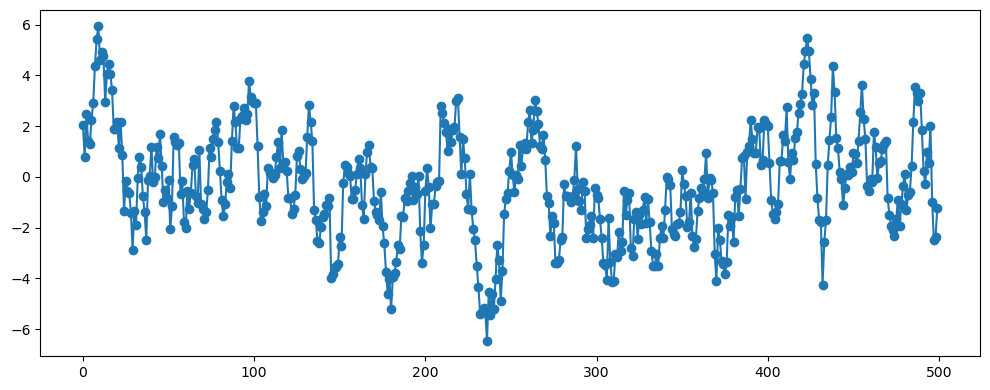

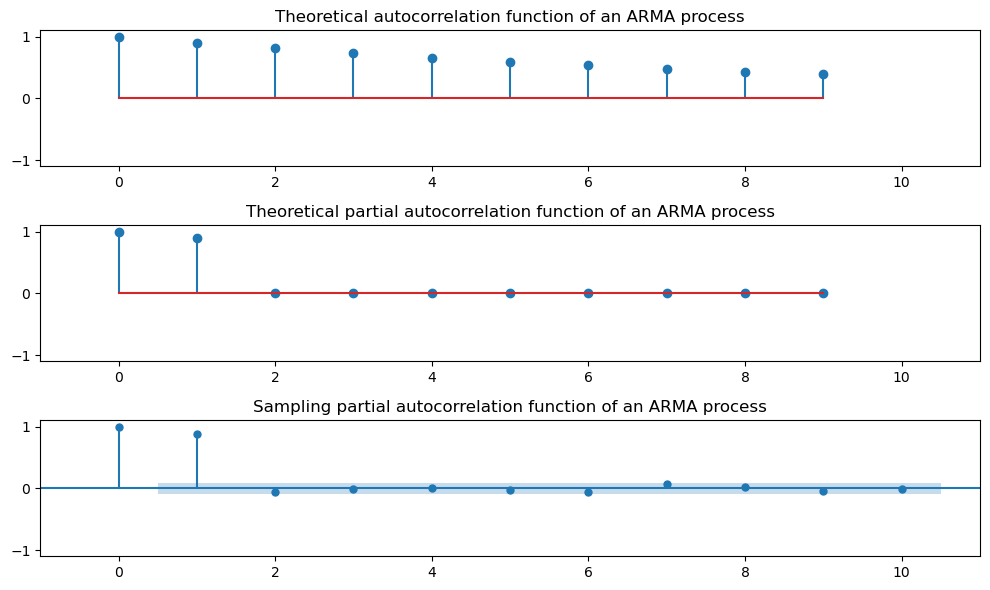

In [24]:
### AR(1)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([0.9])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

plot_pacf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling partial autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

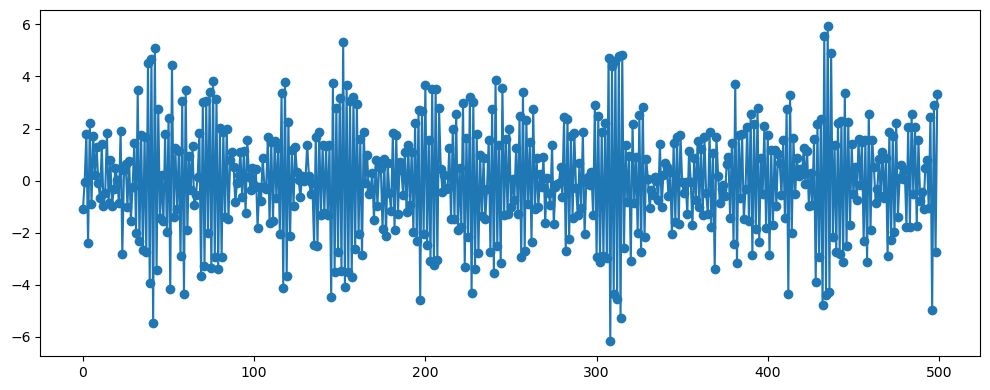

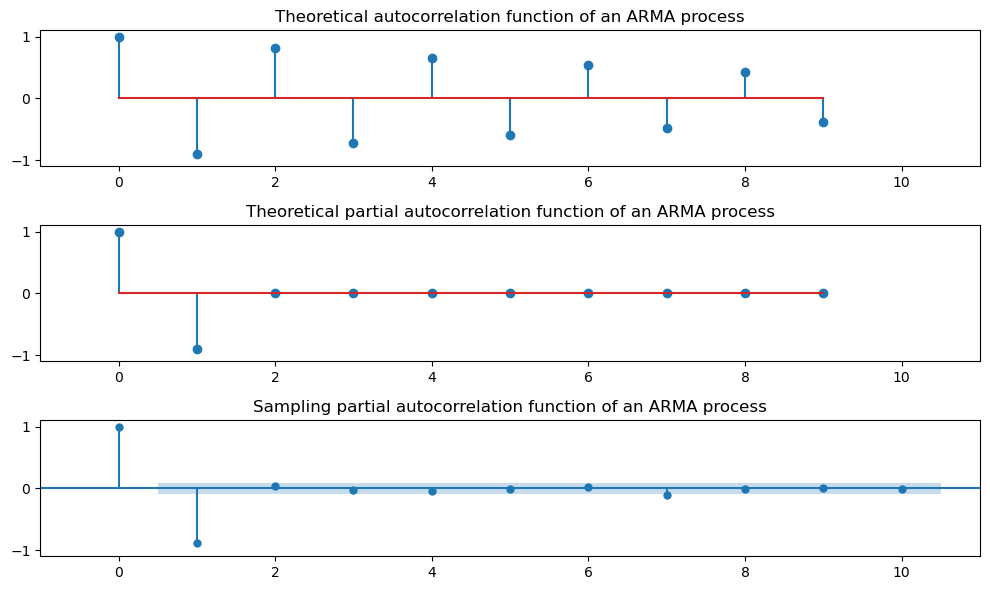

In [25]:
### AR(1)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([-0.9])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

plot_pacf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling partial autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

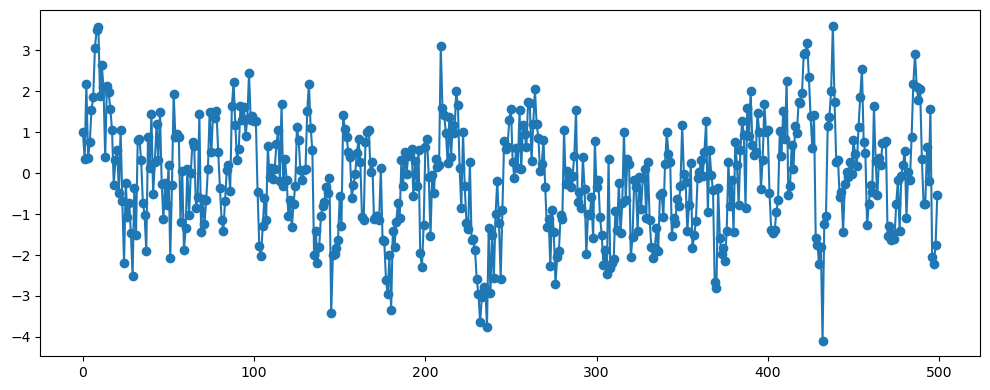

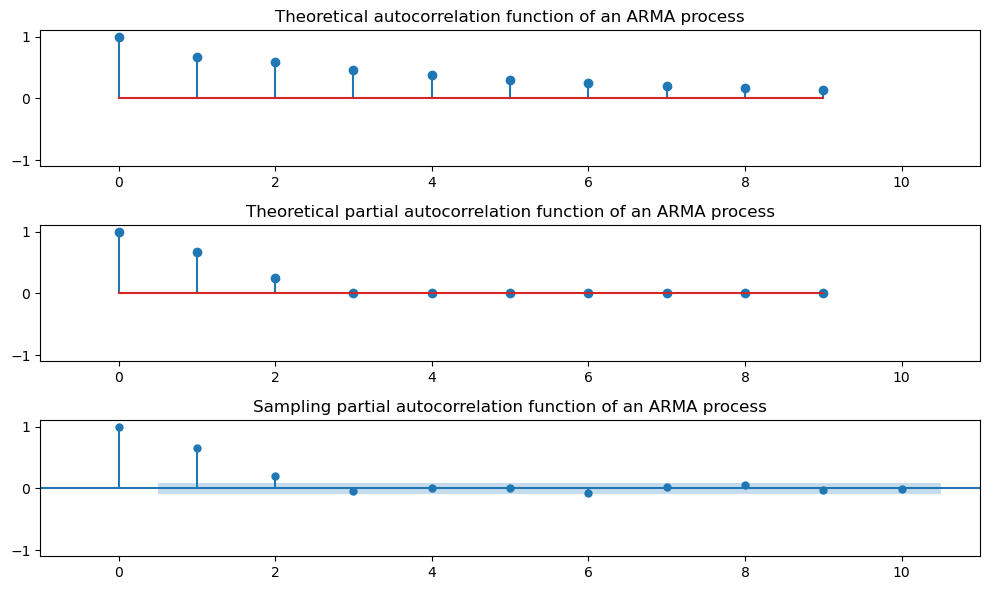

In [26]:
### AR(2)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([0.5, 0.25])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

plot_pacf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling partial autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

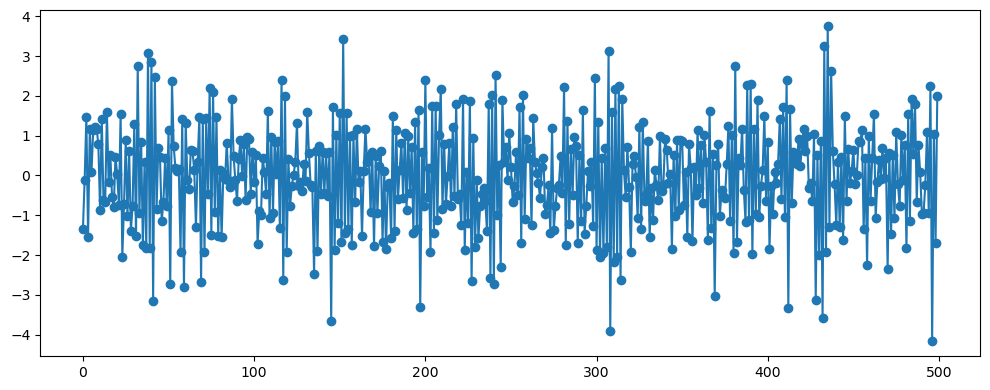

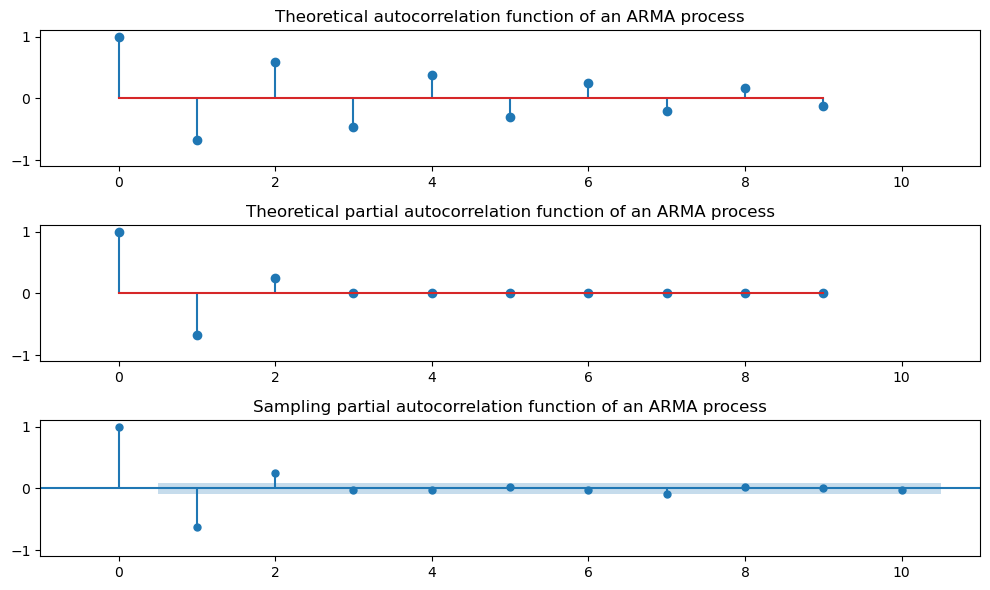

In [27]:
### AR(2)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([-0.5, 0.25])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

plot_pacf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling partial autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

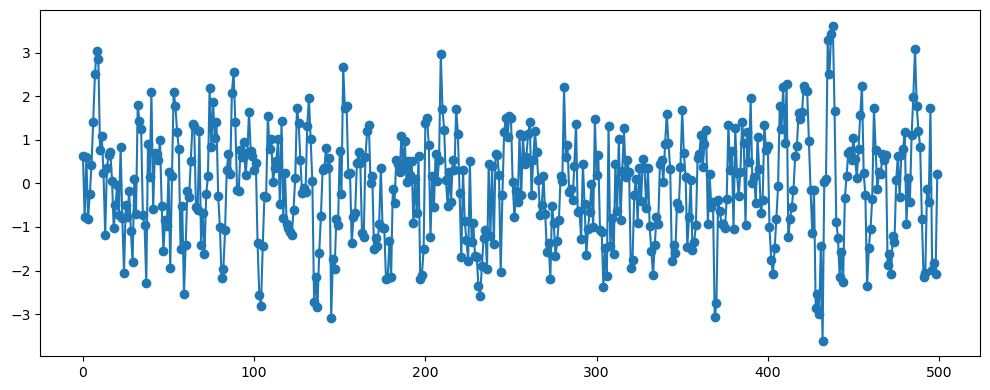

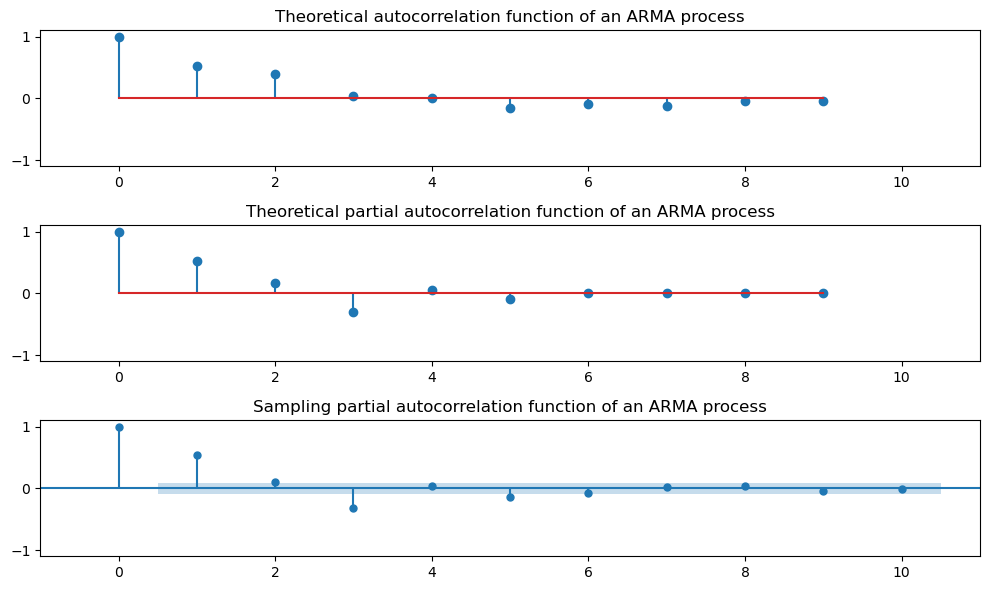

In [28]:
### AR(5)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([0.5, 0.25, -0.3, 0.1, -0.1])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

plot_pacf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling partial autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

## Relation of MA and AR

- **가역성 조건(Invertibility Condition):**

> **1)** $MA(q)$ -> $AR(\infty)$: 변환 후 `AR 모형이 Stationary Condition이면` `Invertibility` 
>
> **2)** $AR(p)$ -> $MA(\infty)$: `여러개 모형변환 가능`하지만 `Invertibility` 조건을 만족하는 `MA 모형은 단 1개`만 존재 

## ARMA

> **"$ARMA(p,q)$: 알고리즘의 차수($p~and~q$)가 `유한한` $AR(p)$와 $MA(q)$의 `선형조합`"** 
>
> - $AR$과 $MA$의 `정상성 조건과 가역성 조건이 동일`하게 $ARMA$ 알고리즘들에 적용  
> - 종속변수 $Y_t$는 종속변수 $Y_t$와 백색잡음($\epsilon_t$) `지연변수(Lagged Variables)의 합`으로 예측가능  

\begin{align*}
Y_t = \phi_1Y_{t-1} + \phi_2Y_{t-2} + \cdots + \phi_pY_{t-p} + 
\theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q} + \epsilon_t \\
\end{align*}
\begin{align*}
where~\epsilon_i \sim i.i.d.~WN(0, \sigma_{\epsilon_i}^2)~and~\displaystyle \sum_{i=1}^{\infty}\phi_i^2 < \infty, \displaystyle \sum_{i=1}^{\infty}\theta_i^2 < \infty
\end{align*}
\begin{align*}
\phi(L)Y_t &= \theta(L)\epsilon_t \\
Y_t &= \dfrac{\theta(L)}{\phi(L)}\epsilon_t \\
\end{align*}

---

\begin{align*}
\text{Main Equation} && Y_t &= \dfrac{\theta(L)}{\phi(L)}\epsilon_t \\
&& &= \psi(L)\epsilon_t \text{ where } \psi(L) = \dfrac{\theta(L)}{\phi(L)} \\
&& &= (1 + \psi_1L + \psi_2L^2 + \cdots)\epsilon_t \\
&& &= \epsilon_t + \psi_1\epsilon_{t-1} + \psi_2\epsilon_{t-2} + \cdots \\
&& & \text{ where } \\
&& \psi_1 &= \theta_1 - \phi_1 \\
&& \psi_2 &= \theta_2 - \phi_2 - \phi_1 \psi_1 \\
&& & \vdots \\
&& \psi_j &= \theta_j - \phi_p\psi_{j-p} - \phi_2 \psi_{p-1} - \cdots - \phi_1 \psi_{j-1} \\
\text{Autocorrelation("Yule-Walker Equation")} && \rho_i &= \phi_1 \rho_{i-1} + \cdots + \phi_p \rho_{i-p} \\
\end{align*}

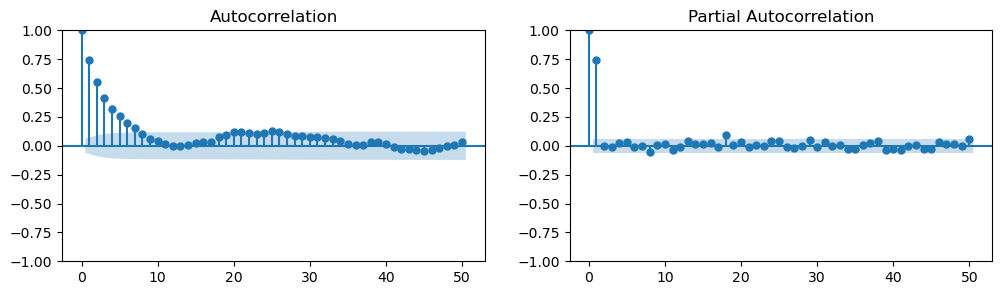

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      Y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1377.265
Date:                Sat, 21 Jan 2023   AIC                           2760.530
Time:                        13:37:47   BIC                           2775.254
Sample:                             0   HQIC                          2766.126
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0406      0.120      0.337      0.736      -0.195       0.276
ar.L1          0.7475      0.020     36.917      0.000       0.708       0.787
sigma2         0.9193      0.041     22.534      0.000       0.839       0.999
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.68
Prob(Q):                              0.87   Prob(JB):                         0.71
Heteroskedasticity (H):               0.76   Skew:                            -0.06
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

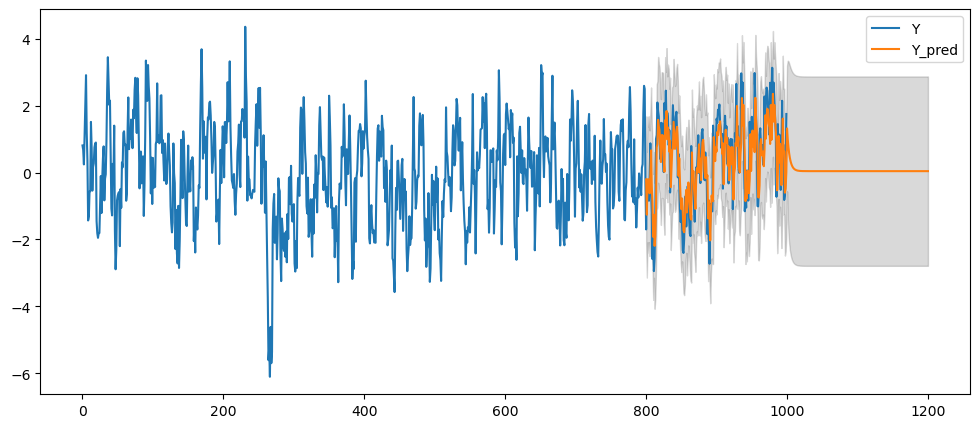

In [29]:
### ARMA(1,0) = AR(1)
# 데이터샘플 생성
np.random.seed(123)
ar_params = np.array([0.75])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
Y = arma_generate_sample(ar, ma, nsample=1000, burnin=500)
Y = pd.DataFrame(Y, columns=['Y'])
## Y의 ACF & PACF 시각화
plt.figure(figsize=(12,3))
plot_acf(Y, lags=50, zero=True, use_vlines=True,
         alpha=0.05, ax=plt.subplot(121))
plot_pacf(Y, lags=50, zero=True, use_vlines=True, method='Ywm',
          alpha=0.05, ax=plt.subplot(122))
plt.show()

# 세팅
index_name = ['const', 'ar(1)']
ar_order, ma_order = len(ar)-1, len(ma)-1
pred_start = int(Y.shape[0] - Y.shape[0] * 0.2)
pred_end = int(Y.shape[0] + Y.shape[0] * 0.2)

# 모델링
model = ARIMA(Y, trend='c', order=(ar_order, 0, ma_order)).fit()
display(model.summary())
model_pred = model.get_prediction(start=pred_start, end=pred_end)
Y_pred = model_pred.predicted_mean
Y_pred_ci = model_pred.conf_int()

# 결과 시각화
## Y & Y_pred 시각화
ax = pd.DataFrame(Y).plot(figsize=(12,5))
pd.DataFrame(Y_pred).plot(label='Time Sequence Prediction', ax=ax)
ax.fill_between(Y_pred_ci.index, Y_pred_ci.iloc[:,0], Y_pred_ci.iloc[:,1], 
                color='k', alpha=0.15)
plt.legend(['Y', 'Y_pred'])

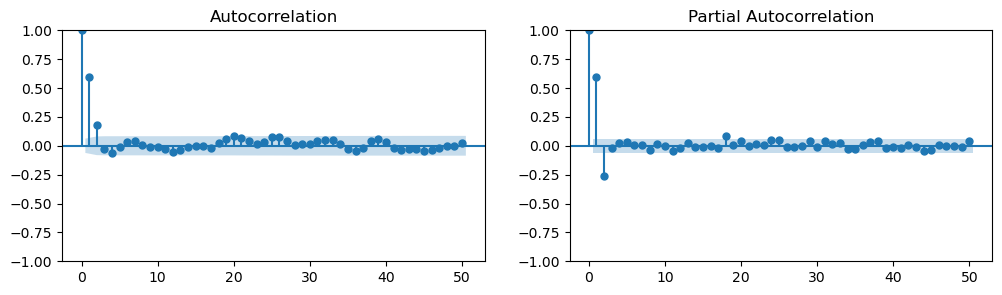

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      Y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1376.982
Date:                Sat, 21 Jan 2023   AIC                           2761.963
Time:                        13:37:48   BIC                           2781.594
Sample:                             0   HQIC                          2769.424
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0193      0.059      0.324      0.746      -0.097       0.136
ar.L1          0.7557      0.032     23.609      0.000       0.693       0.818
ar.L2         -0.2678      0.030     -8.812      0.000      -0.327      -0.208
sigma2         0.9190      0.041     22.526      0.000       0.839       0.999
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.75
Prob(Q):                              0.91   Prob(JB):                         0.69
Heteroskedasticity (H):               0.76   Skew:                            -0.06
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

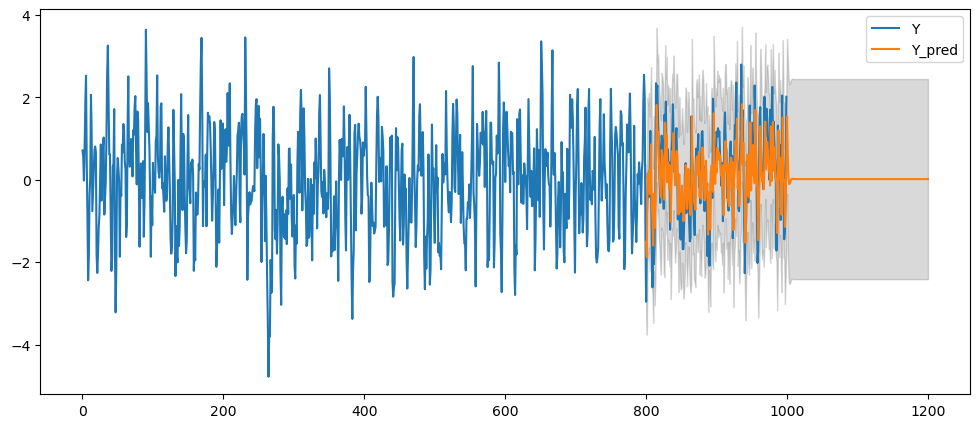

In [30]:
### ARMA(2,0) = AR(2)
# 데이터샘플 생성
np.random.seed(123)
ar_params = np.array([0.75, -0.25])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
Y = arma_generate_sample(ar, ma, nsample=1000, burnin=500)
Y = pd.DataFrame(Y, columns=['Y'])
## Y의 ACF & PACF 시각화
plt.figure(figsize=(12,3))
plot_acf(Y, lags=50, zero=True, use_vlines=True,
         alpha=0.05, ax=plt.subplot(121))
plot_pacf(Y, lags=50, zero=True, use_vlines=True, method='Ywm',
          alpha=0.05, ax=plt.subplot(122))
plt.show()

# 세팅
ar_order, ma_order = len(ar)-1, len(ma)-1
pred_start = int(Y.shape[0] - Y.shape[0] * 0.2)
pred_end = int(Y.shape[0] + Y.shape[0] * 0.2)

# 모델링
model = ARIMA(Y, trend='c', order=(ar_order, 0, ma_order)).fit()
display(model.summary())
model_pred = model.get_prediction(start=pred_start, end=pred_end)
Y_pred = model_pred.predicted_mean
Y_pred_ci = model_pred.conf_int()

# 결과 시각화
## Y & Y_pred 시각화
ax = pd.DataFrame(Y).plot(figsize=(12,5))
pd.DataFrame(Y_pred).plot(label='Time Sequence Prediction', ax=ax)
ax.fill_between(Y_pred_ci.index, Y_pred_ci.iloc[:,0], Y_pred_ci.iloc[:,1], 
                color='k', alpha=0.15)
plt.legend(['Y', 'Y_pred'])

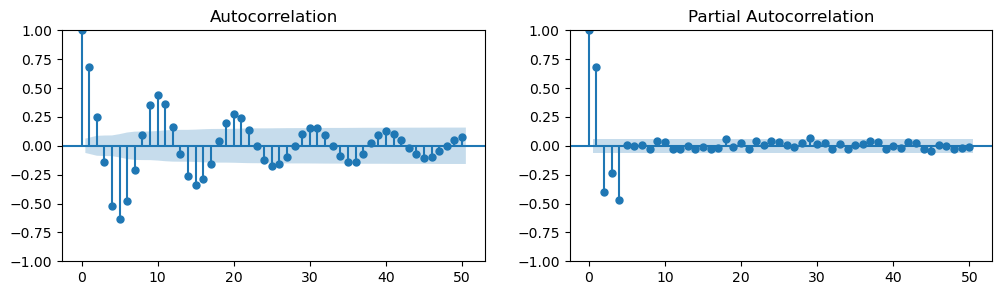

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      Y   No. Observations:                 1000
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -1377.496
Date:                Sat, 21 Jan 2023   AIC                           2766.992
Time:                        13:37:49   BIC                           2796.439
Sample:                             0   HQIC                          2778.184
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093      0.038      0.248      0.804      -0.065       0.083
ar.L1          0.7470      0.030     25.077      0.000       0.689       0.805
ar.L2         -0.2521      0.037     -6.784      0.000      -0.325      -0.179
ar.L3          0.1631      0.036      4.559      0.000       0.093       0.233
ar.L4         -0.4700      0.028    -16.652      0.000      -0.525      -0.415
sigma2         0.9185      0.041     22.462      0.000       0.838       0.999
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.88   Prob(JB):                         0.83
Heteroskedasticity (H):               0.75   Skew:                            -0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

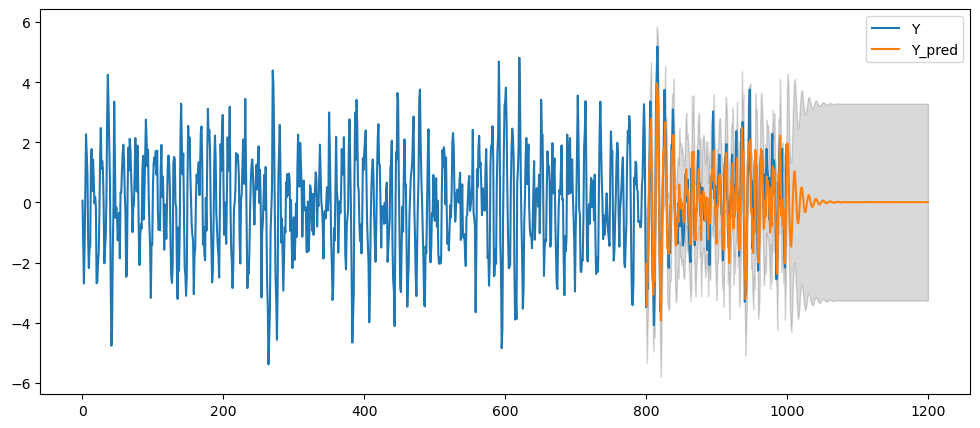

In [31]:
### ARMA(4,0) = AR(4)
# 데이터샘플 생성
np.random.seed(123)
ar_params = np.array([0.75, -0.25, 0.2, -0.5])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
Y = arma_generate_sample(ar, ma, nsample=1000, burnin=500)
Y = pd.DataFrame(Y, columns=['Y'])
## Y의 ACF & PACF 시각화
plt.figure(figsize=(12,3))
plot_acf(Y, lags=50, zero=True, use_vlines=True,
         alpha=0.05, ax=plt.subplot(121))
plot_pacf(Y, lags=50, zero=True, use_vlines=True, method='Ywm',
          alpha=0.05, ax=plt.subplot(122))
plt.show()

# 세팅
ar_order, ma_order = len(ar)-1, len(ma)-1
pred_start = int(Y.shape[0] - Y.shape[0] * 0.2)
pred_end = int(Y.shape[0] + Y.shape[0] * 0.2)

# 모델링
model = ARIMA(Y, trend='c', order=(ar_order, 0, ma_order)).fit()
display(model.summary())
model_pred = model.get_prediction(start=pred_start, end=pred_end)
Y_pred = model_pred.predicted_mean
Y_pred_ci = model_pred.conf_int()

# 결과 시각화
## Y & Y_pred 시각화
ax = pd.DataFrame(Y).plot(figsize=(12,5))
pd.DataFrame(Y_pred).plot(label='Time Sequence Prediction', ax=ax)
ax.fill_between(Y_pred_ci.index, Y_pred_ci.iloc[:,0], Y_pred_ci.iloc[:,1], 
                color='k', alpha=0.15)
plt.legend(['Y', 'Y_pred'])

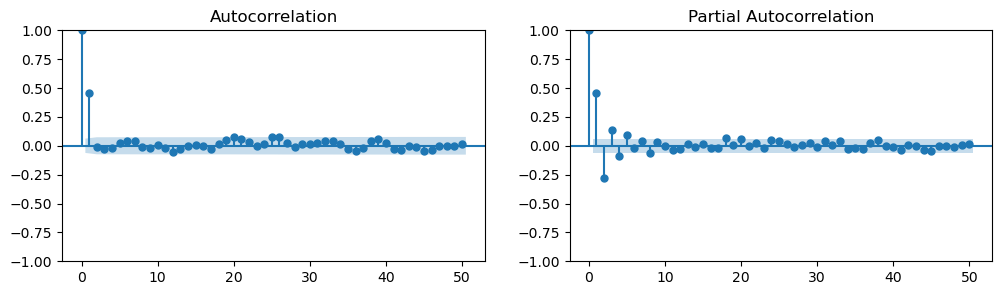

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      Y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1377.264
Date:                Sat, 21 Jan 2023   AIC                           2760.528
Time:                        13:37:50   BIC                           2775.251
Sample:                             0   HQIC                          2766.124
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0157      0.050      0.313      0.754      -0.083       0.114
ma.L1          0.6508      0.025     26.135      0.000       0.602       0.700
sigma2         0.9195      0.041     22.524      0.000       0.840       1.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.67
Prob(Q):                              0.96   Prob(JB):                         0.71
Heteroskedasticity (H):               0.76   Skew:                            -0.06
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

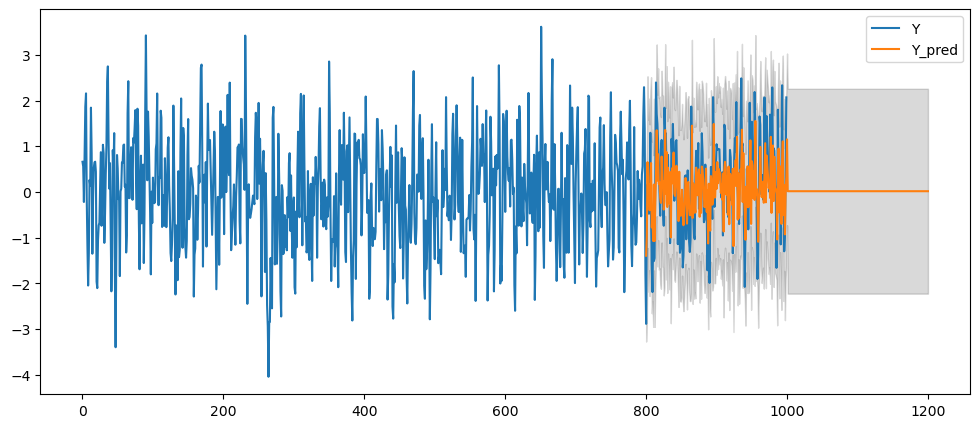

In [32]:
### ARMA(0,1) = MA(1)
# 데이터샘플 생성
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([0.65])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
Y = arma_generate_sample(ar, ma, nsample=1000, burnin=500)
Y = pd.DataFrame(Y, columns=['Y'])
## Y의 ACF & PACF 시각화
plt.figure(figsize=(12,3))
plot_acf(Y, lags=50, zero=True, use_vlines=True,
         alpha=0.05, ax=plt.subplot(121))
plot_pacf(Y, lags=50, zero=True, use_vlines=True, method='Ywm',
          alpha=0.05, ax=plt.subplot(122))
plt.show()

# 세팅
ar_order, ma_order = len(ar)-1, len(ma)-1
pred_start = int(Y.shape[0] - Y.shape[0] * 0.2)
pred_end = int(Y.shape[0] + Y.shape[0] * 0.2)

# 모델링
model = ARIMA(Y, trend='c', order=(ar_order, 0, ma_order)).fit()
display(model.summary())
model_pred = model.get_prediction(start=pred_start, end=pred_end)
Y_pred = model_pred.predicted_mean
Y_pred_ci = model_pred.conf_int()

# 결과 시각화
## Y & Y_pred 시각화
ax = pd.DataFrame(Y).plot(figsize=(12,5))
pd.DataFrame(Y_pred).plot(label='Time Sequence Prediction', ax=ax)
ax.fill_between(Y_pred_ci.index, Y_pred_ci.iloc[:,0], Y_pred_ci.iloc[:,1], 
                color='k', alpha=0.15)
plt.legend(['Y', 'Y_pred'])

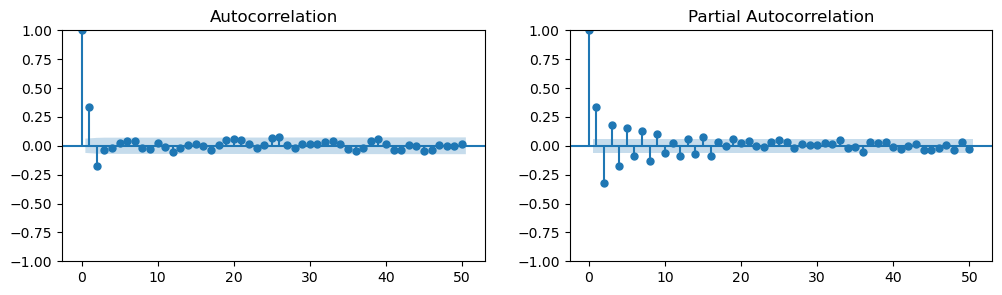

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      Y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1377.754
Date:                Sat, 21 Jan 2023   AIC                           2763.509
Time:                        13:37:51   BIC                           2783.140
Sample:                             0   HQIC                          2770.970
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0130      0.043      0.305      0.761      -0.071       0.097
ma.L1          0.6501      0.032     20.201      0.000       0.587       0.713
ma.L2         -0.2487      0.031     -7.899      0.000      -0.310      -0.187
sigma2         0.9195      0.041     22.519      0.000       0.840       1.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.94   Prob(JB):                         0.73
Heteroskedasticity (H):               0.76   Skew:                            -0.06
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

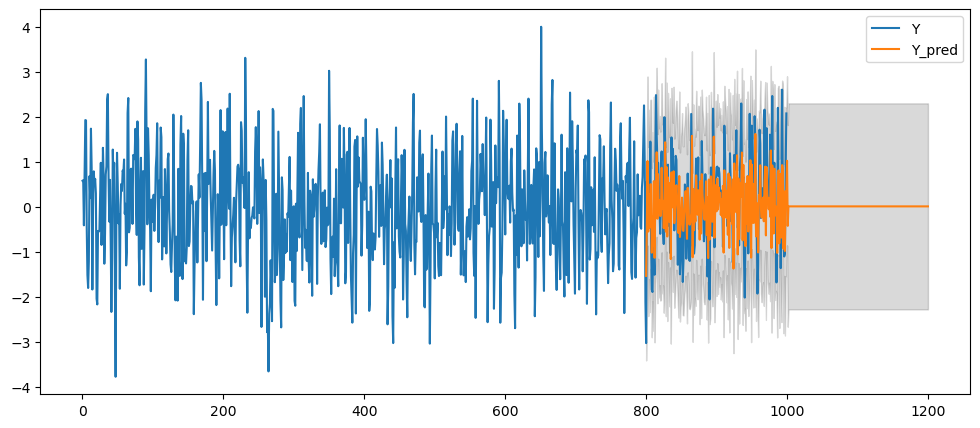

In [33]:
### ARMA(0,2) = MA(2)
# 데이터샘플 생성
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([0.65, -0.25])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
Y = arma_generate_sample(ar, ma, nsample=1000, burnin=500)
Y = pd.DataFrame(Y, columns=['Y'])
## Y의 ACF & PACF 시각화
plt.figure(figsize=(12,3))
plot_acf(Y, lags=50, zero=True, use_vlines=True,
         alpha=0.05, ax=plt.subplot(121))
plot_pacf(Y, lags=50, zero=True, use_vlines=True, method='Ywm',
          alpha=0.05, ax=plt.subplot(122))
plt.show()

# 세팅
ar_order, ma_order = len(ar)-1, len(ma)-1
pred_start = int(Y.shape[0] - Y.shape[0] * 0.2)
pred_end = int(Y.shape[0] + Y.shape[0] * 0.2)

# 모델링
model = ARIMA(Y, trend='c', order=(ar_order, 0, ma_order)).fit()
display(model.summary())
model_pred = model.get_prediction(start=pred_start, end=pred_end)
Y_pred = model_pred.predicted_mean
Y_pred_ci = model_pred.conf_int()

# 결과 시각화
## Y & Y_pred 시각화
ax = pd.DataFrame(Y).plot(figsize=(12,5))
pd.DataFrame(Y_pred).plot(label='Time Sequence Prediction', ax=ax)
ax.fill_between(Y_pred_ci.index, Y_pred_ci.iloc[:,0], Y_pred_ci.iloc[:,1], 
                color='k', alpha=0.15)
plt.legend(['Y', 'Y_pred'])

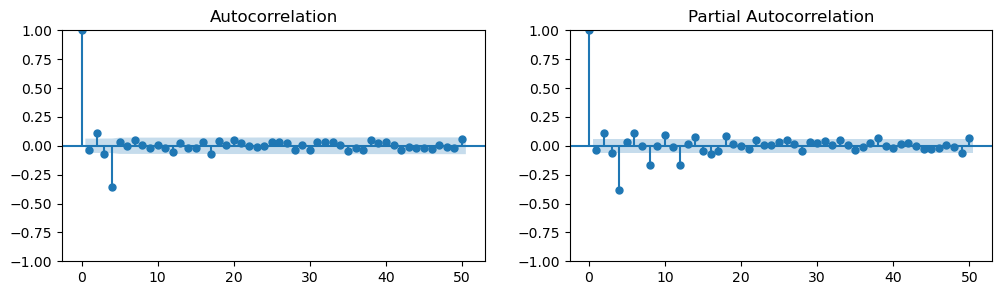

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      Y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 4)   Log Likelihood               -1715.401
Date:                Sat, 21 Jan 2023   AIC                           3442.801
Time:                        13:37:53   BIC                           3472.248
Sample:                             0   HQIC                          3453.993
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0079      0.030      0.261      0.794      -0.051       0.067
ma.L1         -0.0418      0.028     -1.486      0.137      -0.097       0.013
ma.L2          0.2823      0.028     10.104      0.000       0.228       0.337
ma.L3         -0.0569      0.028     -2.067      0.039      -0.111      -0.003
ma.L4         -0.4858      0.026    -18.568      0.000      -0.537      -0.434
sigma2         1.8060      0.084     21.485      0.000       1.641       1.971
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.68
Prob(Q):                              0.98   Prob(JB):                         0.71
Heteroskedasticity (H):               0.77   Skew:                            -0.04
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

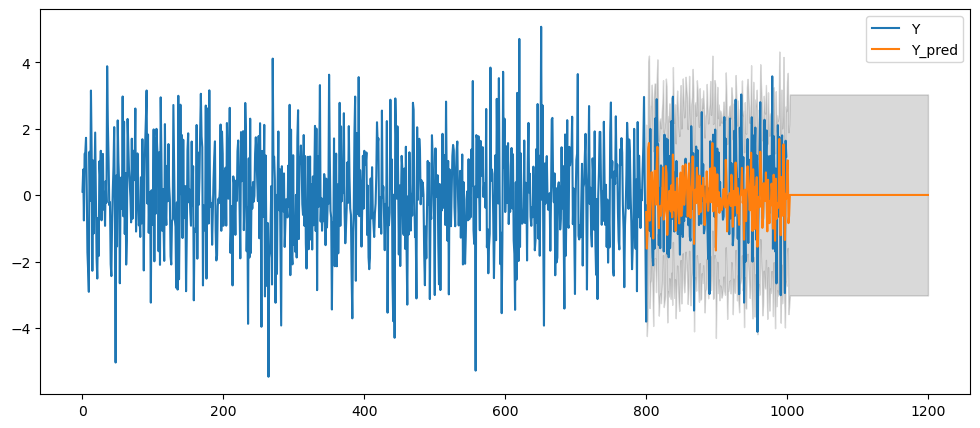

In [34]:
### ARMA(0,4) = MA(4)
# 데이터샘플 생성
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([0.65, -0.25, 0.5, -0.9])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
Y = arma_generate_sample(ar, ma, nsample=1000, burnin=500)
Y = pd.DataFrame(Y, columns=['Y'])
## Y의 ACF & PACF 시각화
plt.figure(figsize=(12,3))
plot_acf(Y, lags=50, zero=True, use_vlines=True,
         alpha=0.05, ax=plt.subplot(121))
plot_pacf(Y, lags=50, zero=True, use_vlines=True, method='Ywm',
          alpha=0.05, ax=plt.subplot(122))
plt.show()

# 세팅
ar_order, ma_order = len(ar)-1, len(ma)-1
pred_start = int(Y.shape[0] - Y.shape[0] * 0.2)
pred_end = int(Y.shape[0] + Y.shape[0] * 0.2)

# 모델링
model = ARIMA(Y, trend='c', order=(ar_order, 0, ma_order)).fit()
display(model.summary())
model_pred = model.get_prediction(start=pred_start, end=pred_end)
Y_pred = model_pred.predicted_mean
Y_pred_ci = model_pred.conf_int()

# 결과 시각화
## Y & Y_pred 시각화
ax = pd.DataFrame(Y).plot(figsize=(12,5))
pd.DataFrame(Y_pred).plot(label='Time Sequence Prediction', ax=ax)
ax.fill_between(Y_pred_ci.index, Y_pred_ci.iloc[:,0], Y_pred_ci.iloc[:,1], 
                color='k', alpha=0.15)
plt.legend(['Y', 'Y_pred'])

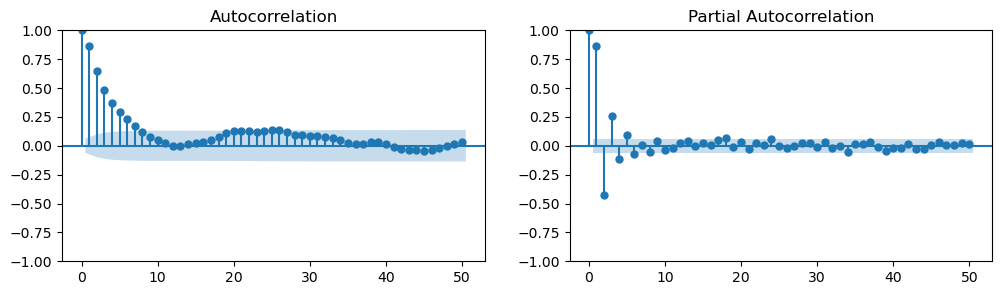

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      Y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1378.065
Date:                Sat, 21 Jan 2023   AIC                           2764.129
Time:                        13:37:54   BIC                           2783.760
Sample:                             0   HQIC                          2771.590
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0641      0.199      0.322      0.747      -0.326       0.454
ar.L1          0.7465      0.021     35.051      0.000       0.705       0.788
ma.L1          0.6519      0.026     24.939      0.000       0.601       0.703
sigma2         0.9195      0.041     22.524      0.000       0.839       1.000
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.69
Prob(Q):                              0.90   Prob(JB):                         0.71
Heteroskedasticity (H):               0.76   Skew:                            -0.06
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

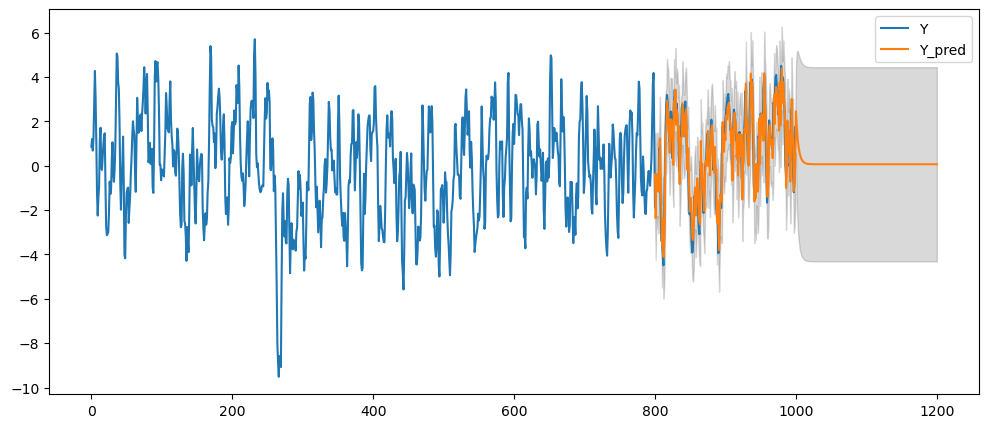

In [35]:
### ARMA(1,1)
# 데이터샘플 생성
np.random.seed(123)
ar_params = np.array([0.75])
ma_params = np.array([0.65])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
Y = arma_generate_sample(ar, ma, nsample=1000, burnin=500)
Y = pd.DataFrame(Y, columns=['Y'])
## Y의 ACF & PACF 시각화
plt.figure(figsize=(12,3))
plot_acf(Y, lags=50, zero=True, use_vlines=True,
         alpha=0.05, ax=plt.subplot(121))
plot_pacf(Y, lags=50, zero=True, use_vlines=True, method='Ywm',
          alpha=0.05, ax=plt.subplot(122))
plt.show()

# 세팅
ar_order, ma_order = len(ar)-1, len(ma)-1
pred_start = int(Y.shape[0] - Y.shape[0] * 0.2)
pred_end = int(Y.shape[0] + Y.shape[0] * 0.2)

# 모델링
model = ARIMA(Y, trend='c', order=(ar_order, 0, ma_order)).fit()
display(model.summary())
model_pred = model.get_prediction(start=pred_start, end=pred_end)
Y_pred = model_pred.predicted_mean
Y_pred_ci = model_pred.conf_int()

# 결과 시각화
## Y & Y_pred 시각화
ax = pd.DataFrame(Y).plot(figsize=(12,5))
pd.DataFrame(Y_pred).plot(label='Time Sequence Prediction', ax=ax)
ax.fill_between(Y_pred_ci.index, Y_pred_ci.iloc[:,0], Y_pred_ci.iloc[:,1], 
                color='k', alpha=0.15)
plt.legend(['Y', 'Y_pred'])

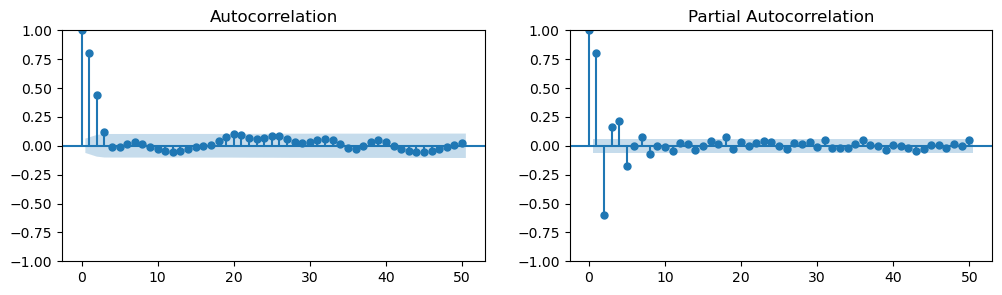

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      Y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1377.526
Date:                Sat, 21 Jan 2023   AIC                           2767.051
Time:                        13:37:55   BIC                           2796.498
Sample:                             0   HQIC                          2778.243
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0415      0.128      0.324      0.746      -0.209       0.292
ar.L1          0.7473      0.057     13.168      0.000       0.636       0.859
ar.L2         -0.2676      0.048     -5.530      0.000      -0.362      -0.173
ma.L1          0.6543      0.053     12.404      0.000       0.551       0.758
ma.L2          0.5209      0.036     14.318      0.000       0.450       0.592
sigma2         0.9182      0.041     22.508      0.000       0.838       0.998
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.59
Prob(Q):                              0.97   Prob(JB):                         0.75
Heteroskedasticity (H):               0.76   Skew:                            -0.06
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

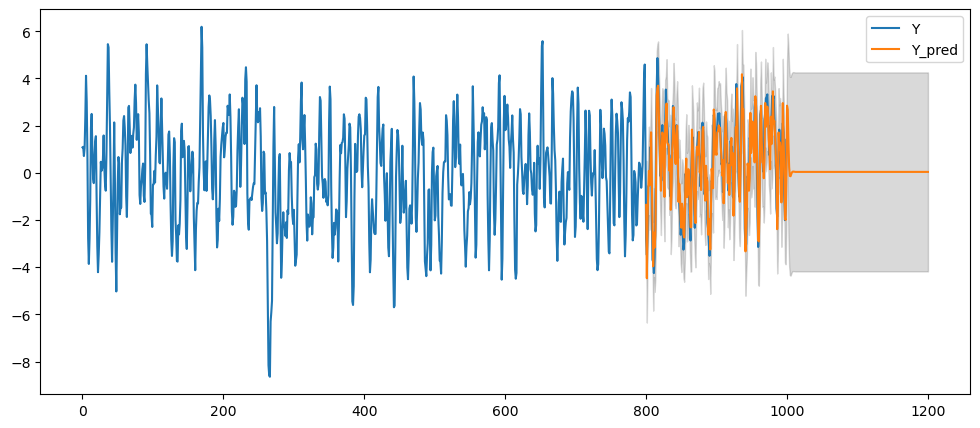

In [36]:
### ARMA(2,2)
# 데이터샘플 생성
np.random.seed(123)
ar_params = np.array([0.75, -0.25])
ma_params = np.array([0.65, 0.5])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
Y = arma_generate_sample(ar, ma, nsample=1000, burnin=500)
Y = pd.DataFrame(Y, columns=['Y'])
## Y의 ACF & PACF 시각화
plt.figure(figsize=(12,3))
plot_acf(Y, lags=50, zero=True, use_vlines=True,
         alpha=0.05, ax=plt.subplot(121))
plot_pacf(Y, lags=50, zero=True, use_vlines=True, method='Ywm',
          alpha=0.05, ax=plt.subplot(122))
plt.show()

# 세팅
ar_order, ma_order = len(ar)-1, len(ma)-1
pred_start = int(Y.shape[0] - Y.shape[0] * 0.2)
pred_end = int(Y.shape[0] + Y.shape[0] * 0.2)

# 모델링
model = ARIMA(Y, trend='c', order=(ar_order, 0, ma_order)).fit()
display(model.summary())
model_pred = model.get_prediction(start=pred_start, end=pred_end)
Y_pred = model_pred.predicted_mean
Y_pred_ci = model_pred.conf_int()

# 결과 시각화
## Y & Y_pred 시각화
ax = pd.DataFrame(Y).plot(figsize=(12,5))
pd.DataFrame(Y_pred).plot(label='Time Sequence Prediction', ax=ax)
ax.fill_between(Y_pred_ci.index, Y_pred_ci.iloc[:,0], Y_pred_ci.iloc[:,1], 
                color='k', alpha=0.15)
plt.legend(['Y', 'Y_pred'])

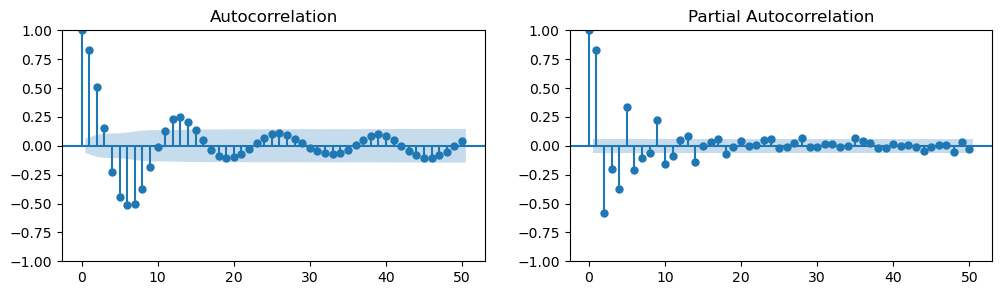

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      Y   No. Observations:                 1000
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -1380.797
Date:                Sat, 21 Jan 2023   AIC                           2785.594
Time:                        13:37:58   BIC                           2844.487
Sample:                             0   HQIC                          2807.977
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0308      0.087      0.353      0.724      -0.140       0.202
ar.L1          1.3471      0.777      1.733      0.083      -0.176       2.871
ar.L2         -0.7915      0.745     -1.062      0.288      -2.252       0.669
ar.L3          0.7176      0.344      2.084      0.037       0.043       1.392
ar.L4         -0.7803      0.424     -1.841      0.066      -1.611       0.050
ar.L5          0.2385      0.421      0.566      0.571      -0.587       1.064
ma.L1          0.0593      0.782      0.076      0.940      -1.474       1.593
ma.L2          0.2056      0.343      0.600      0.548      -0.466       0.877
ma.L3         -0.0547      0.311     -0.176      0.861      -0.665       0.555
ma.L4         -0.6170      0.108     -5.699      0.000      -0.829      -0.405
ma.L5          0.1705      0.430      0.397      0.692      -0.672       1.013
sigma2         0.9201      0.041     22.335      0.000       0.839       1.001
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.88   Prob(JB):                         0.83
Heteroskedasticity (H):               0.75   Skew:                            -0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

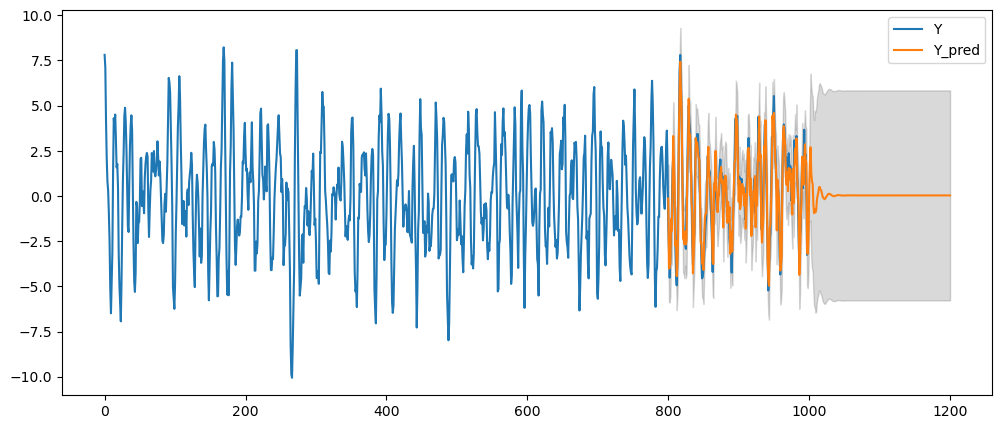

In [37]:
### ARMA(5,5)
# 데이터샘플 생성
np.random.seed(123)
ar_params = np.array([0.75, -0.25, 0.5, -0.5, -0.1])
ma_params = np.array([0.65, 0.5, 0.2, -0.5, -0.1])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
Y = arma_generate_sample(ar, ma, nsample=1000, burnin=500)
Y = pd.DataFrame(Y, columns=['Y'])
## Y의 ACF & PACF 시각화
plt.figure(figsize=(12,3))
plot_acf(Y, lags=50, zero=True, use_vlines=True,
         alpha=0.05, ax=plt.subplot(121))
plot_pacf(Y, lags=50, zero=True, use_vlines=True, method='Ywm',
          alpha=0.05, ax=plt.subplot(122))
plt.show()

# 세팅
ar_order, ma_order = len(ar)-1, len(ma)-1
pred_start = int(Y.shape[0] - Y.shape[0] * 0.2)
pred_end = int(Y.shape[0] + Y.shape[0] * 0.2)

# 모델링
model = ARIMA(Y, trend='c', order=(ar_order, 0, ma_order)).fit()
display(model.summary())
model_pred = model.get_prediction(start=pred_start, end=pred_end)
Y_pred = model_pred.predicted_mean
Y_pred_ci = model_pred.conf_int()

# 결과 시각화
## Y & Y_pred 시각화
ax = pd.DataFrame(Y).plot(figsize=(12,5))
pd.DataFrame(Y_pred).plot(label='Time Sequence Prediction', ax=ax)
ax.fill_between(Y_pred_ci.index, Y_pred_ci.iloc[:,0], Y_pred_ci.iloc[:,1], 
                color='k', alpha=0.15)
plt.legend(['Y', 'Y_pred'])

## 모형 차수결정 정리

> **1) 추정 및 예측을 하기 전에 `파라미터에 따라 모형이 어떠한 결과를 도출할지 이해(예상)` 필요**  
> **2) 결과이해(예상)는 기계의 실수를 방지하고 `결과의 확신을 증가`시킴**  

---

- **$p$, $q$ 파라미터 추론:** `ACF & PACF` 방법으로 `차수 결정`

> (1) **정상성 형태 변환:** `차분/로그변환/계절성제거 등`을 통해 데이터를 `정상성 형태로 변환`
>
> (2) $ACF$, $PACF$를 도식화 하여 `ARMA의 파라미터 차수를 추론`  

<center><img src='Image/Expert/TS_Estimation_ARMA.png' width='500'>(https://dinonotes.com/archives/2476)</center>

| | $AR(p)$ | $MA(q)$ | $ARMA(p,q)$ |
|:--------:|:-------:|:--------:|:----------------:|
| $ACF$ | 지수적 감소, 진동하는 사인 형태 | $q+1$ 차항부터 절단모양(0수렴) | $q+1$ 차항부터 지수적 감소 혹은 진동하는 사인형태 |
| $PACF$ | $p+1$ 차항부터 절단모양(0수렴) | 지수적 감소, 진동하는 사인 형태 | $p+1$ 차항부터 지수적 감소 혹은 진동하는 사인형태 |

## **ARMA모델링 실습:** 항체형성 호르몬수치

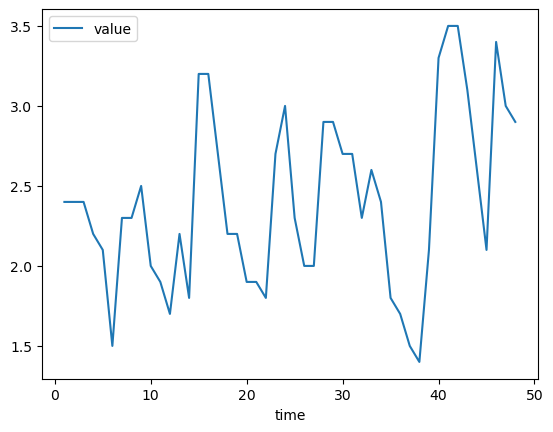

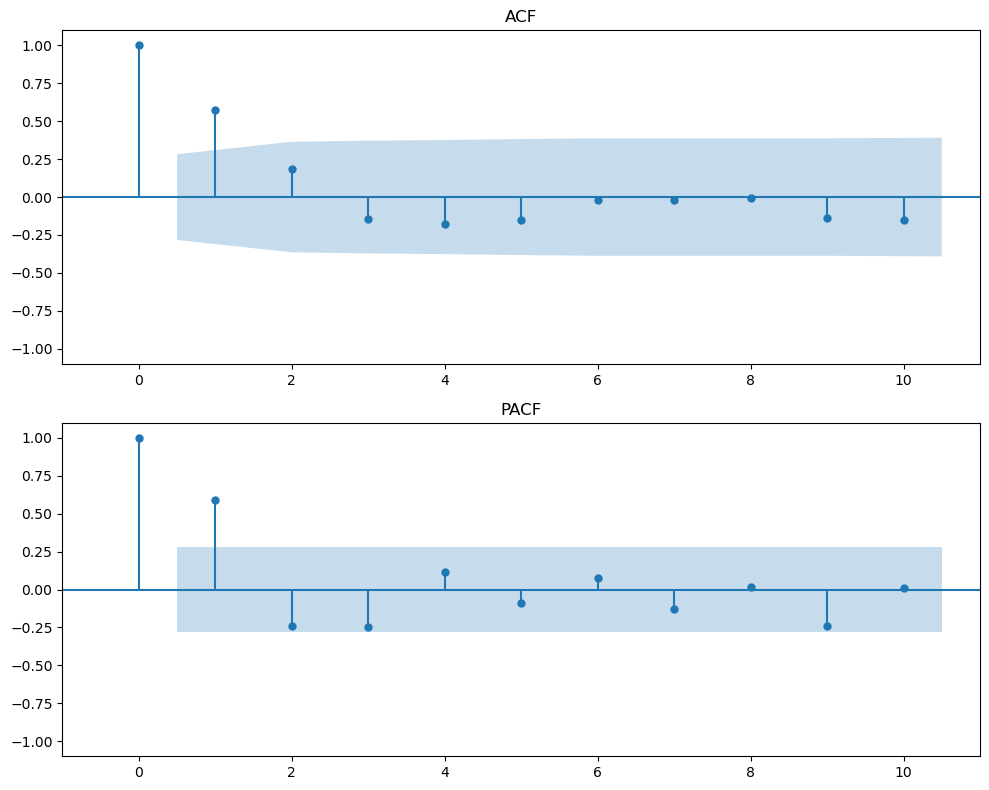

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   48
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -31.052
Date:                Sat, 21 Jan 2023   AIC                             68.104
Time:                        13:38:01   BIC                             73.717
Sample:                             0   HQIC                            70.225
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4050      0.109     22.068      0.000       2.191       2.619
ma.L1          0.4810      0.149      3.238      0.001       0.190       0.772
sigma2         0.2123      0.051      4.193      0.000       0.113       0.312
===================================================================================
Ljung-Box (L1) (Q):                   1.73   Jarque-Bera (JB):                 2.49
Prob(Q):                              0.19   Prob(JB):                         0.29
Heteroskedasticity (H):               1.56   Skew:                             0.55
Prob(H) (two-sided):                  0.38   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   48
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -29.379
Date:                Sat, 21 Jan 2023   AIC                             64.758
Time:                        13:38:01   BIC                             70.372
Sample:                             0   HQIC                            66.880
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4133      0.193     12.490      0.000       2.035       2.792
ar.L1          0.5739      0.144      3.999      0.000       0.293       0.855
sigma2         0.1975      0.047      4.240      0.000       0.106       0.289
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):                 6.84
Prob(Q):                              0.33   Prob(JB):                         0.03
Heteroskedasticity (H):               1.50   Skew:                             0.90
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   48
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -28.762
Date:                Sat, 21 Jan 2023   AIC                             65.524
Time:                        13:38:01   BIC                             73.009
Sample:                             0   HQIC                            68.353
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4101      0.181     13.322      0.000       2.055       2.765
ar.L1          0.4522      0.265      1.707      0.088      -0.067       0.972
ma.L1          0.1982      0.283      0.700      0.484      -0.356       0.753
sigma2         0.1923      0.044      4.368      0.000       0.106       0.279
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 7.61
Prob(Q):                              0.79   Prob(JB):                         0.02
Heteroskedasticity (H):               1.37   Skew:                             0.93
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
# 데이터로딩 및 확인
data = sm.datasets.get_rdataset("lh")
df = data.data
df.plot(x='time', y='value')
plt.show()

# ACF/PACF 확인
plt.figure(figsize=(10, 8))
plot_acf(df.value, lags=10, ax=plt.subplot(211))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("ACF")

plot_pacf(df.value, lags=10, ax=plt.subplot(212))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("PACF")
plt.tight_layout()
plt.show()

# MA(1) 모델링
model = ARIMA(df.value, trend='c', 
              order=(0, 0, 1)).fit()
display(model.summary())

# AR(1) 모델링
model = ARIMA(df.value, trend='c', 
              order=(1, 0, 0)).fit()
display(model.summary())

# ARMA(1,1) 모델링
model = ARIMA(df.value, trend='c', 
              order=(1, 0, 1)).fit()
display(model.summary())

## **ARMA모델링 실습:** 호흡기질환 사망자수

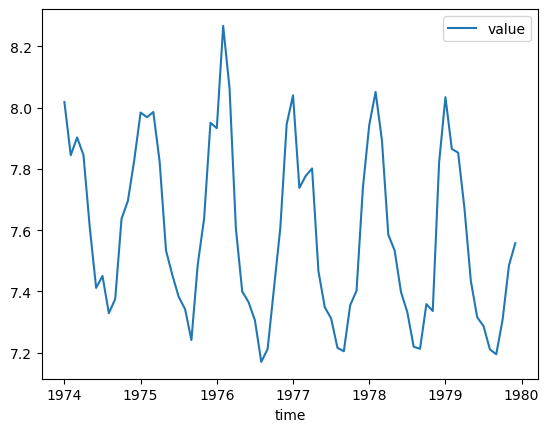

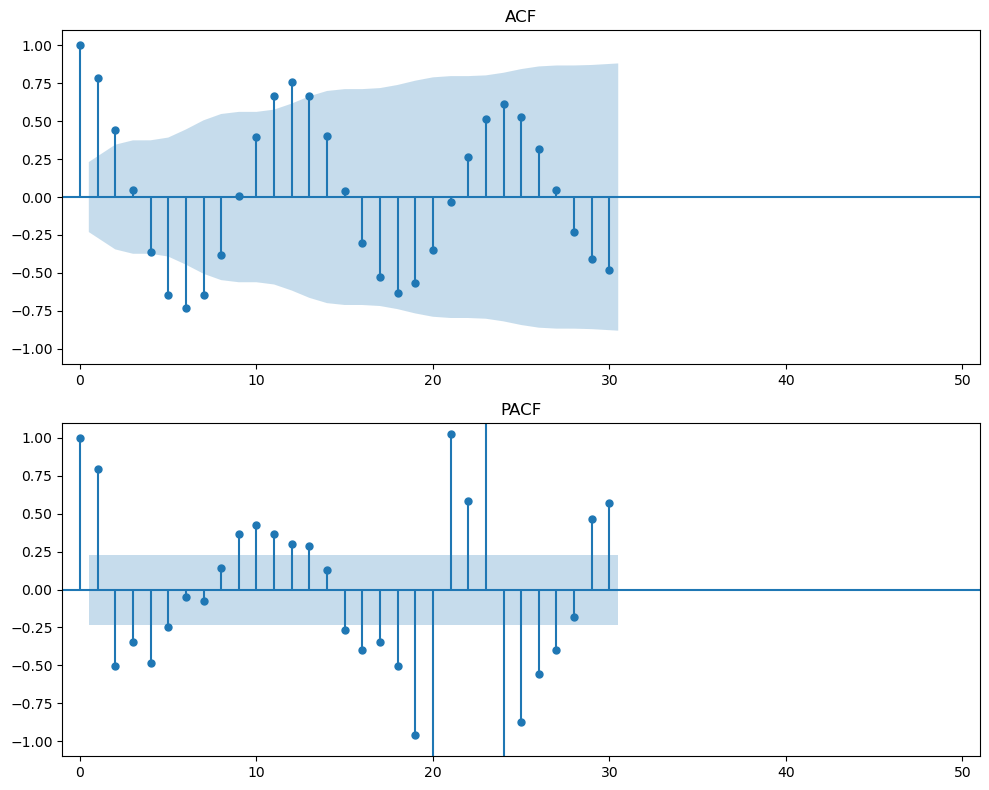

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   72
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  31.983
Date:                Sat, 21 Jan 2023   AIC                            -55.965
Time:                        13:38:02   BIC                            -46.859
Sample:                             0   HQIC                           -52.340
                                 - 72                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6037      0.094     80.857      0.000       7.419       7.788
ar.L1          0.6797      0.100      6.817      0.000       0.484       0.875
ma.L1          0.4680      0.116      4.031      0.000       0.240       0.696
sigma2         0.0236      0.004      5.410      0.000       0.015       0.032
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                12.20
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.94
Prob(H) (two-sided):                  0.99   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
# 데이터로딩 및 확인
# deaths = sm.datasets.get_rdataset("deaths", package="MASS")
# df = deaths.data
location = os.path.join('.', 'Data', 'DeathsRDataset', 'deaths_MASS.csv')
df = pd.read_csv(location)
df.columns = ['time', 'value']
df.value = np.log(df.value)
df.plot(x='time', y='value')
plt.show()

# ACF/PACF 확인
plt.figure(figsize=(10, 8))
plot_acf(df.value.values, lags=30, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("ACF")

plot_pacf(df.value.values, lags=30, ax=plt.subplot(212))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("PACF")
plt.tight_layout()
plt.show()

# ARMA(1,1) 모델링
model = ARIMA(df.value, trend='c', order=(1, 0, 1)).fit()
display(model.summary())

p  q   LLF     AIC    BIC
0   1  0 24.89  -43.79 -36.96
1   1  1 31.98  -55.97 -46.86
2   1  2 32.60  -55.19 -43.81
3   1  3 35.05  -58.11 -44.45
4   1  4 32.04  -50.08 -34.15
5   2  0 35.74  -63.48 -54.37
6   2  1 44.51  -79.03 -67.64
7   2  2 52.31  -92.63 -78.97
8   2  3 58.37 -102.74 -86.80
9   2  4 57.77  -99.54 -81.33
10  3  0 38.56  -67.12 -55.74
11  3  1 45.28  -78.56 -64.90
12  3  2 53.32  -92.63 -76.69
13  3  3 58.36 -100.72 -82.51
14  3  4 57.95  -97.90 -77.41
15  4  0 47.04  -82.07 -68.41
16  4  1 49.45  -84.91 -68.97
17  4  2 56.60  -97.19 -78.98
18  4  3 57.54  -97.08 -76.59
19  4  4 58.47  -96.94 -74.17

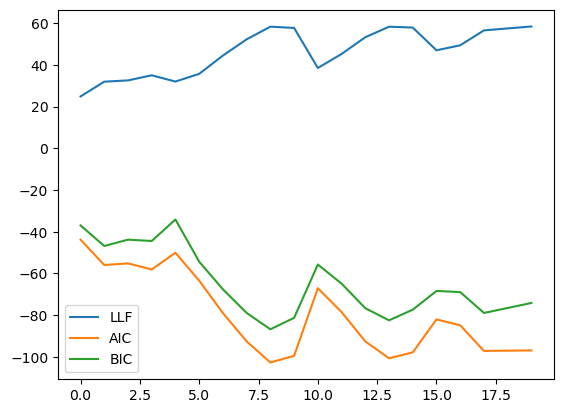

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   72
Model:                 ARIMA(2, 0, 3)   Log Likelihood                  58.368
Date:                Sat, 21 Jan 2023   AIC                           -102.737
Time:                        13:38:07   BIC                            -86.800
Sample:                             0   HQIC                           -96.392
                                 - 72                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5886      0.025    299.667      0.000       7.539       7.638
ar.L1          1.7353      0.005    322.317      0.000       1.725       1.746
ar.L2         -0.9999      0.003   -320.306      0.000      -1.006      -0.994
ma.L1         -1.2536    142.365     -0.009      0.993    -280.283     277.776
ma.L2          0.1926     98.557      0.002      0.998    -192.976     193.361
ma.L3          0.4687     77.564      0.006      0.995    -151.553     152.491
sigma2         0.0102      1.678      0.006      0.995      -3.279       3.299
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 5.71
Prob(Q):                              0.79   Prob(JB):                         0.06
Heteroskedasticity (H):               1.05   Skew:                             0.25
Prob(H) (two-sided):                  0.91   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

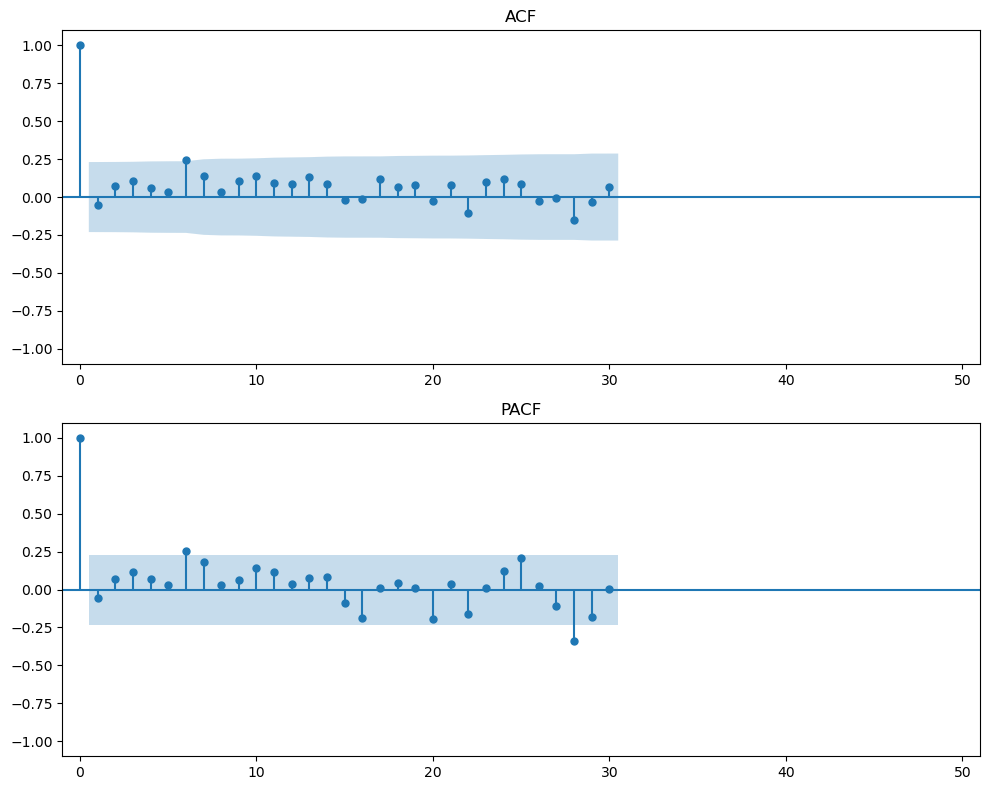

In [40]:
# ARMA(p,q) 모델링
result = []
for p, q in product(range(5), range(5)):
    if (p == 0 & q == 0):
        continue
    model = ARIMA(df.value, trend='c', order=(p, 0, q)).fit()
    try:
        result.append({"p": p, "q": q, "LLF": model.llf, "AIC": model.aic, "BIC": model.bic})
    except:
        pass
   
# 결과 시각화 및 최적모수 선택
result = pd.DataFrame(result)
display(result)
result.iloc[:,2:].plot()
plt.show()
opt_ar = result.iloc[np.argmin(result['AIC']), 0]
opt_ma = result.iloc[np.argmin(result['AIC']), 1]

# ARMA 모델링
model = ARIMA(df.value, trend='c', 
              order=(opt_ar, 0, opt_ma)).fit()
display(model.summary())

# 잔차 ACF/PACF 확인
plt.figure(figsize=(10, 8))
plot_acf(model.resid, lags=30, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("ACF")

plot_pacf(model.resid, lags=30, ax=plt.subplot(212))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("PACF")
plt.tight_layout()
plt.show()

## ARMA with eXogenous(ARMAX)

$$
\begin{align*}
\text{Equation of ARMA} \\
Y_t &= \phi_1Y_{t-1} + \phi_2Y_{t-2} + \cdots \\
& + \phi_pY_{t-p} + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q} + \epsilon_t \\
\\
\text{Equation of ARMAX} \\
Y_t &= \phi_1Y_{t-1} + \phi_2Y_{t-2} + \cdots \\
& + \phi_pY_{t-p} + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q} + \epsilon_t + \beta X \\
\end{align*}
$$

## **ARMAX모델링 실습:** 통화량에 따른 소비자지출

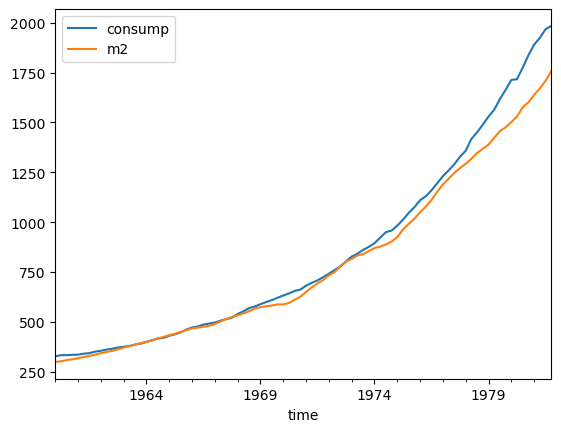

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                consump   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.721e+04
Date:                Sat, 21 Jan 2023   Prob (F-statistic):          7.72e-101
Time:                        13:38:18   Log-Likelihood:                -434.48
No. Observations:                  88   AIC:                             873.0
Df Residuals:                      86   BIC:                             877.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -61.7547      7.788     -7.930      0.000     -77.237     -46.273
m2             1.1406      0.009    131.182      0.000       1.123       1.158
==============================================================================
Omnibus:                        0.847   Durbin-Watson:                   0.094
Prob(Omnibus):                  0.655   Jarque-Bera (JB):                0.669
Skew:                           0.213   Prob(JB):                        0.716
Kurtosis:                       2.984   Cond. No.                     1.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

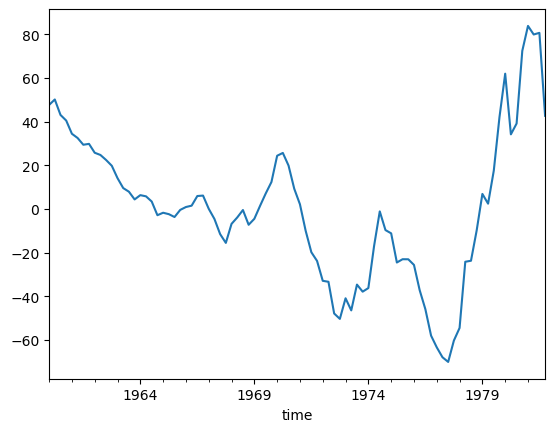

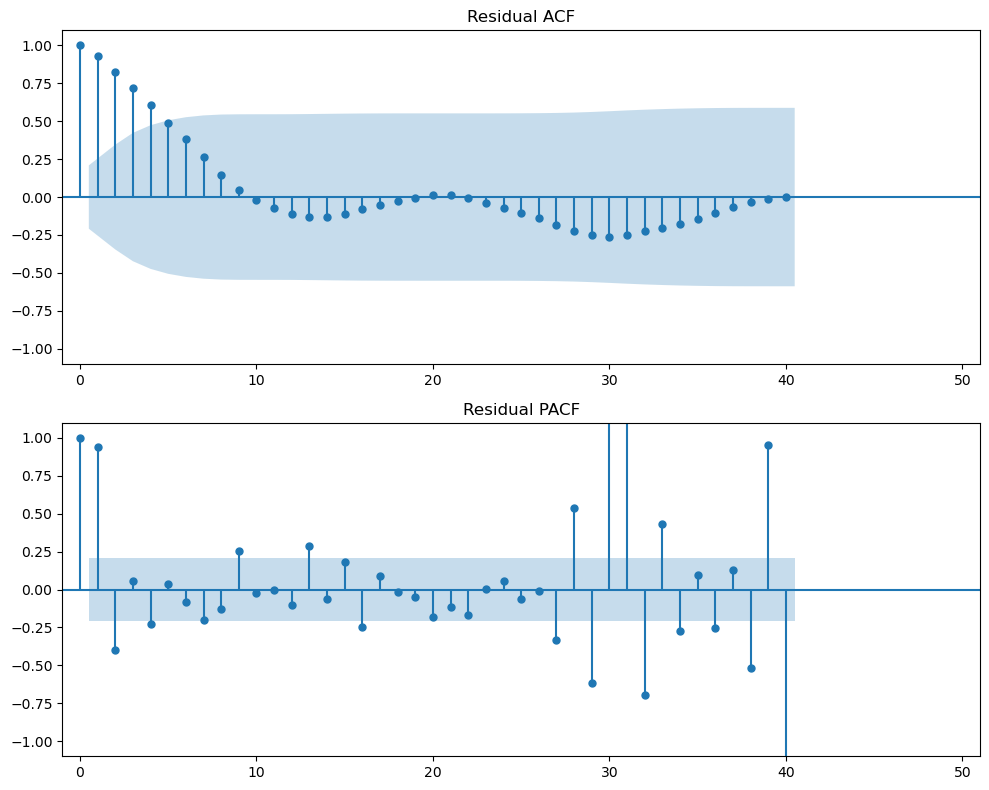

In [41]:
# 데이터 로딩
source_url = requests.get('http://www.stata-press.com/data/r12/friedman2.dta').content
df = pd.read_stata(BytesIO(source_url))
df.index = df.time

# 데이터 필터링 및 시각화
df = df.loc['1960':'1981',["consump", "m2"]]
df.plot()
plt.show()

# 모델링
## 회귀분석
model = sm.OLS(df.consump, sm.add_constant(df.m2)).fit()
display(model.summary())

## 잔차 확인
model.resid.plot()
plt.show()

## 잔차 ACF/PACF
plt.figure(figsize=(10, 8))
plot_acf(model.resid, lags=40, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Residual ACF")

plot_pacf(model.resid, lags=40, ax=plt.subplot(212))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Residual PACF")
plt.tight_layout()
plt.show()

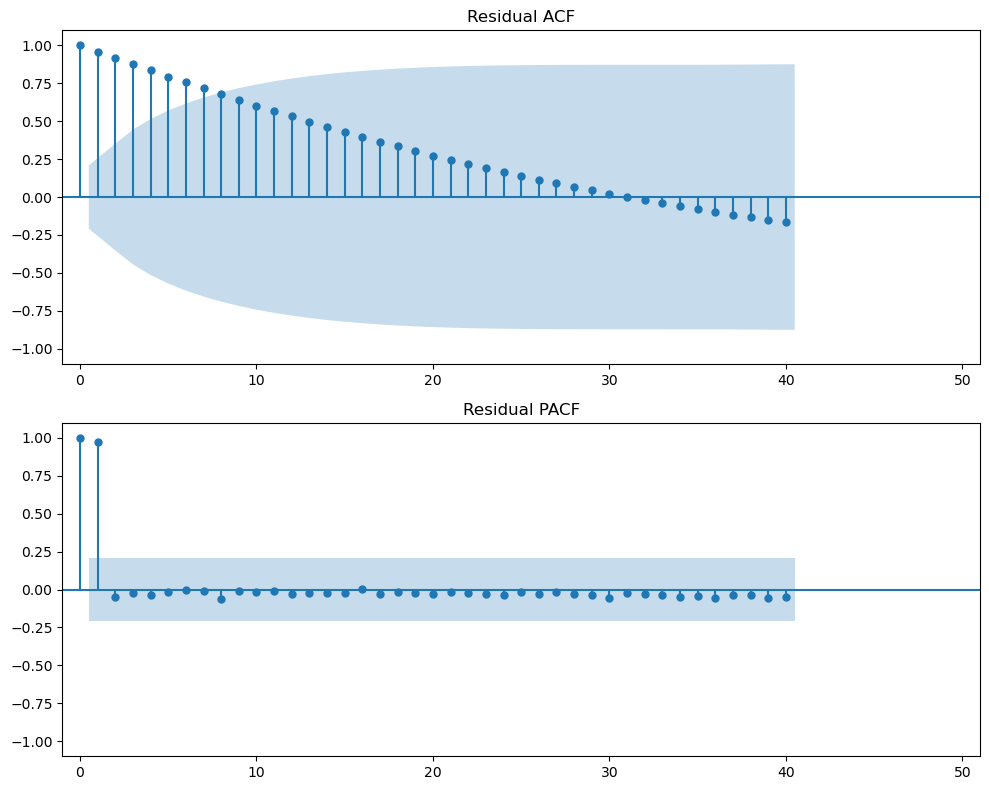

In [42]:
## Y ACF/PACF
plt.figure(figsize=(10, 8))
plot_acf(df.consump, lags=40, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Residual ACF")

plot_pacf(df.consump, lags=40, ax=plt.subplot(212))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Residual PACF")
plt.tight_layout()
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                consump   No. Observations:                   88
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -331.030
Date:                Sat, 21 Jan 2023   AIC                            670.059
Time:                        13:38:20   BIC                            679.968
Sample:                    01-01-1960   HQIC                           674.051
                         - 10-01-1981                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -31.9900     66.952     -0.478      0.633    -163.213      99.233
m2             1.1252      0.037     30.011      0.000       1.052       1.199
ar.L1          0.9615      0.029     33.298      0.000       0.905       1.018
sigma2       105.2316     11.653      9.030      0.000      82.392     128.071
===================================================================================
Ljung-Box (L1) (Q):                   5.76   Jarque-Bera (JB):                25.77
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):              19.01   Skew:                             0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

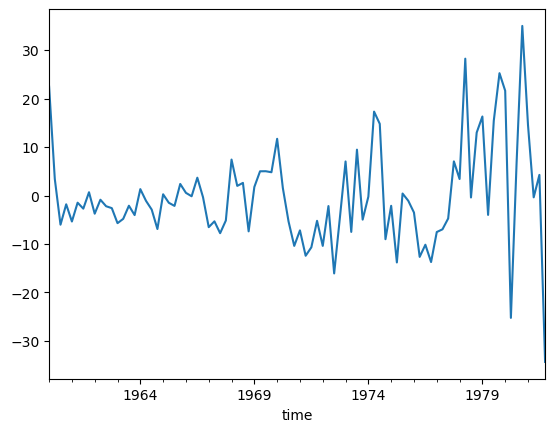

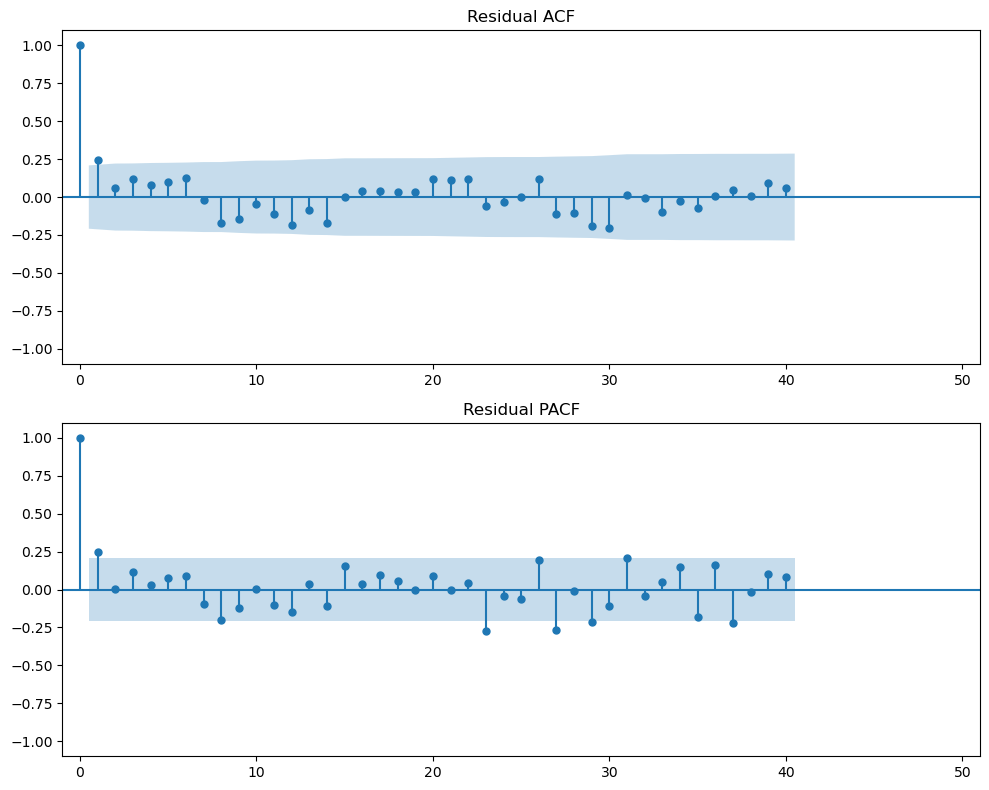

In [43]:
# 모델링
## ARIMAX 
model = ARIMA(df.consump, trend='c', 
              order=(1, 0, 0), exog=df.m2).fit()
display(model.summary())

## 잔차 확인
model.resid.plot()
plt.show()

## 잔차 ACF/PACF
plt.figure(figsize=(10, 8))
plot_acf(model.resid, lags=40, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Residual ACF")

plot_pacf(model.resid, lags=40, ax=plt.subplot(212))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Residual PACF")
plt.tight_layout()
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                             consump   No. Observations:                   88
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 2)   Log Likelihood                -324.056
Date:                             Sat, 21 Jan 2023   AIC                            660.111
Time:                                     13:38:20   BIC                            674.975
Sample:                                 01-01-1960   HQIC                           666.100
                                      - 10-01-1981                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1127      0.635      0.177      0.859      -1.132       1.357
m2             0.2156      0.127      1.691      0.091      -0.034       0.466
ar.L1          0.9963      0.028     35.256      0.000       0.941       1.052
ar.S.L2        0.9852      0.052     18.811      0.000       0.883       1.088
ma.S.L2       -0.6291      0.082     -7.660      0.000      -0.790      -0.468
sigma2        78.2058      7.232     10.813      0.000      64.030      92.381
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               185.09
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):              20.70   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

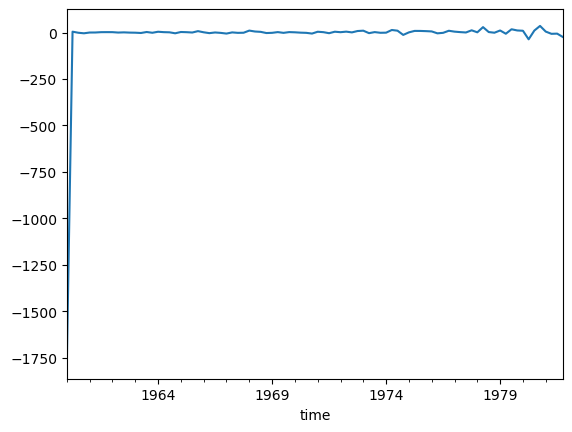

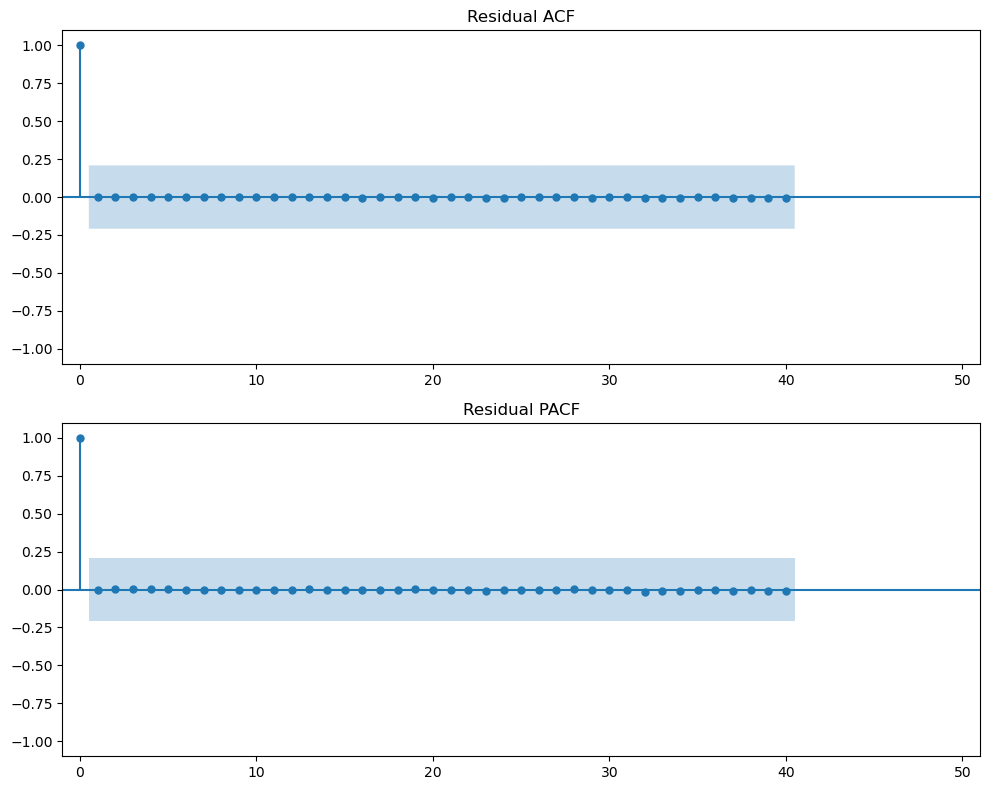

In [44]:
# 좀 더 적합성능을 높이는 방법은? ARMA의 한계는 추세적합!

# SARIMAX 모델링
model = SARIMAX(df.consump, trend='c',
                order=(1,0,0), seasonal_order=(1,0,1,2), 
                exog=df.m2).fit()
display(model.summary())

# 잔차 확인
model.resid.plot()
plt.show()

# 잔차 ACF/PACF
plt.figure(figsize=(10, 8))
plot_acf(model.resid, lags=40, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Residual ACF")

plot_pacf(model.resid, lags=40, ax=plt.subplot(212))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Residual PACF")
plt.tight_layout()
plt.show()

# **적분 선형과정 알고리즘(Integrated Linear Process)**

> **"`실제 데이터분석`에서 활용하게 되는 모듈로 `ARIMA & SARIMAX & AutoARIMA` 등이 있음"**

---

- **장점:**

> - `정상성 및 비정상성 시계열 데이터` 모두에 적용 가능
> - 통계추론 알고리즘이기 때문에 추론과정이 투명하고 `명확한 이해와 해석 가능`
> - `스몰데이터`에서도 모두에서 좋은 성능
> - 기계학습/딥러닝 알고리즘의 큰 이슈인 `과적합 문제` 없이 좋은 성능

- **단점:**

> - `비선형 데이터 패턴`이 많은 데이터를 설명하는데 적합하지 않음
> - 데이터셋이 커져도 성능향상 보장하지 않고 `빅데이터`에서는 기계학습/딥러닝보다 `성능 낮음`

## Auto-Regressive Integrated Moving Average(ARIMA)

> **"$ARIMA(p,d,q)$: `1이상의 추세차분`이 적용된 `정상성 종속변수` $\Delta^d Y_t = (1-L)^d Y_{t}$가 알고리즘의 차수($p~and~q$)가 `유한한` $AR(p)$와 $MA(q)$의 `선형조합`"**  
>
> - 비정상성인 시계열 데이터 $Y_t$를 차분한 결과로 만들어진 $\Delta Y_t = Y_t - Y_{t-1} = (1-L) Y_{t}$가 `정상성인 데이터`이고 ARMA 모형을 따르면 원래의 $Y_t$를 **ARIMA(p,1,q) 모형**이라고 함  
>
>> **$\rightarrow d \geq 1$:** $Y_t$는 `비정상성 시계열 데이터`이다(단위근을 갖는다)  
>
> - $d$번 `추세차분한 후` 시계열 $\Delta^d Y_t$가 `정상성인 종속변수`고 ARMA(p,q) 모형을 따른다면 `적분차수(Order of Integrarion)`가 $d$인 **ARIMA(p,d,q)**로 표기함  
>
>> - $p=0$: ARIMA(0,d,q) = IMA(d,q)
>> - $q=0$: ARIMA(p,d,0) = ARI(p,d)  

| Parameters | Description |
|-----|----------------------------------|
| $p$ | order of the autoregressive part |
| $d$ | degree of differencing involved |
| $q$ | order of the moving average part |

<!-- ---

- **ARIMA(0,1,1) = IMA(1,1)**

> **"자기상관계수(ACF)가 `빠르게 감소하지 않는 것`이 ARIMA와 같은 `적분과정(Integrated Process)의 특징`"**
>
> - `차분을 해야 정상성`이 되는 $Y_t$이기에, `시차(Lag)가 증가해도 ACF가 1에 가까운 상관성`을 유지하려 하기에 쉽게 감소하지 않음

\begin{align*}
Y_t &= Y_{t-1} + \epsilon_t + \theta_1 \epsilon_{t-1} \\
Y_t &= \epsilon_t+(1+\theta)\epsilon_{t-1}+(1+\theta)\epsilon_{t-2}+(1+\theta)\epsilon_{t-3}+\cdots \\
Corr(Y_t, Y_{t-1}) &= \rho_i \approx 1
\end{align*}

---

- **ARIMA(0,2,1) = IMA(2,1)**

\begin{align*}
\Delta^2 Y_t = (1-L)^2 Y_{t} = \epsilon_t + \theta_1 \epsilon_{t-1}\\
\end{align*} -->

## ARIMA 모형 차수결정 정리

> **1) 추정 및 예측을 하기 전에 `파라미터에 따라 모형이 어떠한 결과를 도출할지 이해(예상)` 필요**  
> **2) 결과이해(예상)는 기계의 실수를 방지하고 `결과의 확신을 증가`시킴**  

---

- **$p$, $q$ 파라미터 추론:** `ACF & PACF` 방법으로 `차수 결정`

> (1) **정상성 형태 변환:** `차분/로그변환/계절성제거 등`을 통해 데이터를 `정상성 형태로 변환`
>
> (2) $ACF$, $PACF$를 도식화 하여 `ARMA의 파라미터 차수를 추론`  

- `적분차수(d)가 존재하는 경우` 자기상관계수(ACF)가 `빠르게 감소하지 않는 특징`

<center><img src='Image/Expert/ARIMA_Pattern.png' width='500'></center>

<!-- ---

- **$c$, $d$ 파라미터 이해:** `X가 반영되지 않고 추정된 시계열 알고리즘`은 결국 `상수항의 적합성을 높이는 것!`

> **"`상수항(Const)`인 $c$는 이론수식 복잡성으로 `생략되기도 하나 존재가능`"**  
> **"`높은 차수의 차분`($d$)은 예측 `구간추정 범위를 급격하게 상승`시킴"**   
>
> - $c = 0, d = 0$: 점추정은 `0`, 예측의 구간추정은 `과거데이터의 표준편차`
> - $c \neq 0, d = 0$: 점추정은 `과거데이터의 평균`, 예측의 구간추정은 `과거데이터의 표준편차`
> - $p \geq 2$: 특정 `변동(계절성, 싸이클)을 반영한 예측`을 위해선 `2이상의 차수 필수`
<!--     - 예시: AR(2) 모형에서 $\phi_1^2+4\phi_2<0$를 만족해야 싸이클 형태로 예측되며 이때의 발생 싸이클은 다음과 같다
    \begin{align*}
    \frac{2\pi}{\text{arc cos}(-\phi_1(1-\phi_2)/(4\phi_2))}
    \end{align*} -->

<!-- |  | **Long-term Forecasts** |
|:---------:|:-----------|
| $c = 0, d = 0$ | go to zero |
| $c = 0, d = 1$ | go to a non-zero constant |
| $c = 0, d = 2$ | follow a straight line |
| $c \neq 0, d = 0$ | go to the mean of the data |
| $c \neq 0, d = 1$ | follow a straight line |
| $c \neq 0, d = 2$ | follow a quadratic trend | -->

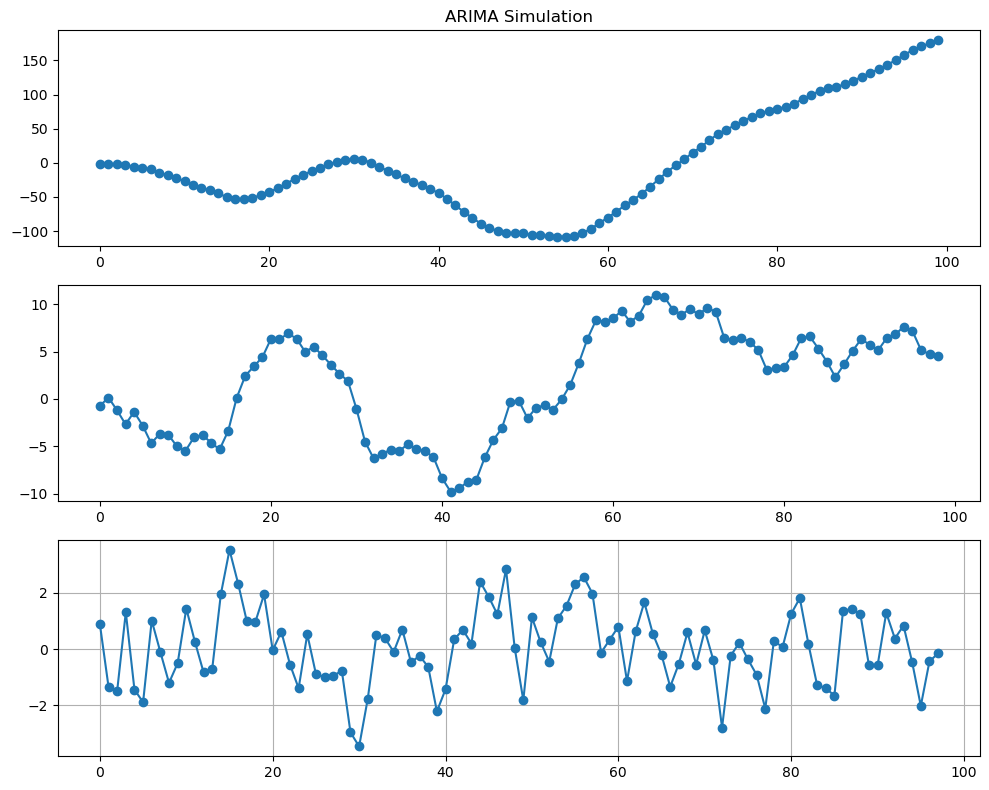

In [45]:
# 그런데 적절한 d는 어떻게 추론?
# 2차누적/1차누적/미누적 데이터생성 및 적분차수 이해
np.random.seed(123)
y2 = arma_generate_sample([1], [1, 0.6], 
                          nsample=100).cumsum().cumsum()
y1 = np.diff(y2)
y0 = np.diff(y1)

plt.figure(figsize=(10,8))
plt.subplot(311)
plt.title("ARIMA Simulation")
plt.plot(y2, 'o-')
plt.subplot(312)
plt.plot(y1, 'o-')
plt.subplot(313)
plt.plot(y0, 'o-')
plt.tight_layout()
plt.grid()
plt.show()

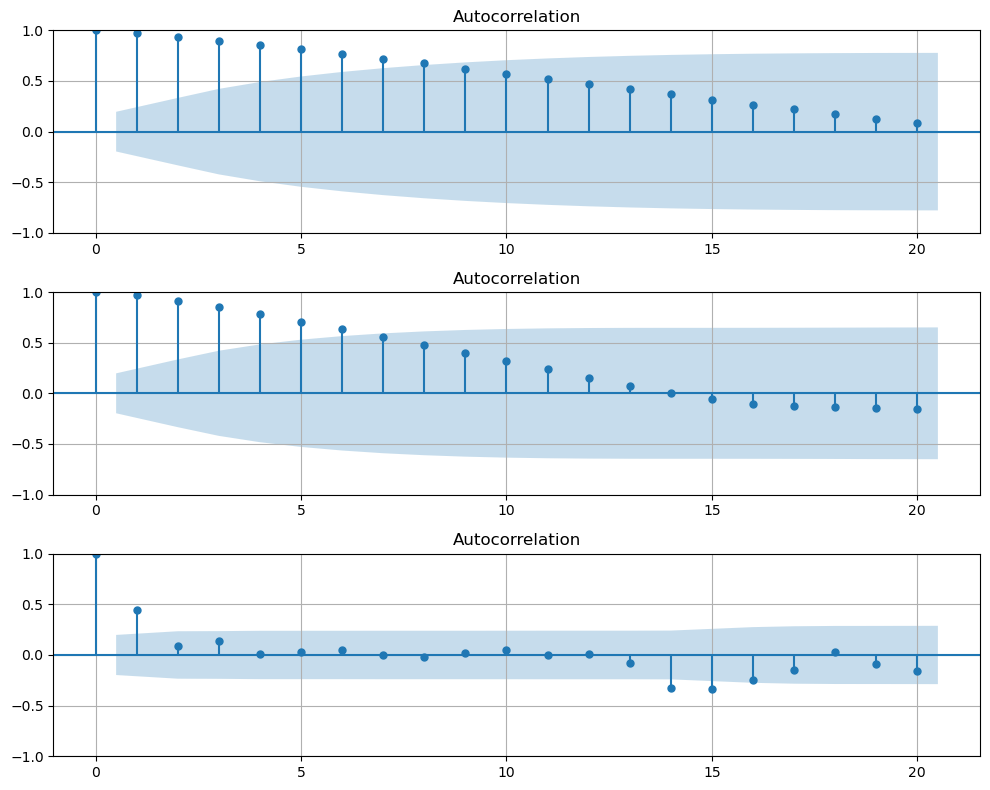

In [46]:
# 2차누적/1차누적/미누적 데이터시각화
plt.figure(figsize=(10,8))
plot_acf(y2, ax=plt.subplot(311))
plt.grid()
plot_acf(y1, ax=plt.subplot(312))
plt.grid()
plot_acf(y0, ax=plt.subplot(313))
plt.grid()
plt.tight_layout()
plt.show()

- **과차분(Over-differencing):**

<center><img src='Image/Expert/ARIMA_Pattern.png' width='500'></center>

> **"`필요 이상의 차분`은 `MA모형을 생성!`"**
>
> - `ARIMA(0,d,0)` 모형을 따르는 $Y_t$를 $d$번 차분하면 백색잡음만 남음
> - **추가 1차분:** MA(1), **추가 2차분:** MA(2)
> - 과적합은 `ACF/PACF의 수치를 오히려 증가시킬 수` 있음

\begin{align*}
\Delta^d Y_t &= \epsilon_t \\
\Delta^{d+1} Y_t &= \epsilon_t - \epsilon_{t-1} \\
\Delta^{d+2} Y_t &= \epsilon_t - 2\epsilon_{t-1} + \epsilon_{t-2} \\
\end{align*}

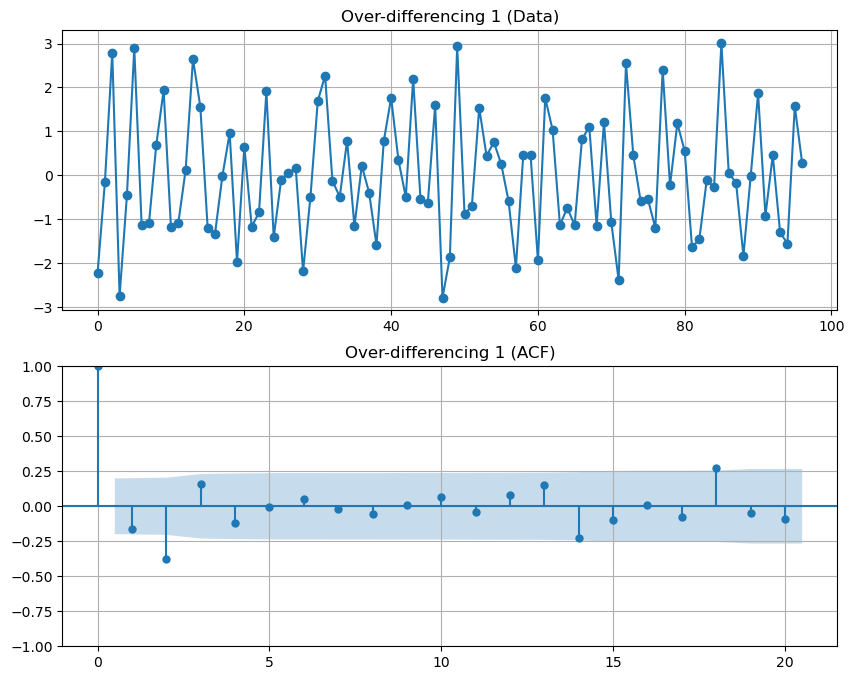

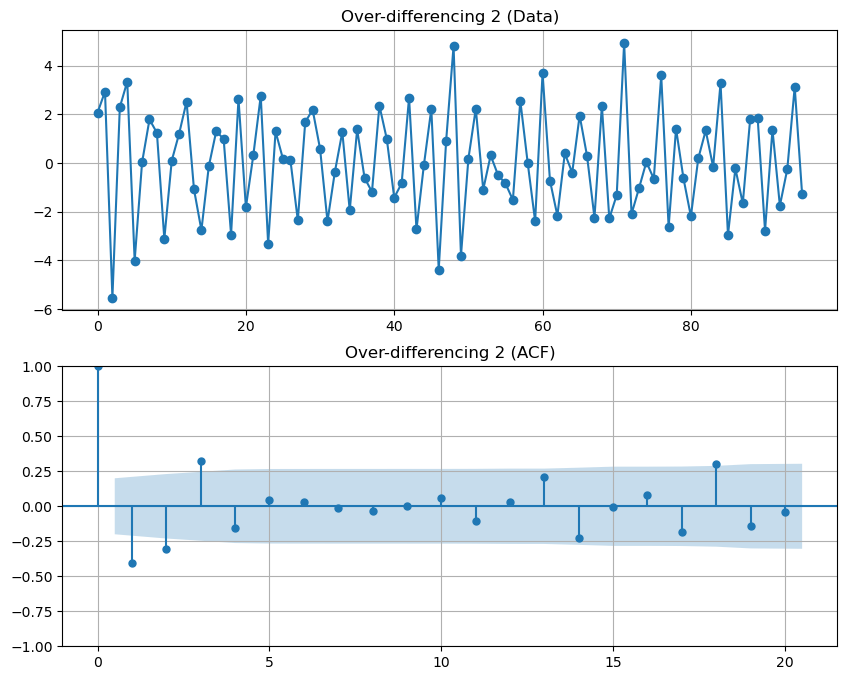

In [47]:
# 과적차분 데이터 이해
y1_minus = np.diff(y0)

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(y1_minus, 'o-')
plt.title("Over-differencing 1 (Data)")
plt.grid()
plot_acf(y1_minus, ax=plt.subplot(212))
plt.title("Over-differencing 1 (ACF)")
plt.grid()
plt.show()

y2_minus = np.diff(y1_minus)

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(y2_minus, 'o-')
plt.title("Over-differencing 2 (Data)")
plt.grid()
plot_acf(y2_minus, ax=plt.subplot(212))
plt.title("Over-differencing 2 (ACF)")
plt.grid()
plt.show()

- **$d$ 의미는 단위근 존재?:** `비정상성 데이터 = 단위근 존재 데이터`

> **"`단위근을 갖는다`는게 왜 `비정상성 시계열 데이터`라는 거지? $\rightarrow$ `단위근` $d$만큼의 `추세차분을 해야 정상성이 되니까!`"**
>
> - "$Y_t$는 $d=1$인 ARIMA(p,1,q)를 따른다" $=$ "$\Delta Y_t = Y_t - Y_{t-1}$가 정상성이며 ARMA(p,q)를 따른다"

$$
\begin{align*}
& \text{Main Equation of ARIMA} \\ \Delta Y_t &= \phi_1 \Delta Y_{t-1} + \phi_2 \Delta Y_{t-2} + \cdots + \phi_p \Delta Y_{t-p} + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q} + \epsilon_t \\
\end{align*}
$$

$$
\begin{align*}
\Delta Y_t - \phi_1 \Delta Y_{t-1} - \phi_2 \Delta Y_{t-2} - \cdots - \phi_p \Delta Y_{t-p} &= \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q} + \epsilon_t \\
Y_t-Y_{t-1} - \phi_1 (Y_{t-1}-Y_{t-2}) - \phi_2 (Y_{t-2}-Y_{t-3}) - \cdots - \phi_p (Y_{t-p}-Y_{t-p-1}) &= \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q} \\
Y_t - (\phi_1+1)Y_{t-1} - (\phi_2-\phi_1)Y_{t-2} - \cdots - (\phi_p-\phi_{p-1})Y_{t-p} + \phi_pY_{t-p-1} &= \epsilon_t+\theta_1\epsilon_{t-1}+\theta_2 \epsilon_{t-2}+\cdots+\theta_q \epsilon_{t-q} \\
1-(\phi_1+1)Y-(\phi_2-\phi_1)Y^2-\cdots-(\phi_p-\phi_{p-1})Y^p+\phi_pY^{p+1} &= 0 \\
(1-Y)(1-\phi_1Y-\phi_2Y^2-\cdots-\phi_pY^p) &= 0 \\
\end{align*}
$$

$$
\begin{align*}
\text{Solution of ARIMA} && Y = 1 \text{ and } \sum_{i=1}^p \phi_i = 1
\end{align*}
$$

$$
\begin{align*}
1-\phi_1Y-\phi_2Y^2-\cdots-\phi_pY^p = 0 \\
\end{align*}
$$

$$
\begin{align*}
\text{Solution of ARMA} && \sum_{i=1}^p \phi_i = 1 \\
\end{align*}
$$

> - 단위근이 없으면 $Y=1$ 항이 생성되지 않고 `가중치가 1보다 작도록 잘 추정된다`는 의미
> - 단위근이 있으면 $Y=1$ 항이 생기면서 `가중치가 1보다 작은 경우가 나온다고 단정할 수 없음`
> - 단위근이 있다는 것은 `추세가 존재한다는 의미` $\rightarrow$ `추세때문에 ACF가 느리게 감소하고 쉽게 0으로 수렴하지 않음` $\rightarrow$ `차분으로 추세제거 가능`

---

- **ARIMA 표현식 정리:** 

$$
\begin{align*}
\text{Main Equation of ARMA} \\ Y_t &= \phi_1Y_{t-1} + \phi_2Y_{t-2} + \cdots \\
& + \phi_pY_{t-p} + 
\theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q} + \epsilon_t \\ \phi(L)Y_t &= \theta(L)\epsilon_t \\
\\
\text{Main Equation of ARIMA} \\ (1-L)^d Y_t &= \phi_1 (1-L)^d Y_{t-1} + \phi_2 (1-L)^d Y_{t-2} + \cdots \\
& + \phi_p (1-L)^d Y_{t-p} + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q} + \epsilon_t \\ \phi(L)(1-L)^dY_t &= \theta(L)\epsilon_t \\
\end{align*}
$$

---

> - `파리미터의 수치 대입`을 통해 `쉽게 알고리즘 이해` 가능

$$
\begin{equation}
  \begin{array}{c c c c}
    (1-\phi_1L - \cdots - \phi_p L^p) & (1-L)^d Y_{t} &= (1 + \theta_1 L + \cdots + \theta_q L^q)\epsilon_t\\
    {\uparrow} & {\uparrow} & {\uparrow}\\
    \text{AR($p$)} & \text{$d$ differences} & \text{MA($q$)}\\
  \end{array}
\end{equation}
$$

| **Time Series Algorithms** | **ARIMA Expressions** |
|:-------------------------:|:-------------------:|
| White noise | ARIMA(0,0,0) |
| Random walk | ARIMA(0,1,0) |
| Autoregression($AR(p)$) | ARIMA($p$,0,0) |
| Moving average($MA(q)$) | ARIMA(0,0,$q$) |

---

$$
\begin{align*}
\text{Main Equation of ARIMA} \\
(1-\phi_1L - \cdots - \phi_p L^p) (1-L)^d Y_{t} &= (1 + \theta_1 L + \cdots + \theta_q L^q)\epsilon_t\\
\\
\text{Main Equation of ARIMAX} \\
(1-\phi_1L - \cdots - \phi_p L^p) (1-L)^d Y_{t} &= (1 + \theta_1 L + \cdots + \theta_q L^q)\epsilon_t + \sum^{k}_{i=1}\beta_{i}X_{it}\\
\end{align*}
$$

---

- **ARIMA 모형의 한계:** `추세에 대해서만` 학습 효과

time  value  month
67 1978-08-31   9827      8
68 1978-09-30   9110      9
69 1978-10-31   9070     10
70 1978-11-30   8633     11
71 1978-12-31   9240     12

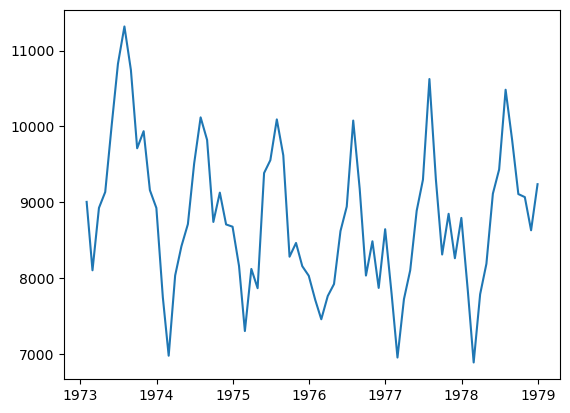

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


Stationarity_ADF  Stationarity_KPSS
Test Statistics                 -2.54               0.19
p-value                          0.11               0.10
Used Lag                        12.00               4.00
Critical Value(1%)              -3.55               0.74
Critical Value(5%)              -2.91               0.46
Critical Value(10%)             -2.59               0.35

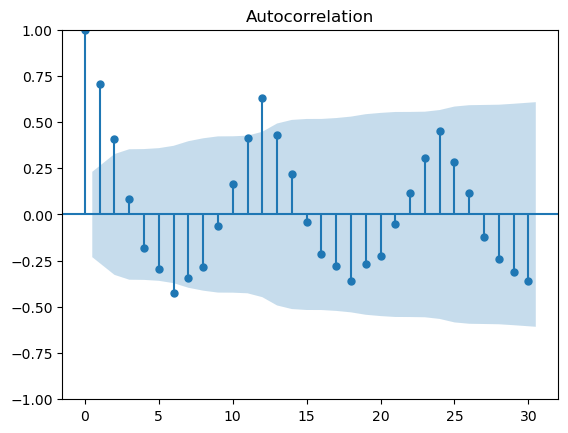

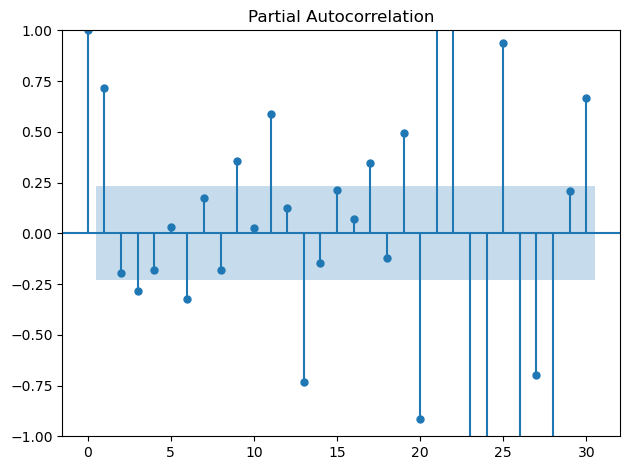

In [48]:
# 데이터 로딩 및 시간변수 반영
df_set = sm.datasets.get_rdataset("accdeaths", package="MASS")
df = df_set.data
df.time = pd.date_range('1973-01-01', periods=len(df), freq='M')
df['month'] = df.time.dt.month

# 데이터 확인
display(df.tail())
plt.plot(df.time, df.value)
plt.show()

# 정상성 확인
print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
display(stationarity_ADF_KPSS(pd.DataFrame(df.value)))
plot_acf(df.value, lags=30, use_vlines=True)
plot_pacf(df.value, lags=30, use_vlines=True)
plt.tight_layout()
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   72
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -570.304
Date:                Sat, 21 Jan 2023   AIC                           1148.608
Time:                        13:38:24   BIC                           1157.714
Sample:                             0   HQIC                          1152.233
                                 - 72                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8790.0777    248.774     35.334      0.000    8302.490    9277.665
ar.L1          0.6216      0.165      3.760      0.000       0.298       0.946
ma.L1          0.1704      0.193      0.884      0.377      -0.207       0.548
sigma2      4.395e+05   1.02e+05      4.310      0.000     2.4e+05    6.39e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 2.18
Prob(Q):                              0.80   Prob(JB):                         0.34
Heteroskedasticity (H):               1.22   Skew:                             0.09
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

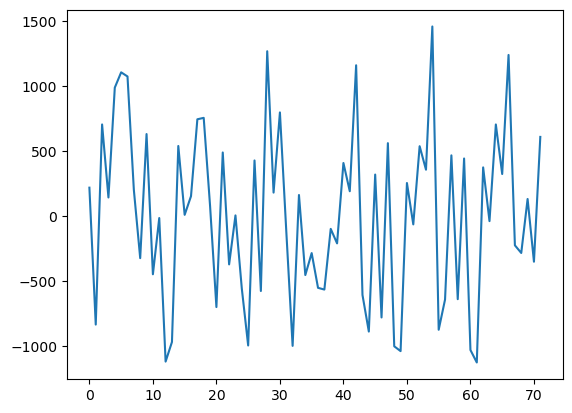

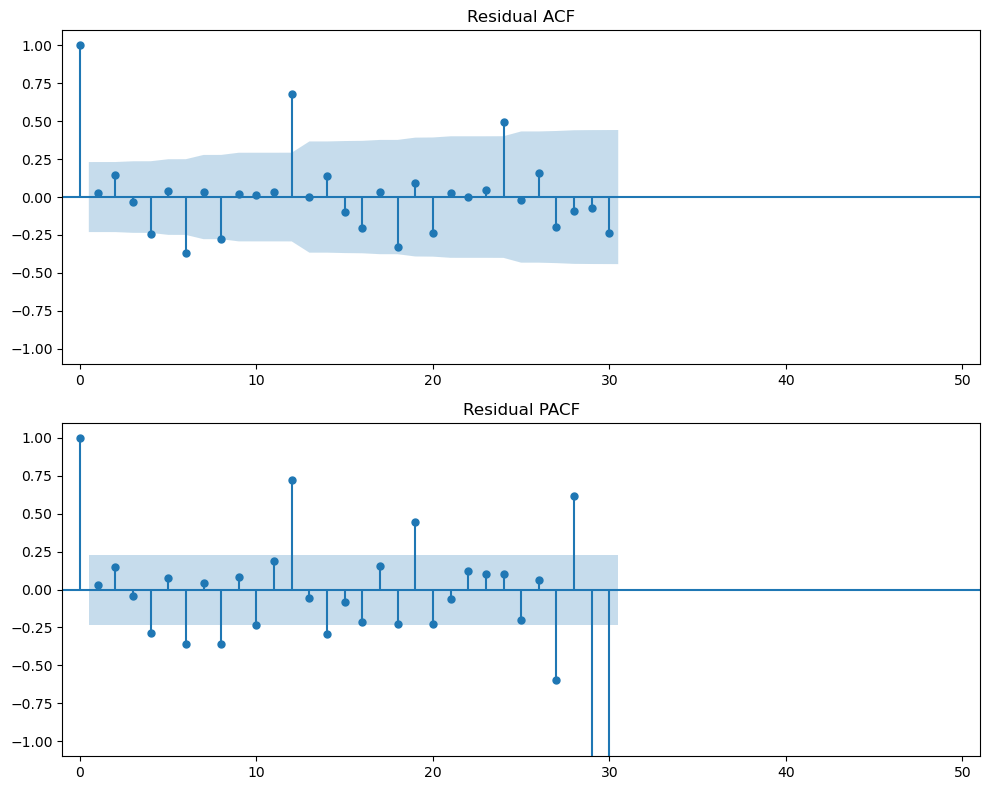

In [49]:
# 모델링
## ARIMA
model = ARIMA(df.value, trend='c', order=(1, 0, 1)).fit()
display(model.summary())

## 잔차 확인
model.resid.plot()
plt.show()

## 잔차 ACF/PACF
plt.figure(figsize=(10, 8))
plot_acf(model.resid, lags=30, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Residual ACF")

plot_pacf(model.resid, lags=30, ax=plt.subplot(212))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Residual PACF")
plt.tight_layout()
plt.show()

## Seasonal ARIMA(SARIMA)

> **"ARIMA 모형은 Non-seasonal 데이터 또는 추세 데이터의 모델링 $\rightarrow$ `계절성 패턴 반영 모델 필요!`"**  
>
> - 시계열 전처리에 따르면 `데이터를 추세와 계설정으로 분해`가 가능하고 `각각에 ARIMA를 별도 적용`
>
> - `SARIMAX 클래스` 이용하면 Multiplicated SARIMA(p,d,q)x(P,D,Q,m) 모형 추정 및 예측 가능
>
> - SARIMAX의 `fit 메서드`는 모수를 추정하여 그 결과를 `SARIMAX Result 클래스 인스턴스`로 반환 

\begin{align*}
\text{SARIMA} && \underbrace{(p, d, q)} && \underbrace{(P, D, Q)_m} \\
&& {\uparrow} && {\uparrow} \\
&& \text{Non-seasonal part} && \text{Seasonal part} \\
&& \text{of the model} && \text{of the model} \\
\end{align*}

\begin{align*}
\text{where } m = \text{ seasonal lag of observations.}
\end{align*}

---

- **파라미터 사용예시:**

\begin{align*}
\text{ARIMA(p,d,q)} \\
(1-\phi_1L - \cdots - \phi_p L^p) (1-L)^d Y_{t} &= (1 + \theta_1 L + \cdots + \theta_q L^q) \epsilon_t\\
\\
\text{ARIMA(1,1,1)} \\
(1 - \phi_{1}L) (1 - L)Y_{t} &= (1 + \theta_{1}L) \epsilon_{t}. \\
\\
\end{align*}

---

\begin{align*}
\text{SARIMA(p,d,q)(P,D,Q)}_m \\ 
(1-\phi_1L - \cdots - \phi_p L^p) \\ 
(1 - \Phi_{1}L^{m} - \Phi_{2}L^{2m} - \cdots - \Phi_{P}L^{Pm}) \\
(1-L)^d (1-L^{m})^D Y_{t} &= (1 + \theta_1 L + \cdots + \theta_q L^q) \\ 
& (1 + \Theta_{1}L^{m} + \Theta_{2}L^{2m} + \cdots + \Theta_{Q}L^{Qm}) \epsilon_t\\
\\
\text{SARIMA(1,1,1)(1,1,1)}_4 \\
(1 - \phi_{1}L)~(1 - \Phi_{1}L^{4}) \\
(1 - L) (1 - L^{4})Y_{t} &= (1 + \theta_{1}L)~ (1 + \Theta_{1}L^{4})\epsilon_{t}\\
\\
\text{SARIMA(1,2,1)(1,2,1)}_4 \\
(1 - \phi_{1}L)~(1 - \Phi_{1}L^{4}) \\
(1 - L)^2 (1 - L^{4})^2 Y_{t} &= (1 + \theta_{1}L)~ (1 + \Theta_{1}L^{4})\epsilon_{t}.\\
\end{align*}

### Simple SARIMA: 계절성 시차에서만 ACF가 유의하지 않음  

- **SARIMA(0,0,0)(0,0,1,12):** 각 월의 시계열 자료의 값이 `현재의 백색잡음과 작년 동월 백색잡음`에 의해 생성

> - ACF 그래프에서 `계절성시차(Lag12)`에서의 계수가 유의수준을 벗어난 증가를 보임(다른 시차에서는 유의수준 내 존재)  
> - PACF 그래프에서 `반복되는 계절성시차들의 지수적 감소`를 보임   

\begin{align*}
\text{Main Equation} && Y_t &= (1 + \Theta_{1}L^{12})\epsilon_{t} \\ 
&& &= \epsilon_t + \Theta \epsilon_{t-12} \\
\text{Covariance} && Cov(Y_t, Y_{t-1}) &= \text{Cov}( \epsilon_t + \Theta \epsilon_{t-12} ,  \epsilon_{t-1} + \Theta \epsilon_{t-13} ) = 0 \\
&& Cov(Y_t, Y_{t-12}) &= \text{Cov}( \epsilon_t + \Theta \epsilon_{t-12} ,  \epsilon_{t-12} + \Theta \epsilon_{t-24} ) = -\Theta \sigma_e^2 \\
\text{Autocorrelation} && \rho_{k \cdot 12} &= \dfrac{\Theta_k + \Theta_{1}\Theta_{k+1} + \Theta_{2}\Theta_{k+2} + \cdots + \Theta_{Q-k}\Theta_{k+Q}}{1 + \Theta_1^2 +\Theta_2^2 + \cdots + \Theta_Q^2} \\
\end{align*}

---

- **SARIMA(0,0,0)(1,0,0,12):** 각 월의 시계열 자료의 값이 `작년 동월 자료값과 현재의 백색잡음`에 의해 생성

> - ACF 그래프에서 `반복되는 계절성시차들의 지수적 감소`를 보임  
> - PACF 그래프에서 `계절성시차(Lag12)`에서의 계수가 유의수준을 벗어난 증가를 보임(다른 시차에서는 유의수준 내 존재)  

\begin{align*}
\text{Main Equation} && (1 - \Phi_{1}L^{12}) Y_{t} &= \epsilon_t \\
&& Y_t &= \Phi Y_{t-12} + \epsilon_t \\
\text{Stationary Condition} && \Phi &< 1 \\
\text{Autocorrelation} && \rho_{k \cdot 12} &= (-1)^{k+1}\Phi^k \\
\end{align*}

---

- **SARIMA(0,0,0)(P,0,Q,12):**  

\begin{align*}
\text{Main Equation} && (1 - \Phi_{1}L^{12} - \Phi_{2}L^{24} - \cdots - \Phi_{P}L^{12P}) Y_{t} &= (1 + \Theta_{1}L^{12} + \Theta_{2}L^{24} + \cdots + \Theta_{Q}L^{12Q})\epsilon_{t} \\ 
&& Y_t - \Phi_1 Y_{t-12} - \Phi_2 Y_{t-24} - \cdots - \Phi_P Y_{t-12P} &= \epsilon_t + \Theta_1 \epsilon_{t-12} + \Theta_2 \epsilon_{t-24} + \cdots + \Theta_Q \epsilon_{t-12Q} \\
\end{align*}

- **SARIMA(0,0,0)(P,1,Q,12):**  

\begin{align*}
\text{Main Equation} && (1 - \Phi_{1}L^{12} - \Phi_{2}L^{24} - \cdots - \Phi_{P}L^{12P}) (1-L^{12}) Y_{t} &= (1 + \Theta_{1}L^{12} + \Theta_{2}L^{24} + \cdots + \Theta_{Q}L^{12Q})\epsilon_{t} \\
&& (Y_t-Y_{t-12}) - \Phi_1 (Y_{t-12}-Y_{t-24}) - \cdots - \Phi_P (Y_{t-12P}-Y_{t-12(P+1)}) \\
&&= \epsilon_t + \Theta_1 \epsilon_{t-12} + \Theta_2 \epsilon_{t-24} + \cdots + \Theta_Q \epsilon_{t-12Q} \\
\end{align*}

- **SARIMA(0,0,0)(0,1,1,12):**  

\begin{align*}
\text{Main Equation} && (1-L^{12}) Y_{t} &= (1 + \Theta_{1}L^{12})\epsilon_{t} \\
&& Y_t-Y_{t-12} &= \epsilon_t + \Theta_1 \epsilon_{t-12} \\
&& Y_t &= Y_{t-12} + \epsilon_t + \Theta_1 \epsilon_{t-12} \\
\end{align*}

- **SARIMA(0,0,0)(1,1,0,12):**  

\begin{align*}
\text{Main Equation} && (1 - \Phi_{1}L^{12}) (1-L^{12}) Y_{t} &= \epsilon_{t} \\
&& (Y_t-Y_{t-12}) - \Phi_1 (Y_{t-12}-Y_{t-24}) &= \epsilon_t \\
&& Y_t- (1 + \Phi_1)Y_{t-12} + \Phi_1 Y_{t-24} &= \epsilon_t \\
&& Y_t &= (1 + \Phi_1)Y_{t-12} - \Phi_1 Y_{t-24} + \epsilon_t \\
\end{align*}

---

- **계절성 차수 추정 정리:** 계절성 부분의 AR과 MA 차수는 `ACF/PACF의 계절성 시차(Lag) 형태로 파악` 가능  

| **Parameters** | **Description** |
|:-------:|:-------------------------------------:|
| $p$ | Trend autoregression order |
| $d$ | Trend difference order |
| $q$ | Trend moving average order |
| $m$ | the number of time steps for a single seasonal period |
| $P$ | Seasonal autoregression order |
| $D$ | Seasonal difference order |
| $Q$ | Seasonal moving average order |

---

- **예시 4종 실습 이해:**


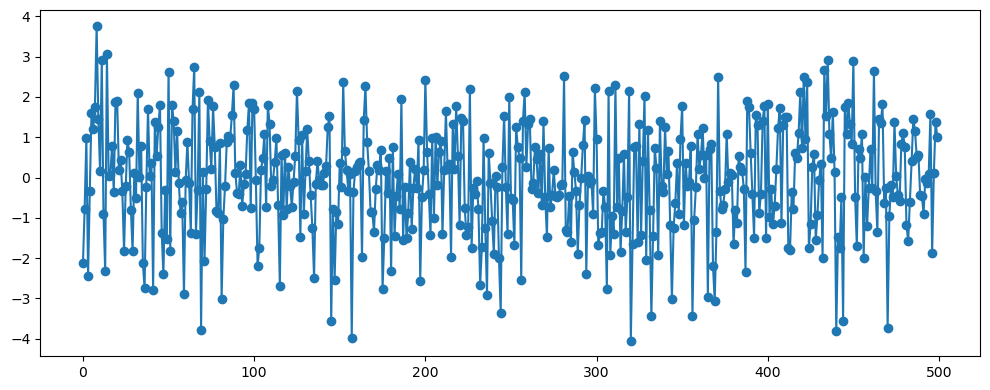

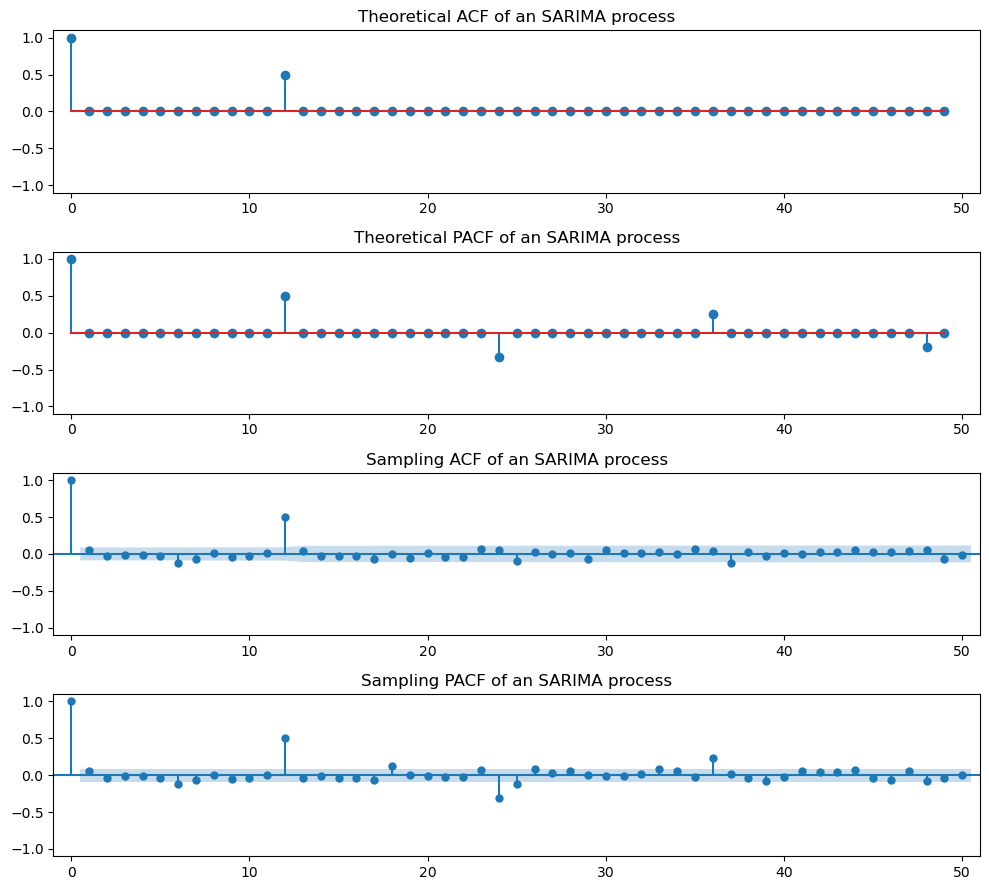

In [50]:
# SARIMA(0,0,0)(0,0,1,12)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.95])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 9))
plt.subplot(411)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical ACF of an SARIMA process")

plt.subplot(412)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical PACF of an SARIMA process")

plot_acf(y, lags=50, ax=plt.subplot(413))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling ACF of an SARIMA process")

plot_pacf(y, lags=50, ax=plt.subplot(414))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling PACF of an SARIMA process")
plt.tight_layout()
plt.show()

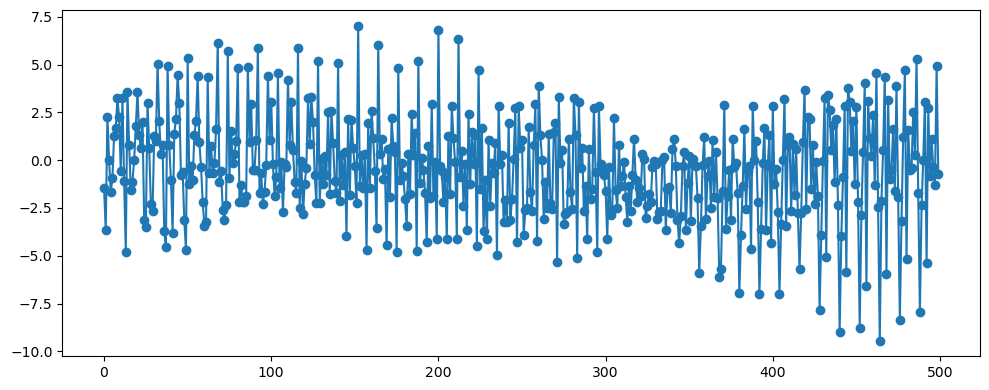

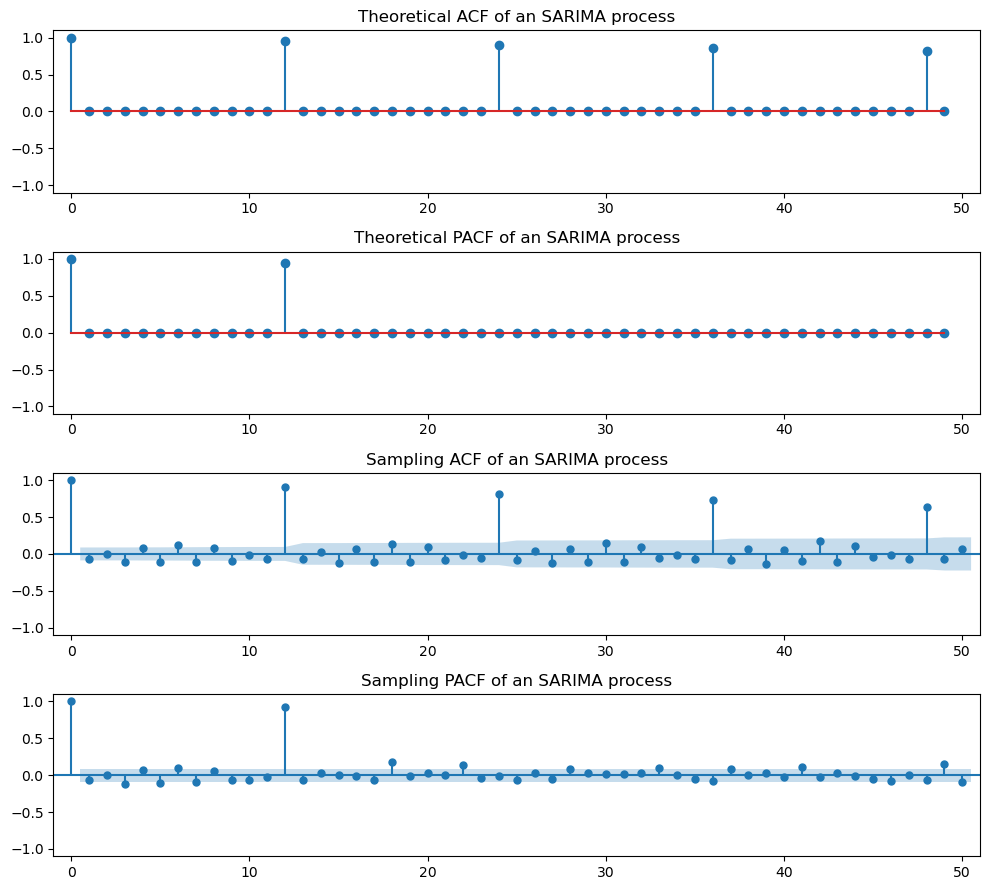

In [51]:
# SARIMA(0,0,0)(1,0,0,12)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.95])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 9))
plt.subplot(411)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical ACF of an SARIMA process")

plt.subplot(412)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical PACF of an SARIMA process")

plot_acf(y, lags=50, ax=plt.subplot(413))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling ACF of an SARIMA process")

plot_pacf(y, lags=50, ax=plt.subplot(414))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling PACF of an SARIMA process")
plt.tight_layout()
plt.show()

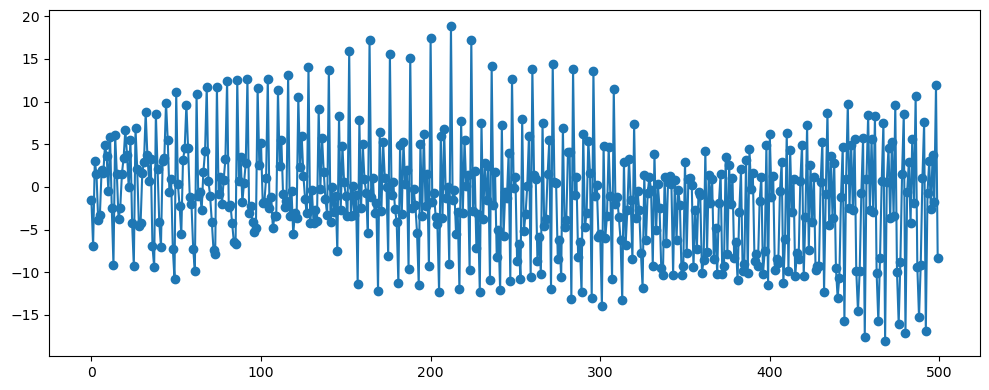

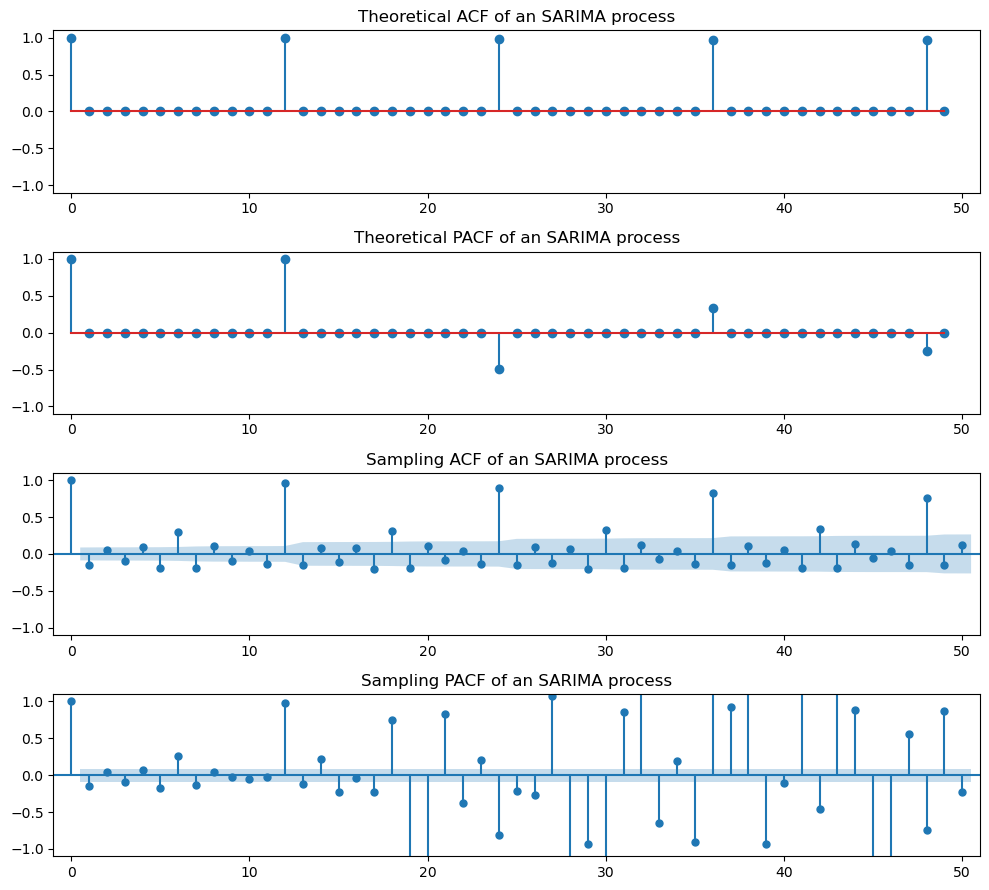

In [52]:
# SARIMA(0,0,0)(0,1,1,12)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.99])
ma_params = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.95])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 9))
plt.subplot(411)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical ACF of an SARIMA process")

plt.subplot(412)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical PACF of an SARIMA process")

plot_acf(y, lags=50, ax=plt.subplot(413))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling ACF of an SARIMA process")

plot_pacf(y, lags=50, ax=plt.subplot(414))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling PACF of an SARIMA process")
plt.tight_layout()
plt.show()

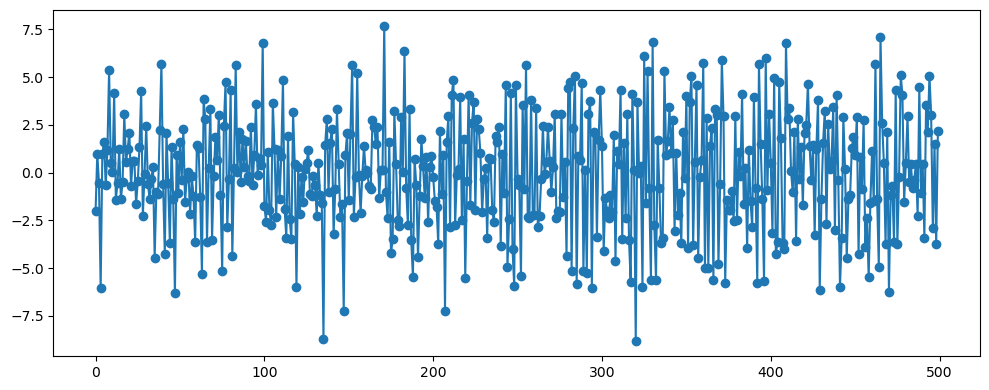

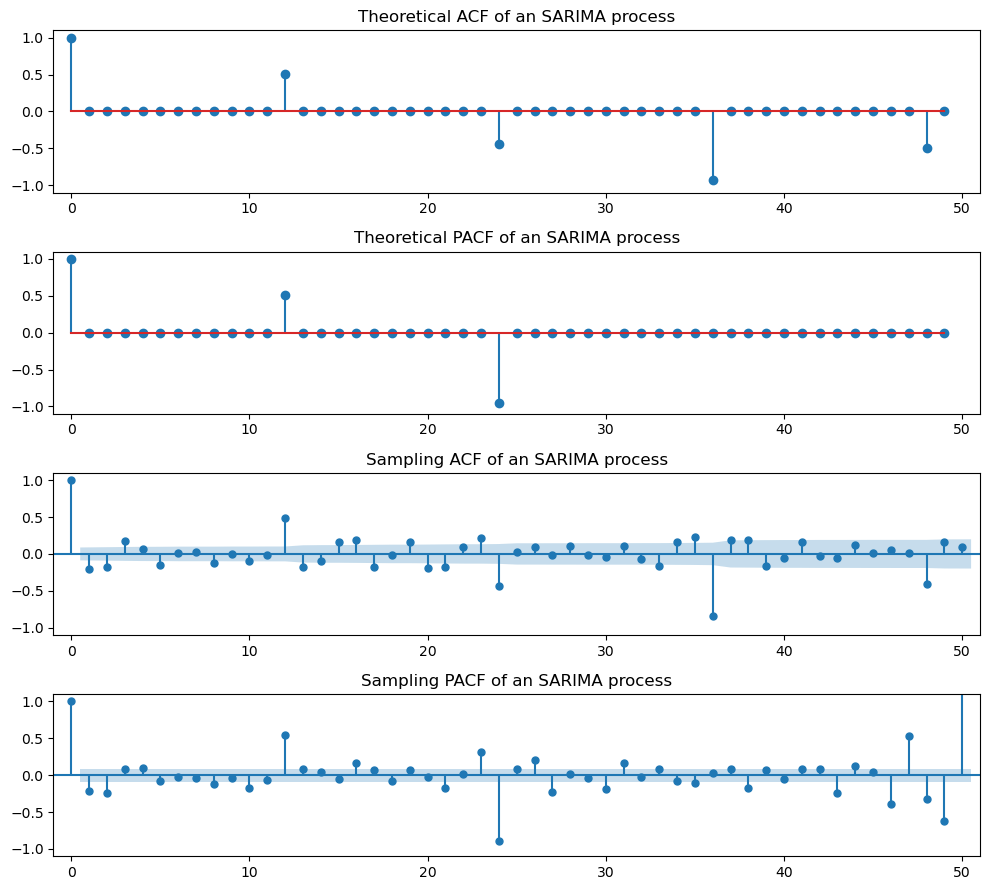

In [53]:
# SARIMA(0,0,0)(1,1,0,12)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.99, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.95])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 9))
plt.subplot(411)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical ACF of an SARIMA process")

plt.subplot(412)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical PACF of an SARIMA process")

plot_acf(y, lags=50, ax=plt.subplot(413))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling ACF of an SARIMA process")

plot_pacf(y, lags=50, ax=plt.subplot(414))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling PACF of an SARIMA process")
plt.tight_layout()
plt.show()

### Multiplicated SARIMA: 계절성 및 주변 시차에서 ACF가 유의하지 않음  

- **SARIMA(0,0,1)(0,0,1,12):** `계절주기 12`고 계절성 데이터는 `ARIMA(0,0,1)`, 추세 데이터는 `ARIMA(0,0,1)` 
> - 시차(Lag)가 `1, 11, 12, 13`인 경우를 제외하고는 자기상관계수가 모두 0  

\begin{align*}
\text{Main Equation} && Y_t &= (1+\theta L)(1+\Theta L^{12}) \epsilon_t = \epsilon_t + \theta \epsilon_{t-1} + \Theta \epsilon_{t-12} + \theta\Theta \epsilon_{t-13} \\
\text{Autocorrelation} && \rho_1 &= -\dfrac{\theta}{1+\theta^2} \\
&& \rho_{11} = \rho_{13} &= \dfrac{\theta\Theta}{(1+\theta^2)(1+\Theta^2)} \\
&& \rho_{12} &= -\dfrac{\Theta}{1+\Theta^2} \\
\end{align*}

---

- **SARIMA(0,0,1)(1,0,0,12):** `계절주기 12`고 계절성 데이터는 `ARIMA(1,0,0)`, 추세 데이터는 `ARIMA(0,0,1)`  
> - 시차(Lag)가 `12의 배수와 그 앞/뒤`인 경우(12$k$, 12$k$+1, 12$k$-1)를 제외하고는 자기상관계수가 모두 0  

\begin{align*}
\text{Main Equation} && (1 - \Phi L^{12})Y_t &= (1 + \theta L) \epsilon_t \\
&& Y_t &=  \Phi Y_{t-12} + \epsilon_t + \theta \epsilon_{t-1} \\
\text{Autocorrelation} && \rho_{12k} &= (-1)^{k+1}\Phi^k \\
&& \rho_1 &= -\dfrac{\theta}{1+\theta^2} \\
&& \rho_{12k-1} = \rho_{12k+1} &= (-1)^{k+1}\dfrac{\theta}{1+\theta^2} \Phi^k \\
\end{align*}

---

- **SARIMA(0,1,0)(0,1,0,12):** `계절주기 12`고 계절성 데이터는 `1차 계정성 차분 후 ARIMA(0,0,0)`, 추세 데이터는 `1차 추세 차분 후 ARIMA(0,0,0)`  
> - 시계열을 `1차 추세 차분`하고 그 시계열을 다시 `12간격 계절성 차분`하면 백색잡음    

\begin{align*}
\text{Main Equation} && (1 - L^{12})(1 - L)Y_t &= \epsilon_t \\
&& (1 - L^{12})(Y_t - Y_{t-1}) &= \epsilon_t \\
&& Y_t - Y_{t-1} - Y_{t-12} + Y_{t-13} &= \epsilon_t \\
&& Y_t &= Y_{t-1} + Y_{t-12} - Y_{t-13} + \epsilon_t \\
\end{align*}

---

- **SARIMA(0,1,1)(0,1,1,12):** `계절주기 12`고 계절성/추세 데이터 모두 `1차 계절성/추세 차분 후 ARIMA(0,0,1)`  
> - 시계열을 `1차 추세 차분`하고 그 시계열을 다시 `12간격 계절성 차분`하면 계절/추세 데이터 모두 `ARIMA(0,0,1)`  

\begin{align*}
\text{Main Equation} && (1 - L^{12})(1 - L)Y_t &= (1 + \theta L)(1 + \Theta L^{12}) \epsilon_t \\
&& (1 - L^{12})(Y_t - Y_{t-1}) &= \epsilon_t + \theta \epsilon_{t-1} + \Theta \epsilon_{t-12} + \theta\Theta \epsilon_{t-13} \\
&& Y_t - Y_{t-1} - Y_{t-12} + Y_{t-13} &= \epsilon_t + \theta \epsilon_{t-1} + \Theta \epsilon_{t-12} + \theta\Theta \epsilon_{t-13} \\
&& Y_t &= Y_{t-1} + Y_{t-12} - Y_{t-13} + \epsilon_t + \theta \epsilon_{t-1} + \Theta \epsilon_{t-12} + \theta\Theta \epsilon_{t-13} \\
\end{align*}

---

- **SARIMA(1,1,0)(1,1,0,12):** `계절주기 12`고 계절성/추세 데이터 모두 `1차 계절성/추세 차분 후 ARIMA(1,0,0)`  
> - 시계열을 `1차 추세 차분`하고 그 시계열을 다시 `12간격 계절성 차분`하면 계절/추세 데이터 모두 `ARIMA(1,0,0)`    

\begin{align*}
\text{Main Equation} && (1 - \phi L)(1 - \Phi L^{12})(1 - L^{12})(1 - L)Y_t &= \epsilon_t \\
&& (1 - \phi L)(1 - \Phi L^{12})(1 - L^{12})(Y_t - Y_{t-1}) &= \epsilon_t \\
&& (1 - \phi L)(1 - \Phi L^{12})(Y_t - Y_{t-1} - Y_{t-12} + Y_{t-13}) &= \epsilon_t \\
&& (1 - \phi L)(Y_t - Y_{t-1} - Y_{t-12} + Y_{t-13} - \Phi Y_{t-12} + \Phi Y_{t-13} + \Phi Y_{t-24} - \Phi Y_{t-25})  Y_t &= \epsilon_t \\
&& (1 - \phi L)(Y_t - Y_{t-1} - (1 + \Phi)Y_{t-12} + (1 + \Phi)Y_{t-13} + \Phi Y_{t-24} - \Phi Y_{t-25})  Y_t &= \epsilon_t \\
&& Y_t - Y_{t-1} - (1 + \Phi)Y_{t-12} + (1 + \Phi)Y_{t-13} + \Phi Y_{t-24} - \Phi Y_{t-25} &\\
&& - \phi Y_{t-1} +\phi Y_{t-2} +\phi (1 + \Phi)Y_{t-13} -\phi (1 + \Phi)Y_{t-14} -\phi \Phi Y_{t-25} +\phi \Phi Y_{t-26} &= \epsilon_t \\
&& Y_t - (1+\phi) Y_{t-1} +\phi Y_{t-2} - (1 + \Phi)Y_{t-12} +((1 + \Phi)+\phi (1 + \Phi))Y_{t-13} &\\
&& -\phi (1 + \Phi)Y_{t-14} + \Phi Y_{t-24} - (\Phi+\phi \Phi) Y_{t-25} +\phi \Phi Y_{t-26} &= \epsilon_t \\
\end{align*}

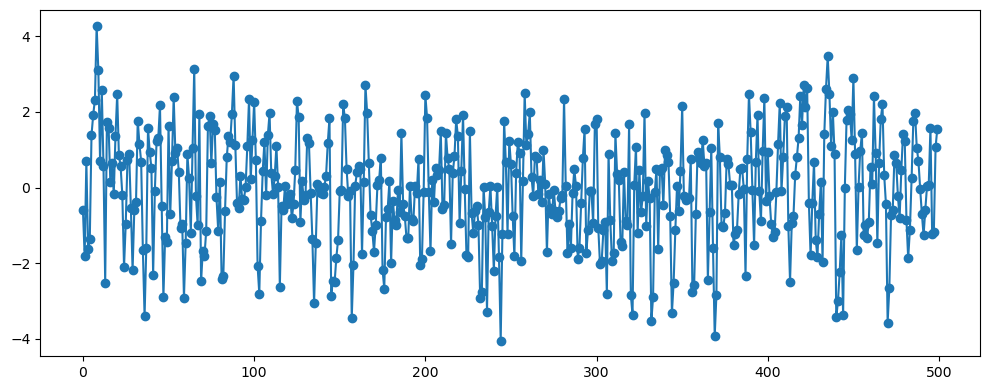

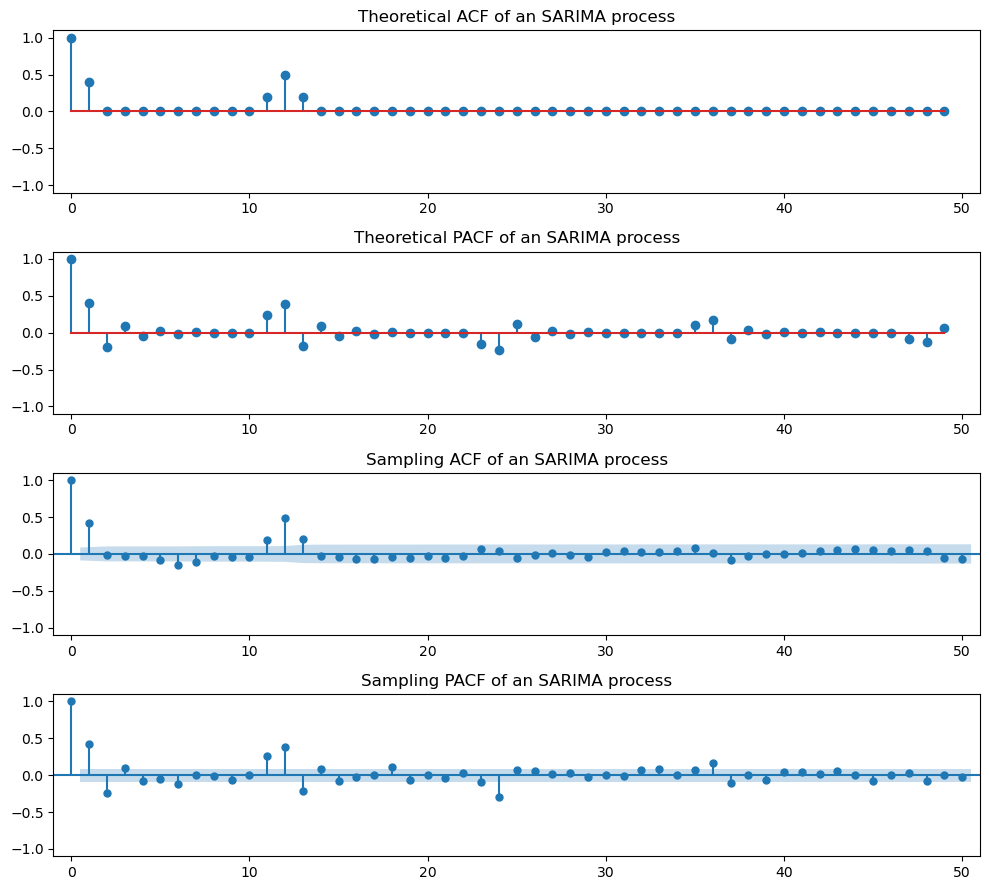

In [54]:
# SARIMA(0,0,1)(0,0,1,12)
plt.figure(figsize=(10, 4))
np.random.seed(123)
phi, Phi = 0, 0
theta, Theta = 0.5, 0.8
ar_params = np.array([])
ma_params = np.array([theta, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, Theta, theta*Theta])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 9))
plt.subplot(411)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical ACF of an SARIMA process")

plt.subplot(412)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical PACF of an SARIMA process")

plot_acf(y, lags=50, ax=plt.subplot(413))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling ACF of an SARIMA process")

plot_pacf(y, lags=50, ax=plt.subplot(414))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling PACF of an SARIMA process")
plt.tight_layout()
plt.show()

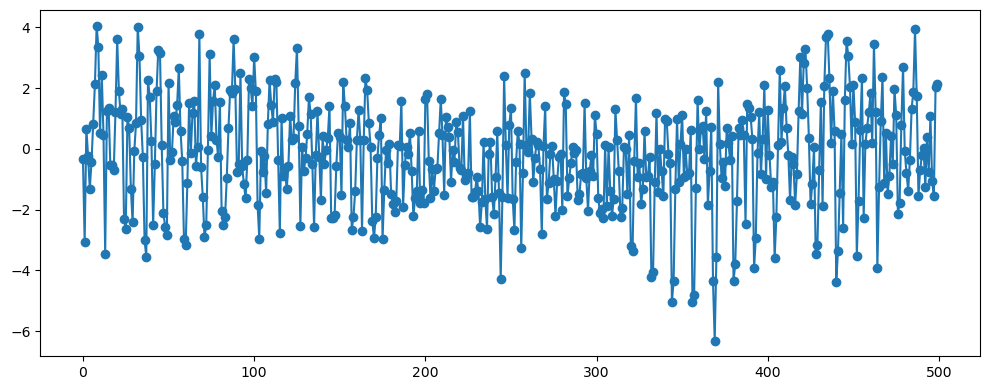

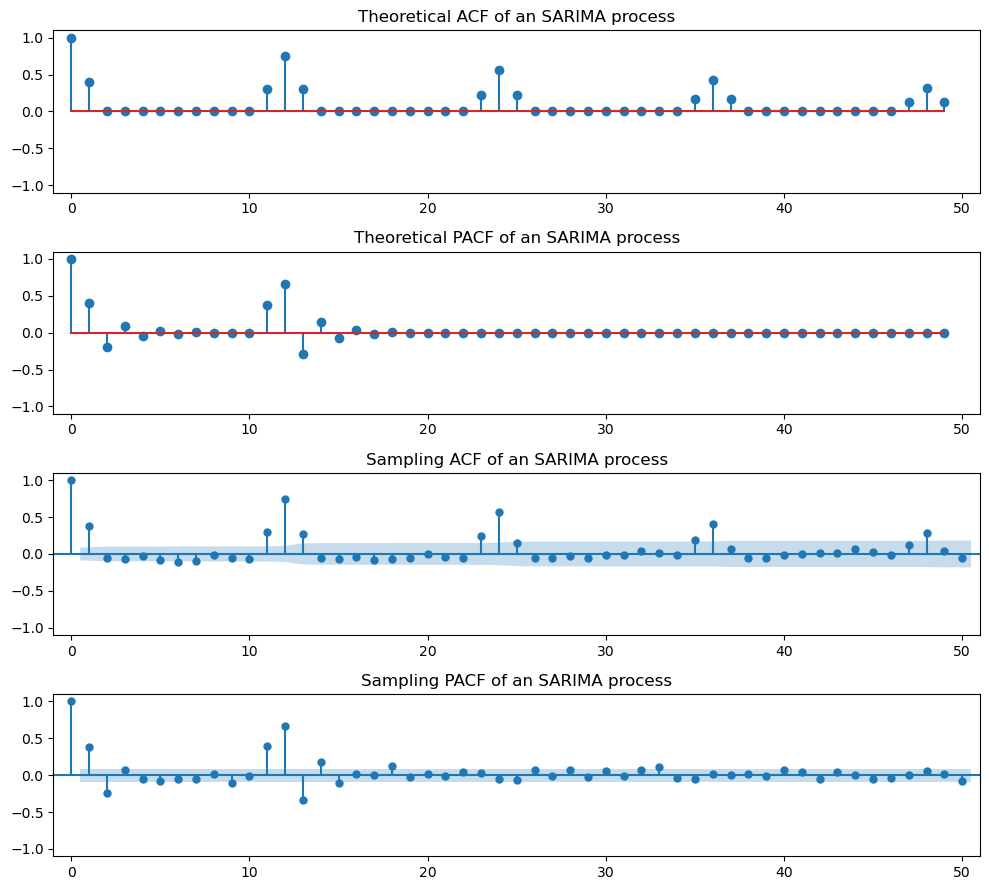

In [55]:
# SARIMA(0,0,1)(1,0,0,12)
plt.figure(figsize=(10, 4))
np.random.seed(123)
phi, Phi = 0, 0.75
theta, Theta = 0.5, 0
ar_params = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, Phi])
ma_params = np.array([theta])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 9))
plt.subplot(411)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical ACF of an SARIMA process")

plt.subplot(412)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical PACF of an SARIMA process")

plot_acf(y, lags=50, ax=plt.subplot(413))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling ACF of an SARIMA process")

plot_pacf(y, lags=50, ax=plt.subplot(414))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling PACF of an SARIMA process")
plt.tight_layout()
plt.show()

## SARIMA 모델링 정리

- **예시:**  

> **(1) 원 데이터:**
>
> <center><img src='Image/Expert/TS_SARIMA_Example1.png' width='600'></center>  
>
> - $p:2?$ (`PACF 기준 lag 2까지 높은 상관성`이나 그 뒤로는 다소 안정적)  
> - $d:0?$ (`ADF 결과` 추세는 없는 것 같음)  
> - $q:3?$ (`ACF 기준 lag 3까지 높은 상관성` 처리 필요 인지)  
> - $m:24?$ (`ACF/PACF 기준 lag 24 간격으로 높은 상관성` 진동으로 확인)  
> - $P:1?$ (`PACF 기준 lag 24 전후의 높은 상관성`으로 필요성 인지)    
> - $D:1?$ (`lag가 커질수록 불안정해지는 상관성들과 시각화 계절성` 때문에 계절성 차분 필요 인지)  
> - $Q:2?$ (`ACF 기준 lag 24 + lag 48 전후의 높은 상관성` 처리 필요 인지)  

> **(2) 계절성차분 후 데이터**
>
> <center><img src='Image/Expert/TS_SARIMA_Example2.png' width='600'></center>  
>
> - $p:1?$ (`PACF 기준 lag 1? lag 5정도에 높은 상관성`이나 그 뒤로는 다소 안정적)  
> - $d:1?$ (`ADF 결과` 추세는 없는편이라곤 하지만 `계절성 차분 전보다 추세 증가`)  
> - $q:8?$ (`ACF 기준 lag 8까지 높은 상관성` 처리 필요 인지)  
> - $m:24$ (`반영`)  
> - $P:2?$ (`PACF 기준 lag 24 + lag 48 전후의 높은 상관성`으로 필요성 인지)    
> - $D:1$ (`반영`)  
> - $Q:1?$ (`ACF 기준 작은 수치들이긴 하나 lag 24 간격 높아지는 진동`으로 지켜봐야)  

> **(3) 계절성 및 추세차분 후 데이터**
> <center><img src='Image/Expert/TS_SARIMA_Example3.png' width='600'></center>  
>
> - $p:max4$ (`PACF 기준 lag 4까지 높은 상관성`이나 그 뒤로는 다소 안정적)  
> - $d:1$ (`반영(추세가 더욱 제거)`)  
> - $q:max4$ (`ACF 기준 lag 4까지 높은 상관성`이나 그 뒤로는 다소 안정적)  
> - $m:24$ (`반영`)  
> - $P:max2$ (`PACF 기준 lag 24 + lag 48 전후의 높은 상관성`으로 필요성 인지)    
> - $D:1$ (`반영`)  
> - $Q:max1$ (`ACF 기준 lag 24 전후의 높은 상관성` 처리 필요 인지)  

> **(4) 잔차검증**
> <center><img src='Image/Expert/TS_SARIMA_Example4.png' width='600'></center>  

## **SARIMA모델링 실습:** 호흡기질환 사망자수

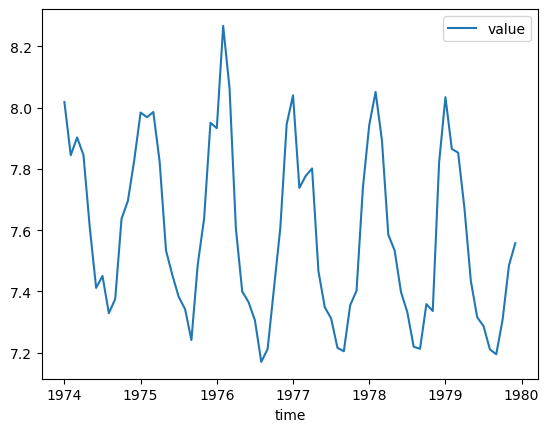

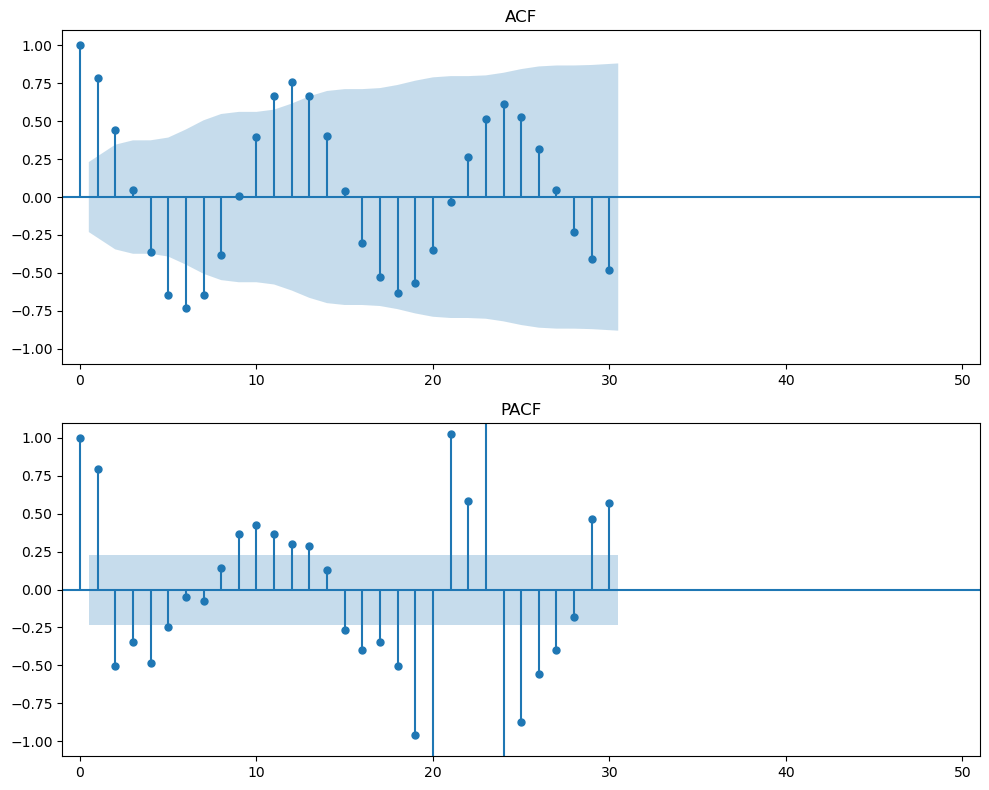

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   72
Model:               SARIMAX(1, 0, 1)   Log Likelihood                  31.982
Date:                Sat, 21 Jan 2023   AIC                            -55.965
Time:                        13:38:31   BIC                            -46.858
Sample:                             0   HQIC                           -52.339
                                 - 72                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.4194      0.765      3.161      0.002       0.919       3.920
ar.L1          0.6818      0.100      6.846      0.000       0.487       0.877
ma.L1          0.4668      0.116      4.027      0.000       0.240       0.694
sigma2         0.0236      0.004      5.416      0.000       0.015       0.032
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                12.13
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.94
Prob(H) (two-sided):                  0.99   Kurtosis:                         3.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

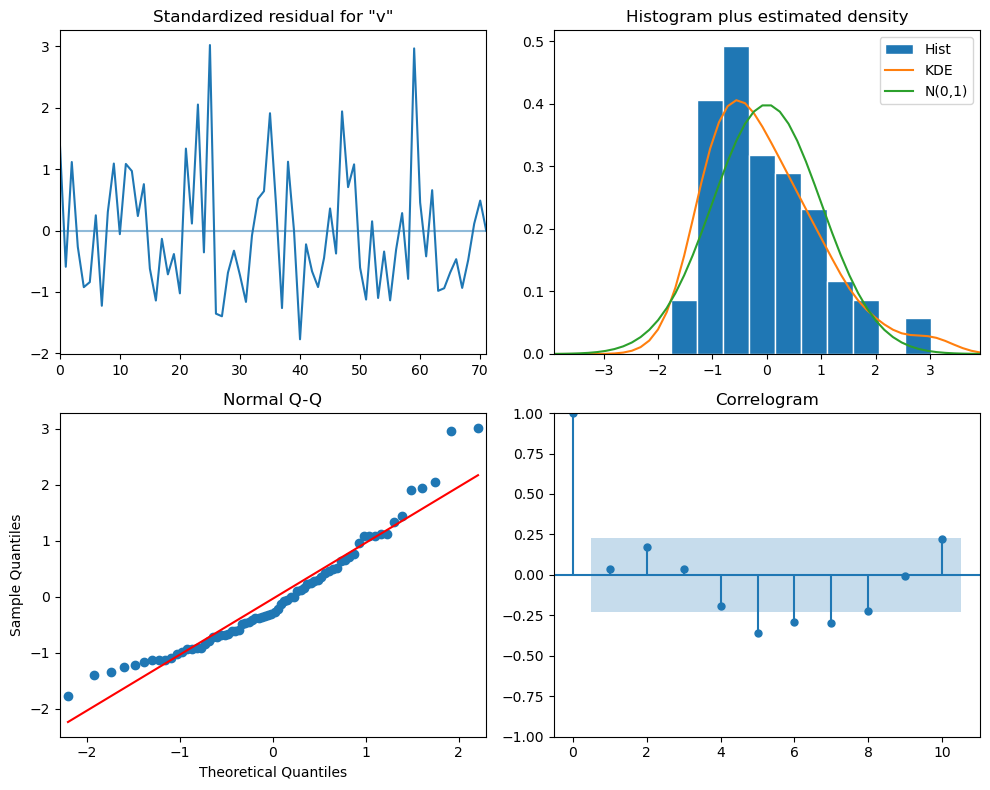

In [56]:
# 데이터로딩 및 확인
# deaths = sm.datasets.get_rdataset("deaths", package="MASS")
# df = deaths.data
location = os.path.join('.', 'Data', 'DeathsRDataset', 'deaths_MASS.csv')
df = pd.read_csv(location)
df.columns = ['time', 'value']
df.value = np.log(df.value)
df.plot(x='time', y='value')
plt.show()

# ACF/PACF 확인
plt.figure(figsize=(10, 8))
plot_acf(df.value.values, lags=30, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("ACF")

plot_pacf(df.value.values, lags=30, ax=plt.subplot(212))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("PACF")
plt.tight_layout()
plt.show()

# ARMA(1,1) 모델링
model = sm.tsa.SARIMAX(df.value, trend='c', order=(1,0,1), seasonal_order=(0,0,0,0)).fit()
display(model.summary())

# 잔차진단
model.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                   72
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                  52.592
Date:                            Sat, 21 Jan 2023   AIC                            -93.184
Time:                                    13:38:32   BIC                            -80.618
Sample:                                         0   HQIC                           -88.269
                                             - 72                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0480      0.022     -2.210      0.027      -0.091      -0.005
ar.L1         -0.1555      0.436     -0.357      0.721      -1.010       0.698
ma.L1          0.5712      0.273      2.094      0.036       0.037       1.106
ar.S.L12      -0.2863      0.203     -1.407      0.159      -0.685       0.113
ma.S.L12      -0.9682      4.492     -0.216      0.829      -9.772       7.836
sigma2         0.0066      0.029      0.229      0.819      -0.050       0.063
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                74.33
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                             0.99
Prob(H) (two-sided):                  0.32   Kurtosis:                         8.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

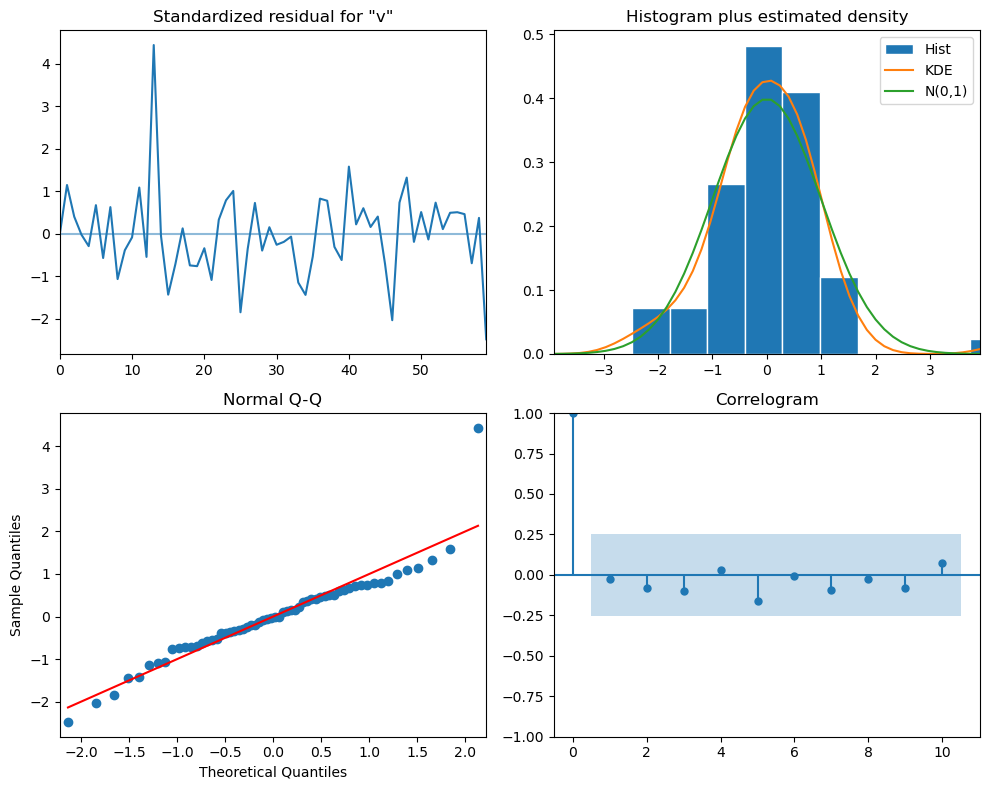

In [57]:
# SARIMA 모델링
model = SARIMAX(df.value, trend='c', order=(1,0,1), seasonal_order=(1,1,1,12)).fit()
display(model.summary())

# 잔차진단
model.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

## **SARIMA모델링 실습:** 항공사 승객수요

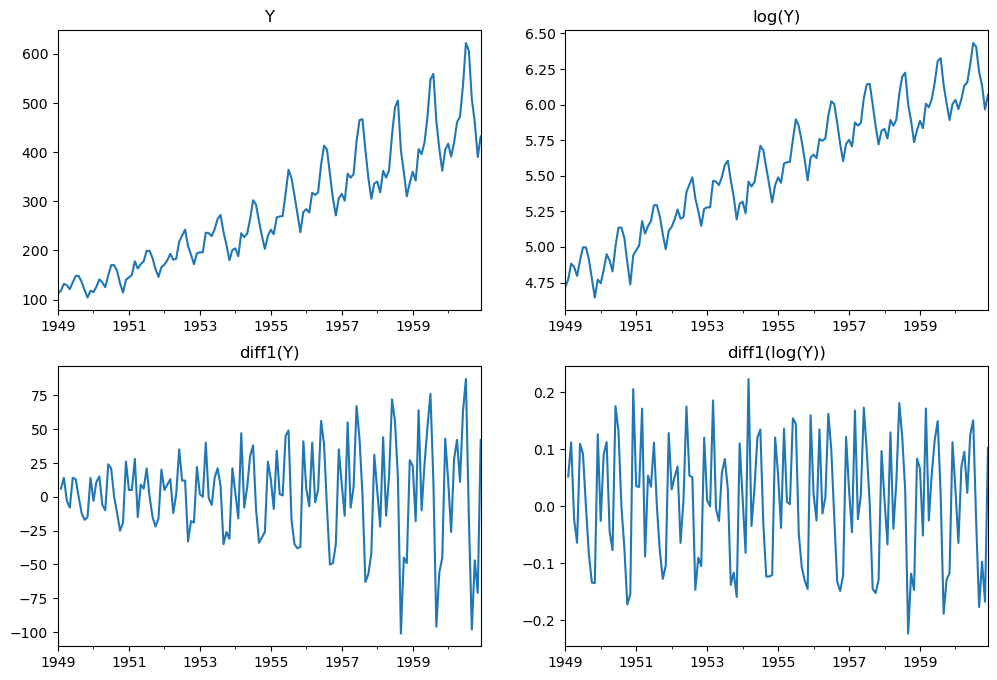

In [58]:
# 데이터 준비
data = sm.datasets.get_rdataset("AirPassengers")
df = data.data.copy()

# 데이터 전처리
## 시간 인덱싱
if 'time' in df.columns:
    df.index = pd.date_range(start='1/1/1949', periods=len(df['time']), freq='M')
    del df['time']

## 정상성 확보
plt.figure(figsize=(12,8))
df.plot(ax=plt.subplot(221), title='Y', legend=False)
np.log(df).plot(ax=plt.subplot(222), title='log(Y)', legend=False)
df.diff(1).plot(ax=plt.subplot(223), title='diff1(Y)', legend=False)
np.log(df).diff(1).plot(ax=plt.subplot(224), title='diff1(log(Y))', legend=False)
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  144
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -694.060
Date:                Sat, 21 Jan 2023   AIC                           1396.121
Time:                        13:38:35   BIC                           1407.972
Sample:                    01-31-1949   HQIC                          1400.937
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.6187      5.001      0.724      0.469      -6.183      13.421
ar.L1         -0.4768      0.128     -3.736      0.000      -0.727      -0.227
ma.L1          0.8646      0.080     10.746      0.000       0.707       1.022
sigma2       958.4117    107.040      8.954      0.000     748.616    1168.207
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 2.17
Prob(Q):                              0.64   Prob(JB):                         0.34
Heteroskedasticity (H):               7.01   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

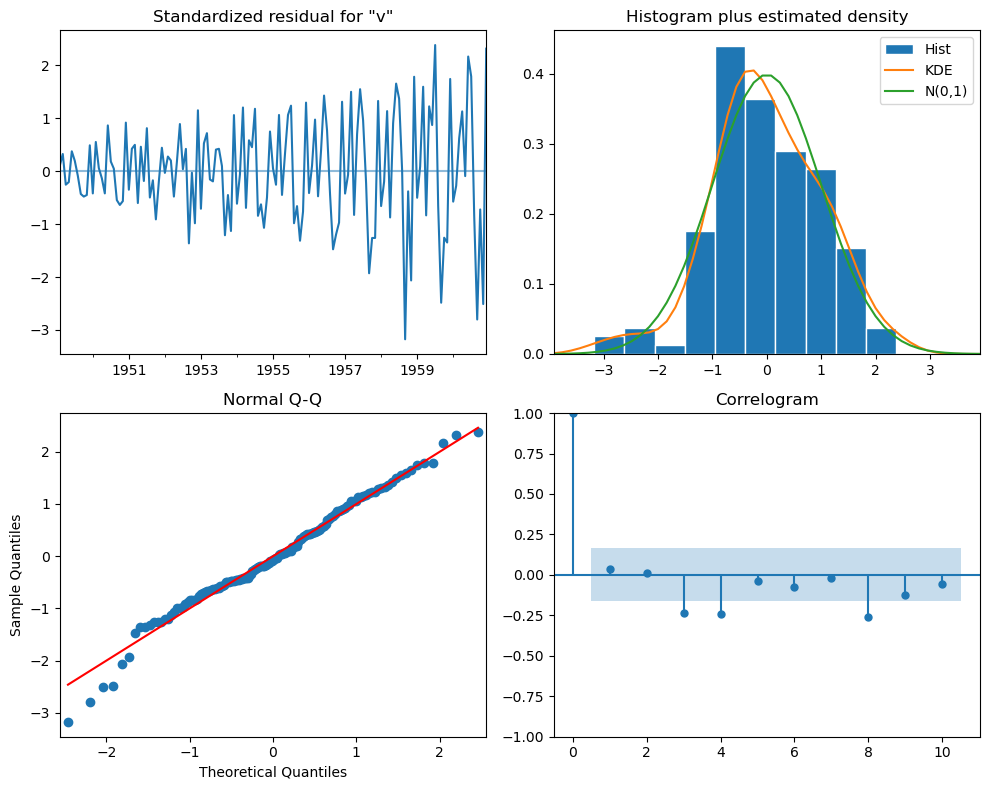

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  144
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 124.804
Date:                Sat, 21 Jan 2023   AIC                           -241.608
Time:                        13:38:36   BIC                           -229.756
Sample:                    01-31-1949   HQIC                          -236.792
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0155      0.016      0.963      0.336      -0.016       0.047
ar.L1         -0.5826      0.170     -3.430      0.001      -0.915      -0.250
ma.L1          0.8502      0.101      8.455      0.000       0.653       1.047
sigma2         0.0102      0.002      5.871      0.000       0.007       0.014
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 5.93
Prob(Q):                              0.87   Prob(JB):                         0.05
Heteroskedasticity (H):               1.07   Skew:                             0.04
Prob(H) (two-sided):                  0.81   Kurtosis:                         2.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

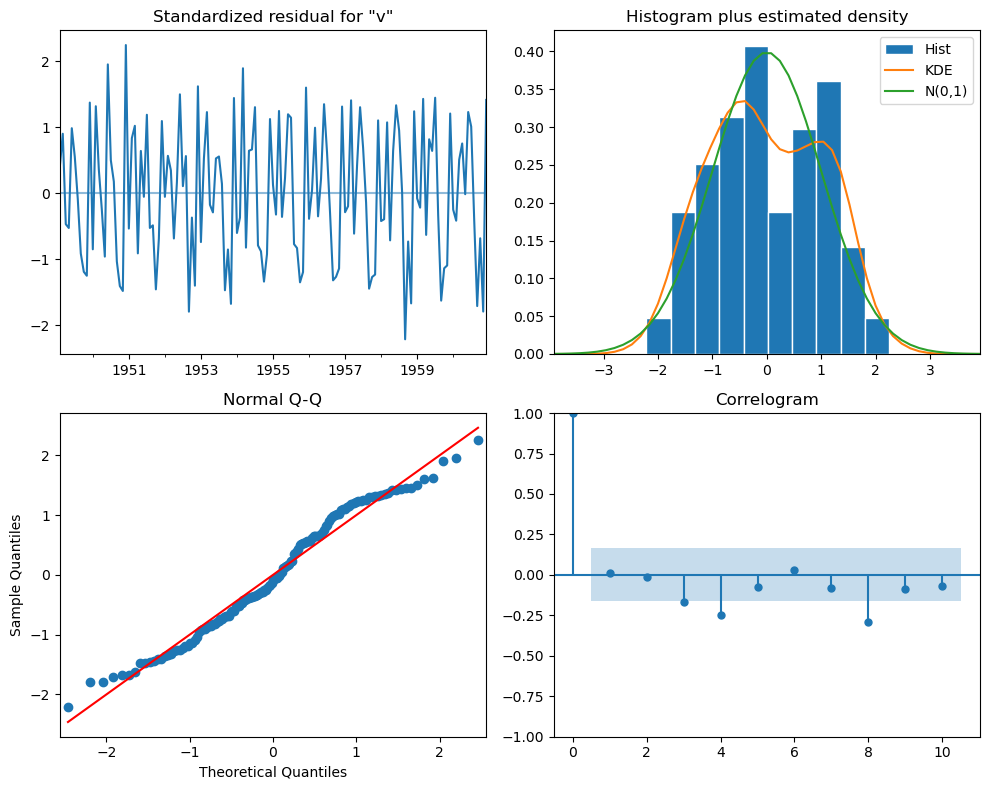

In [59]:
# ARIMA 모델링 (df)
model = SARIMAX(df.value, trend='c', order=(1,1,1), seasonal_order=(0,0,0,0)).fit()
display(model.summary())

# 잔차진단
model.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

# ARIMA 모델링 (log(df))
model = SARIMAX(np.log(df.value), trend='c', order=(1,1,1), seasonal_order=(0,0,0,0)).fit()
display(model.summary())

# 잔차진단
model.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 245.172
Date:                            Sat, 21 Jan 2023   AIC                           -478.344
Time:                                    13:38:39   BIC                           -461.092
Sample:                                01-31-1949   HQIC                          -471.334
                                     - 12-31-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0002      0.001     -0.198      0.843      -0.002       0.001
ar.L1          0.1767      0.212      0.833      0.405      -0.239       0.593
ma.L1         -0.5702      0.184     -3.096      0.002      -0.931      -0.209
ar.S.L12      -0.0957      0.202     -0.475      0.635      -0.491       0.299
ma.S.L12      -0.5024      0.218     -2.307      0.021      -0.929      -0.076
sigma2         0.0013      0.000      8.473      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.60
Prob(Q):                              0.89   Prob(JB):                         0.17
Heteroskedasticity (H):               0.61   Skew:                            -0.02
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

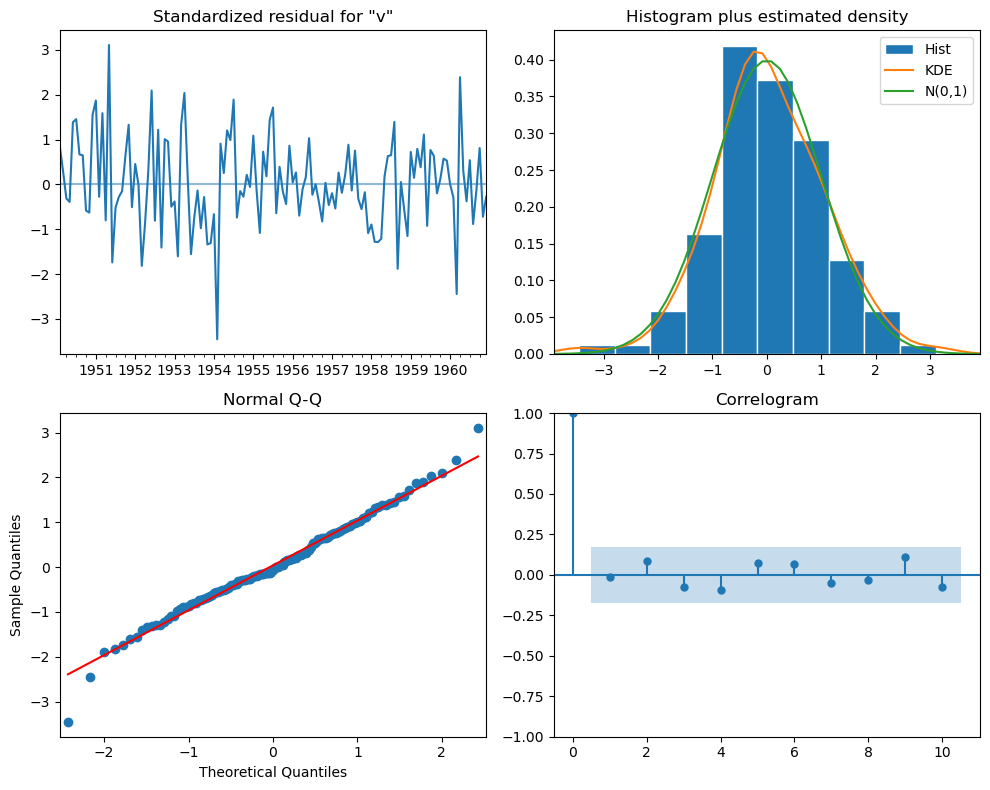

In [60]:
# SARIMA 모델링 (log(df))
model = SARIMAX(np.log(df.value), trend='c', order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
display(model.summary())

# 잔차진단
model.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

# **단변량 선형알고리즘의 분석싸이클 정리**

> **"알고리즘 보다는 전체 분석싸이클 흐름의 정리를 통해 `생소하거나 부족한 부분`을 점검하고 `필요한 내용을 업데이트`"**

## 분석싸이클 정리

> **"[<박스-젠킨스 방법론, 1970>](https://en.wikipedia.org/wiki/Box%E2%80%93Jenkins_method) 기반으로 `분석 싸이클을 일반화 정리`"**
>
> - `통계추론/기계학습`와 데이터분석 과정이 다를건 없지만, `시계열분석시 고려해야 할 사항이 더 다양한 편`
> | **단계** | **기계학습** | **시계열분석** |
|:----------:|:-----------:|:---------------:|
| 전처리 | 변수 확장 | 변수 확장 + `정상성 확보` |
| 시각화 | 모델/변수 선택 | 모델/변수/`파라미터` 선택 |
| 모델링 | 상동 | 상동 |
| 검증 | 상동 | 상동 |
| 잔차진단 | 상동 | 상동 |
>
>
> - 가볍게 읽어보며 `어떤 고려해야 할 내용들이 있었는지 확인`을 통해 내용정리 가능

---

**(0) (X처리) 데이터 로딩 $\rightarrow$ 전처리 이후 시각화를 통해 `Outlier 확인/변경/제거`**

**(1) (Y처리) 비정상 과정에서 `정상 과정 변환`:** 필수는 아니지만 `많은 장점`

- **별도 모델링:** 추세는 `회귀분석, 다항식 등으로 모형화 후 분리`
- **Log/추세차분/계절성차분:** ADF/KPSS 등의 검정이나 시각화를 통해 `분산증가나 차분차수 알아냄`  
- **정규분포 확인:** 극단값을 줄여 `비정상성 확률을 낮추기` 위해`정규성 검정(Normality Test)`을 사용하여 분포가 정규 분포인지 확인하고, 필요하다면 `로그 변환이나 Box-Cox 변환`을 사용하여 정규분포로 변환
  
**(2) ARMAX/SARIMAX 모델링 차수 결정**

- ACF/PACF 분석으로 `AR(p) 모형 또는 MA(q) 모형 결정`

> - `ACF`가 특정 차수 이상에서 없어지는 경우(Cut-off)에는 MA 모형을 사용 가능
> - `PACF`가 특정 차수 이상에서 없어지면 AR 모형을 사용 가능

- ACF와 PACF 모두 특정 차수 이상에서 없어지는 현상이 나타나지 않는다면 `ARMAX/SARIMAX 모형`을 사용
- 모수 추정시 `AIC/BIC 값을 이용하여 차수 결정 및 모수추정`도 동시에 이루어 짐

**(3) ARMAX/SARIMAX 모델링의 차수를 적용하며 최적 모수 추정 및 평가**

- `시각화, 통계량 및 문제해결을 위한 평가지표`를 통해 최적 모수 선정
- `MM(Method of Modent)/LS(Least Square)/MLE(Maximum Likelihood Estimation) 등의 방법론`으로 모수 추정
- `부트스트래핑`을 사용하여 모수의 표준 오차도 동시에 추정

**(4) 잔차 진단으로 모델링 종료 여부 확인**  

- 모델링 후 `잔차 진단 과정`을 통해 `모델링이 적절`하게 이루어졌는지 검증  
- 기본적으로 잔차(Residual)가 `백색 잡음`이 되어야 하므로 잔차에 대해 다음을 조사  

> - 잔차에 대한 `정규성` 검정
> - 잔차에 대한 `ACF 분석 또는 Ljung-Box Q 검정`으로 백색잡음 여부 재확인  
> - 백색잡음이 아니면 새로운 모형으로 위 `모든 단계(0~3단계)를 새로 시작`  
> - 백색잡음이면 일단은 `예측력을 확인` 
> 
>> $\rightarrow$ 예측력이 높을 시 `종료`
>>
>> $\rightarrow$ 예측력이 낮을 시 `새로운 모형으로 위 모든 단계(0~3단계)를 새로 시작`


## 분석싸이클 자동화 방향

- **"Hyndman-Khandakar algorithm for automatic ARIMA modelling"**

> - `차수가 높지않은 SARIMA 알고리즘을 자동화` 한 것으로 [Hyndman-Khandakar 알고리즘(2008)](https://www.jstatsoft.org/article/view/v027i03)을 기반으로 함  
> - `정상성변환(Unit Root Calculation)`, `검증지표 최적화(AIC)` 및 MLE 방법을 사용한 `모수추정`을 모두 포함  
> - **자동화 과정:** 일반화 분석싸이클의 `1~3단계만 자동화`한 아이디어 활용

---

**1) KPSS 검정통계량을 사용한 독립변수($Y_t$)의 `적분차수/차분차수 결정`($0 \leq d \leq 2$)**  

**2) 차분된 독립변수 $(1 - L)^d Y_t$에 $AIC$를 줄여가며 초기모형 후보들 중 `최적 Base모형의 차수` $p$와 $q$를 선택**  

- 만약 $d \leq 1$, 초기모형 후보 5종

> - ARIMA(0,d,0) without constant
> - ARIMA(0,d,0) with constant
> - ARIMA(0,d,1) with constant
> - ARIMA(1,d,0) with constant
> - ARIMA(2,d,2) with constant  

- 만약 $d = 2$, 초기모형 후보 4종

> - ARIMA(0,d,0) without constant
> - ARIMA(0,d,1) without constant
> - ARIMA(1,d,0) without constant
> - ARIMA(2,d,2) without constant    
 
**3) Base모형의 `파라미터 튜닝`을 통한 `최적모형` 선택**  

> (1) Base모형에서 $p$와 $q$를 $\pm 1$ `변화시키며 AIC들을 추정`  
> (2) $p$와 $q$ 변경 및 `상수항(Constant) 반영/미반영하며 AIC들을 추정`  
> (3) `최적 파라미터 값` 선택  
>
> $\rightarrow$ `One-Step!`

**4) 최종 모형 선택**  

> (1) (3)에서 추정된 모형을 `Base모형으로 변경`  
> (2) `AIC가 더이상 줄어들지 않을 때까지` 3번의 과정을 `반복하여 최적모형 재추정`  
> (3) 최종 시계열모형 결정
>
> $\rightarrow$ `Two-Step!` ...

---

<center><img src='Image/Expert/TS_Analysis_Cycle.png' width='600'></center>

---

```python
# 파이썬 SARIMAX 자동화 모듈
# 차분차수 및 파라미터 더욱 넓게 사용 가능 + 추세 외 계절성 모델링 포함
# 모듈을 확장하려면 아이디어만 차용하여 Customized 버전을 만들어 사용 추천
# 자동화 모듈이 있다고 해도 결과를 무조건 신뢰할 수 없기 때문에 세부 이론지식 필수!
model = AutoARIMA(Y_train, stationary=False,
                  trend='c', start_p=0, start_q=0, max_p=5, max_q=5, max_d=3,
                  seasonal=True, start_P=0, start_Q=0, max_P=5, max_Q=5, 
                  m=seasonal_diff_order,
                  stepwise=True, trace=True)
```

## **자동화 모델링 실습:** 항공사 승객수요

### 데이터 정상성 경향 체크

'Non-transfer:'

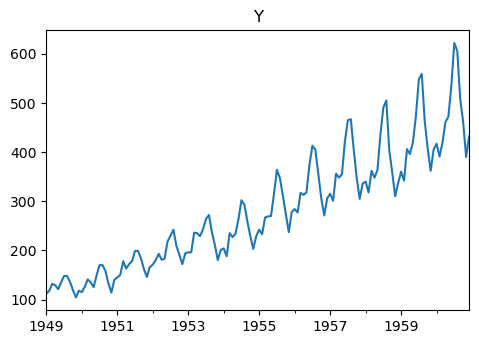

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


Stationarity_ADF  Stationarity_KPSS
Test Statistics                  0.82               1.65
p-value                          0.99               0.01
Used Lag                        13.00               8.00
Critical Value(1%)              -3.48               0.74
Critical Value(5%)              -2.88               0.46
Critical Value(10%)             -2.58               0.35

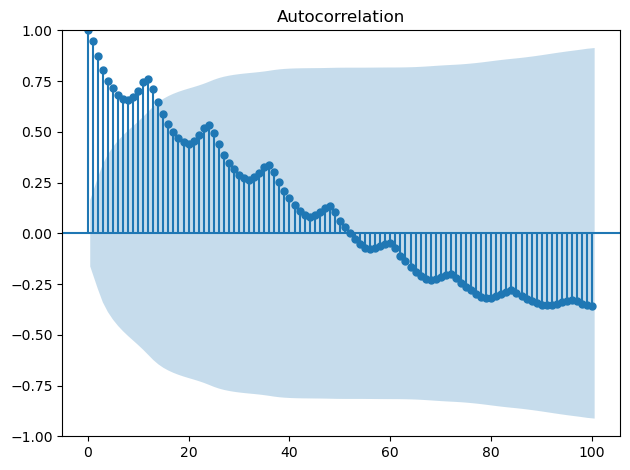

'Log transfer:'

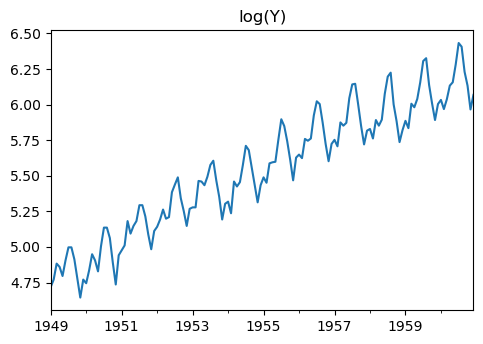

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


Stationarity_ADF  Stationarity_KPSS
Test Statistics                 -1.72               1.67
p-value                          0.42               0.01
Used Lag                        13.00               8.00
Critical Value(1%)              -3.48               0.74
Critical Value(5%)              -2.88               0.46
Critical Value(10%)             -2.58               0.35

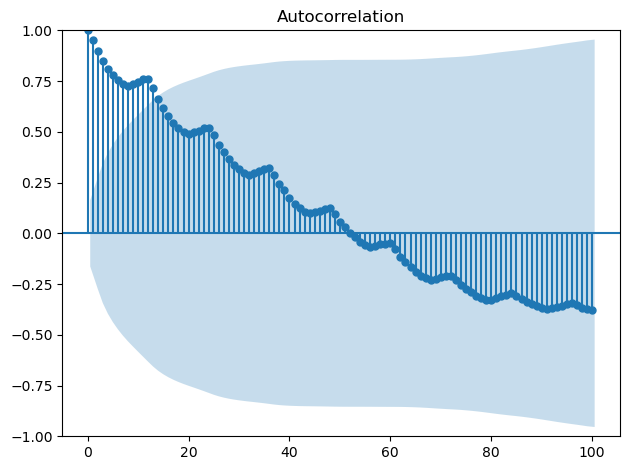

Trend Difference:  1


'Log and trend diffrence transfer:'

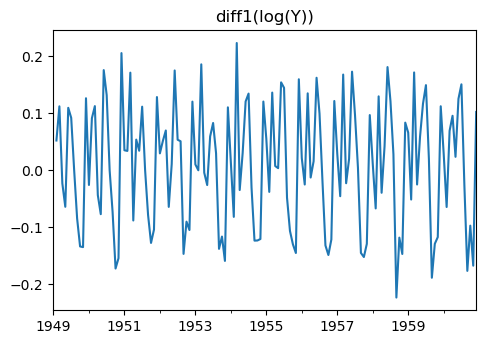

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


Stationarity_ADF  Stationarity_KPSS
Test Statistics                 -2.72               0.04
p-value                          0.07               0.10
Used Lag                        14.00               6.00
Critical Value(1%)              -3.48               0.74
Critical Value(5%)              -2.88               0.46
Critical Value(10%)             -2.58               0.35

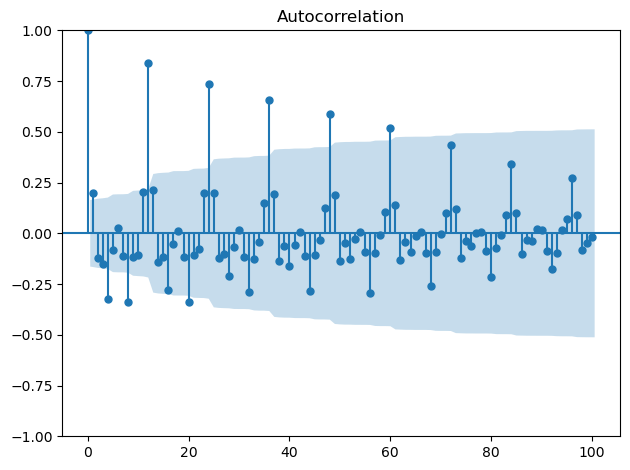

Seasonal Difference:  12


'Log and trend+seasonal diffrence transfer:'

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


Stationarity_ADF  Stationarity_KPSS
Test Statistics                 -4.44               0.07
p-value                          0.00               0.10
Used Lag                        12.00               3.00
Critical Value(1%)              -3.49               0.74
Critical Value(5%)              -2.89               0.46
Critical Value(10%)             -2.58               0.35

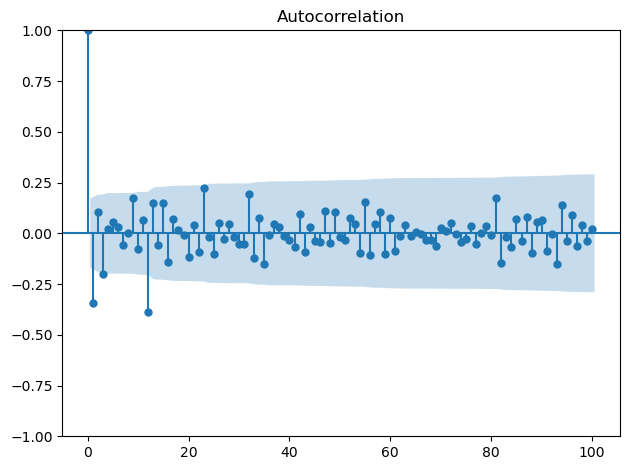

In [61]:
# 데이터 준비
data = sm.datasets.get_rdataset("AirPassengers")
df = data.data.copy()

# 데이터 전처리
## 시간 인덱싱
if 'time' in df.columns:
    df.index = pd.date_range(start='1/1/1949', periods=len(df['time']), freq='M')
    del df['time']

## 정상성 테스트
### 미변환
display('Non-transfer:')
plt.figure(figsize=(12,8))
df.plot(ax=plt.subplot(222), title='Y', legend=False)
plt.show()

candidate_none = df.copy()
print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
display(stationarity_ADF_KPSS(pd.DataFrame(candidate_none.values.flatten())))
plot_acf(candidate_none, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

### 로그 변환
display('Log transfer:')
plt.figure(figsize=(12,8))
np.log(df).plot(ax=plt.subplot(222), title='log(Y)', legend=False)
plt.show()

candidate_trend = np.log(df).copy()
print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
display(stationarity_ADF_KPSS(pd.DataFrame(candidate_trend.values.flatten())))
plot_acf(candidate_trend, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

trend_diff_order_initial = 0
result = stationarity_ADF_KPSS(pd.DataFrame(candidate_trend.values.flatten())).T
if result.loc['Stationarity_ADF', 'p-value'] < 0.1:
    trend_diff_order = trend_diff_order_initial
else:
    trend_diff_order = trend_diff_order_initial + 1
print('Trend Difference: ', trend_diff_order)

### 로그+추세차분 변환
display('Log and trend diffrence transfer:')
plt.figure(figsize=(12,8))
np.log(df).diff(trend_diff_order).plot(ax=plt.subplot(224), title='diff1(log(Y))', legend=False)
plt.show()

candidate_seasonal = candidate_trend.diff(trend_diff_order).dropna().copy()
print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
display(stationarity_ADF_KPSS(pd.DataFrame(candidate_seasonal.values.flatten())))
plot_acf(candidate_seasonal, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

seasonal_diff_order = int(sm.tsa.acf(candidate_seasonal)[1:].argmax() + 1)
print('Seasonal Difference: ', seasonal_diff_order)

### 로그+추세차분+계절차분 변환
display('Log and trend+seasonal diffrence transfer:')
candidate_final = candidate_seasonal.diff(seasonal_diff_order).dropna().copy()
print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
display(stationarity_ADF_KPSS(pd.DataFrame(candidate_final.values.flatten())))
plot_acf(candidate_final, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

| **방법론** | **효과** | **항공사 승객수요** | **항공사 승객수요<br>(Log)** | **항공사 승객수요<br>(Log+추세차분)** | **항공사 승객수요<br>(Log+추세차분+계절성차분)** |
|:---:|:---:|:---:|:---:|:---:|:---:|
| **ADF Test<br>(H0: `비정상성`)** | 추세 제거 | 비정상성 | 비정상성 | 비정상성 | `정상성` |
| **KPSS Test<br>(H0: `정상성`)** | 계절성 제거 | 비정상성 | 비정상성 | `정상성` | `정상성` |
| **ACF Plot** | 자기상관 제거 | 비정상성 | 비정상성 | 비정상성 | `정상성` |

### SARIMAX 모델링

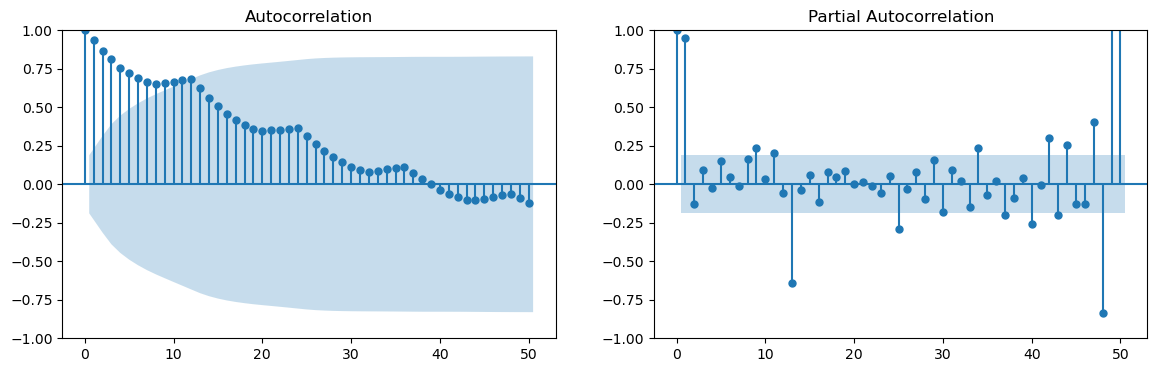

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                value   No. Observations:                  108
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                 184.253
Date:                              Sat, 21 Jan 2023   AIC                           -358.506
Time:                                      13:38:42   BIC                           -345.142
Sample:                                  01-31-1949   HQIC                          -353.089
                                       - 12-31-1957                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0001      0.000      0.330      0.741      -0.001       0.001
ar.L1         -0.2676      0.080     -3.352      0.001      -0.424      -0.111
ar.S.L12       0.9907      0.008    120.891      0.000       0.975       1.007
ma.S.L12      -0.6113      0.114     -5.341      0.000      -0.836      -0.387
sigma2         0.0014      0.000      7.243      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.23
Prob(Q):                              0.93   Prob(JB):                         0.89
Heteroskedasticity (H):               0.39   Skew:                             0.09
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

MAE    MSE  MAPE
Train  8.27 197.76  0.05
Test  26.96 911.00  0.07

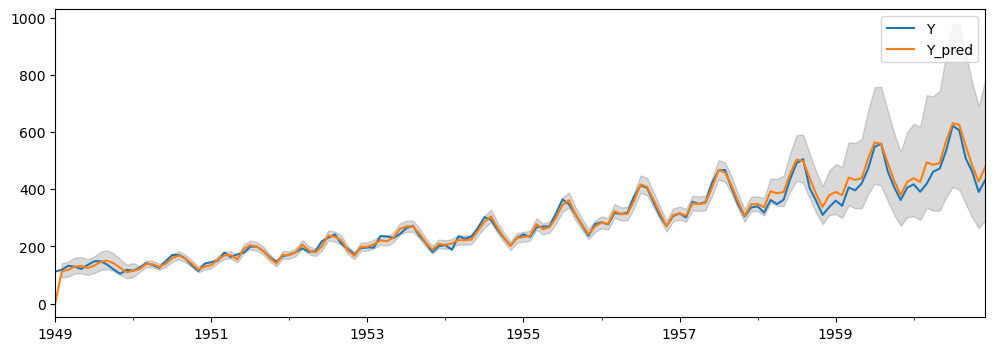

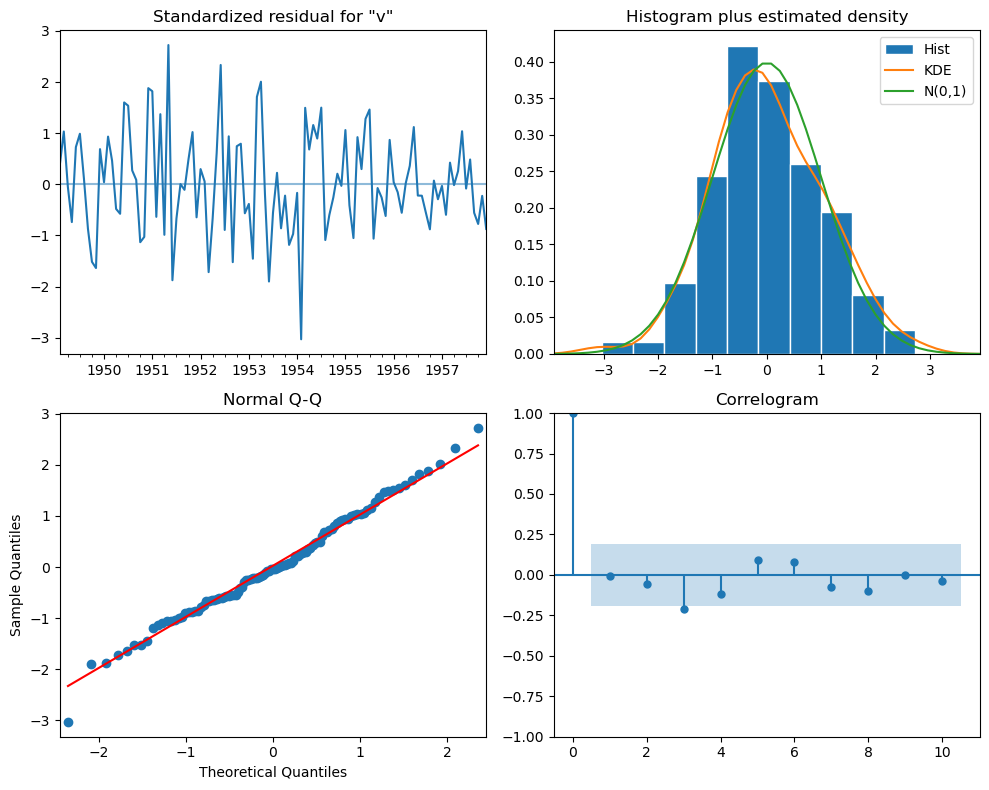

In [62]:
## 최종 타겟 선정 및 Train/Test 데이터 분리
## candidate_trend = np.log(df).copy()
candidate = candidate_trend.copy()
split_date = '1958-01-01'
Y_train = candidate[candidate.index < split_date]
Y_test = candidate[candidate.index >= split_date]

## 시각화 및 모수추론(p=1, q=0, d=1, P=1, Q=1, D(m)=12)
plt.figure(figsize=(14,4))
plot_acf(Y_train, lags=50, alpha=0.05, use_vlines=True, ax=plt.subplot(121))
plot_pacf(Y_train, lags=50, alpha=0.05, use_vlines=True, ax=plt.subplot(122))
plt.show()

# 모델링
## SARIMAX
logarithm, differencing = True, False
pred_start = Y_train.index[0]
pred_end = Y_test.index[-1]
## 모수를 변경하며 추정
model_sarimax = SARIMAX(Y_train, trend='c',
                        order=(1,trend_diff_order,0), 
                        seasonal_order=(1,0,1,seasonal_diff_order)).fit()
display(model_sarimax.summary())
model_pred = model_sarimax.get_prediction(start=pred_start, end=pred_end)
Y_pred = model_pred.predicted_mean
Y_pred_ci = model_pred.conf_int()
## 비정상성으로 변환
if logarithm:
    Y_train = np.exp(Y_train).copy()
    Y_test = np.exp(Y_test).copy()
    Y_pred = np.exp(Y_pred).copy()
    Y_pred_ci = np.exp(Y_pred_ci).copy()
if differencing:
    Y_pred = np.cumsum(Y_pred).copy()
    
# 검증
Y_trindex = [i for i in Y_pred.index if i in Y_train.index]
Y_teindex = [i for i in Y_pred.index if i in Y_test.index]
Y_trpred = pd.DataFrame(Y_pred).loc[Y_trindex]
Y_tepred = pd.DataFrame(Y_pred).loc[Y_teindex]
Score_sarimax = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_sarimax)

# 결과 시각화
ax = pd.DataFrame(pd.concat([Y_train, Y_test], axis=0)).plot(figsize=(12,4))
pd.DataFrame(Y_pred).plot(label='Time Sequence Prediction', ax=ax)
ax.fill_between(Y_pred_ci.index, Y_pred_ci.iloc[:,0], Y_pred_ci.iloc[:,1], 
                color='k', alpha=0.15)
plt.legend(['Y', 'Y_pred'])
plt.show()

# 잔차진단
model_sarimax.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

### AutoARIMA 모델링

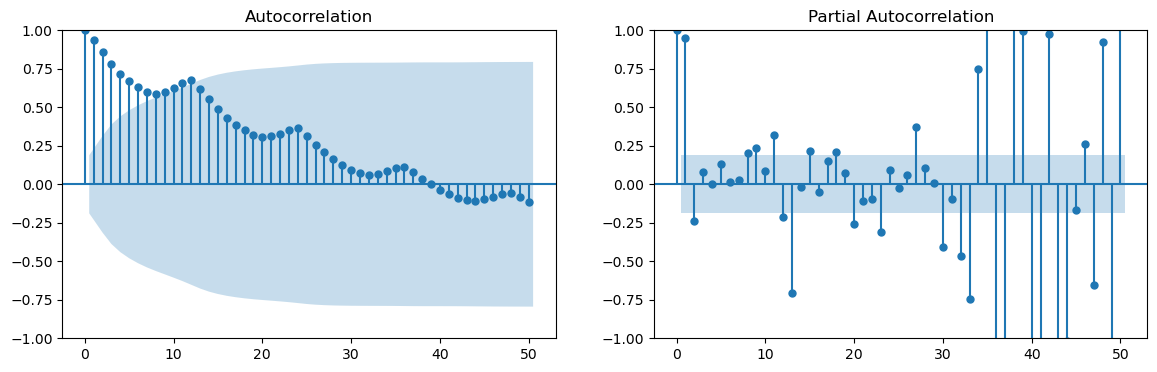

Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,1,0)[12]             : BIC=710.284, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : BIC=711.847, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : BIC=712.463, Time=0.10 sec
 ARIMA(0,1,0)(1,1,0)[12]             : BIC=711.805, Time=0.05 sec
 ARIMA(0,1,0)(0,1,1)[12]             : BIC=711.829, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[12]             : BIC=716.316, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[12]             : BIC=709.109, Time=0.03 sec
 ARIMA(1,1,0)(0,1,1)[12]             : BIC=712.133, Time=0.12 sec
 ARIMA(1,1,0)(1,1,1)[12]             : BIC=716.208, Time=0.28 sec
 ARIMA(2,1,0)(0,1,0)[12]             : BIC=713.352, Time=0.05 sec
 ARIMA(1,1,1)(0,1,0)[12]             : BIC=712.743, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : BIC=709.484, Time=0.04 sec
 ARIMA(2,1,1)(0,1,0)[12]             : BIC=717.291, Time=0.09 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : BIC=713.536, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,1,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  108
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -350.001
Date:                            Sat, 21 Jan 2023   AIC                            704.001
Time:                                    13:38:45   BIC                            709.109
Sample:                                01-31-1949   HQIC                           706.065
                                     - 12-31-1957                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2411      0.091     -2.648      0.008      -0.420      -0.063
sigma2        92.7499     13.439      6.902      0.000      66.410     119.090
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.32
Prob(Q):                              0.92   Prob(JB):                         0.31
Heteroskedasticity (H):               0.92   Skew:                             0.38
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

MAE    MSE  MAPE
Train  9.38 244.09  0.05
Test  17.81 489.84  0.04

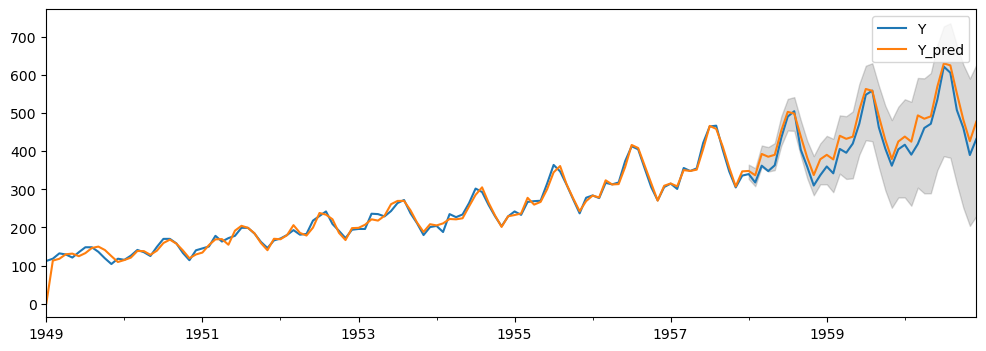

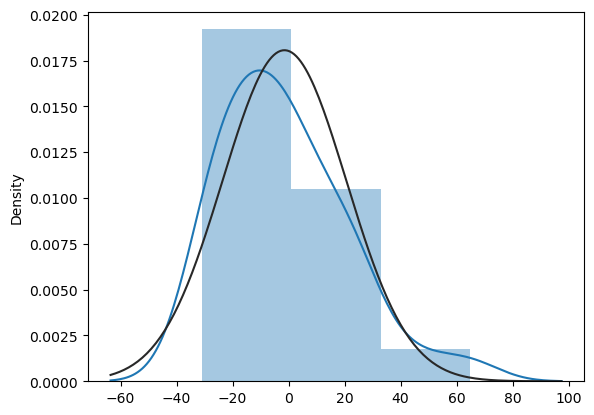

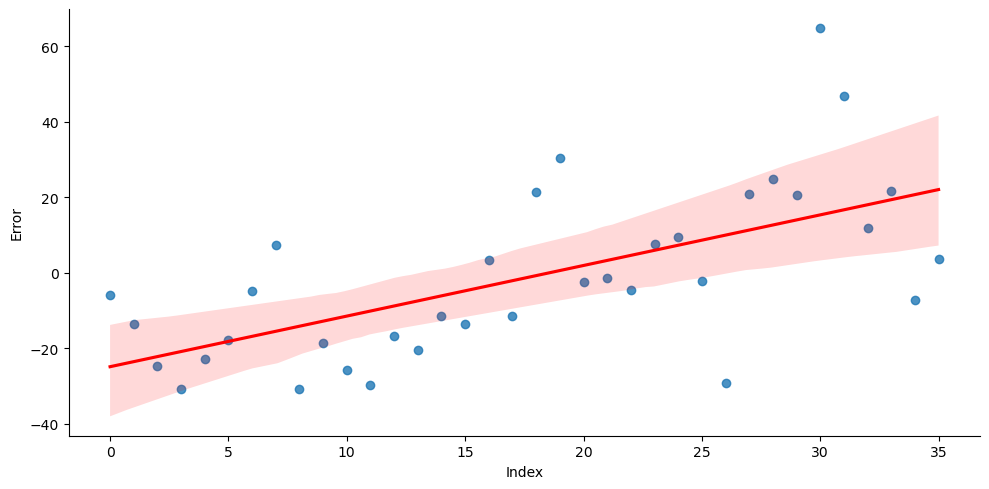

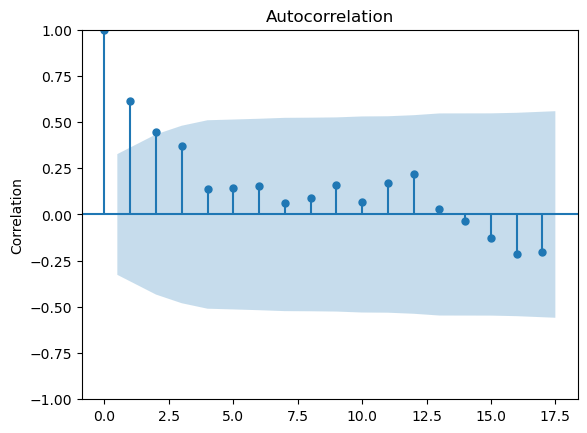

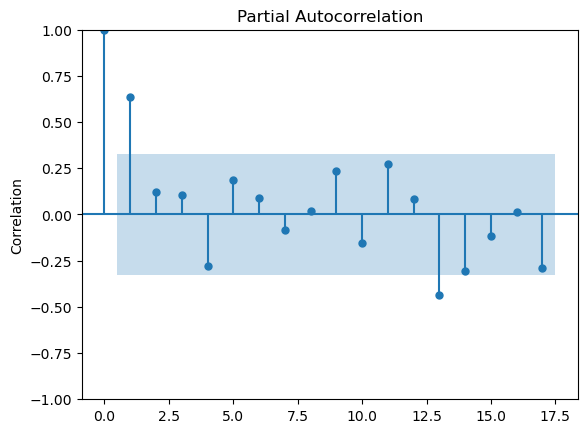

Normality Heteroscedasticity  Autocorr(lag10)  \
Test Statistics           0.94               2.40            33.55   
p-value                   0.04               0.08             0.00   
Alternative                NaN          two-sided              NaN   
Used Lag                   NaN                NaN              NaN   
Critical Value(1%)         NaN                NaN              NaN   
Critical Value(5%)         NaN                NaN              NaN   
Critical Value(10%)        NaN                NaN              NaN   

                     Autocorr(lag50)  Stationarity_ADF  Stationarity_KPSS  
Test Statistics                45.06              0.31               0.63  
p-value                         0.00              0.98               0.02  
Alternative                      NaN               NaN                NaN  
Used Lag                         NaN             10.00               3.00  
Critical Value(1%)               NaN             -3.72               0.74  
Critical Value(5%)               NaN             -2.99               0.46  
Critical Value(10%)              NaN             -2.63               0.35

In [63]:
# 데이터 준비
data = sm.datasets.get_rdataset("AirPassengers")
df = data.data.copy()

# 데이터 전처리
## 시간 인덱싱
if 'time' in df.columns:
    df.index = pd.date_range(start='1/1/1949', periods=len(df['time']), freq='M')
    del df['time']
    
## 데이터 분리
split_date = '1958-01-01'
Y_train = df[df.index < split_date]
Y_test = df[df.index >= split_date]

## 시각화
plt.figure(figsize=(14,4))
plot_acf(Y_train, lags=50, alpha=0.05, use_vlines=True, ax=plt.subplot(121))
plot_pacf(Y_train, lags=50, alpha=0.05, use_vlines=True, ax=plt.subplot(122))
plt.show()

# 모델링
## Auto-ARIMA
model_autoarima = AutoARIMA(stationary=False,
                            seasonal=True,
                            with_intercept='auto',
                            start_p=0, max_p=5, 
                            max_d=2,
                            start_q=0, max_q=5,
                            start_P=0, max_P=5, 
                            max_D=2,
                            start_Q=0, max_Q=5,
                            m=12,
                            test='adf',
                            information_criterion='bic',
                            n_jobs=-1,
                            trace=True)
model_autoarima.fit(Y_train)
display(model_autoarima.summary())
Y_trpred = model_autoarima.predict_in_sample(return_conf_int=False)
Y_trpred = pd.DataFrame(Y_trpred, index=Y_train.index)
Y_tepred, Y_pred_ci = model_autoarima.predict(n_periods=Y_test.shape[0],
                                              return_conf_int=True)
Y_pred_ci = pd.DataFrame(Y_pred_ci, 
                         index=Y_test.index, columns=['lower', 'upper'])
Y_tepred = pd.DataFrame(Y_tepred, 
                        index=Y_test.index, columns=['Y_tepred'])
    
# 검증
Score_autoarima = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_autoarima)

# 결과 시각화
ax = pd.DataFrame(pd.concat([Y_train, Y_test], axis=0)).plot(figsize=(12,4))
pd.DataFrame(Y_pred).plot(label='Time Sequence Prediction', ax=ax)
ax.fill_between(Y_pred_ci.index, Y_pred_ci.iloc[:,0], Y_pred_ci.iloc[:,1], 
                color='k', alpha=0.15)
plt.legend(['Y', 'Y_pred'])
plt.show()

# 잔차진단
Resid_te = Y_test - Y_tepred.values
Resid_te.columns = ['Error']
error_analysis_timeseries(Y_test, Y_tepred, Resid_te, graph_on=True)